In [1]:
'''
First install Keras Viz:
pip install git+https://github.com/raghakot/keras-vis.git -U
'''

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Train on 60000 samples, validate on 10000 samples
Epoch 1/5


  128/60000 [..............................] - ETA: 5:46 - loss: 2.2911 - acc: 0.1094

  256/60000 [..............................] - ETA: 3:56 - loss: 2.2537 - acc: 0.1484

  384/60000 [..............................] - ETA: 3:17 - loss: 2.2162 - acc: 0.1562

  512/60000 [..............................] - ETA: 2:59 - loss: 2.1701 - acc: 0.1836

  640/60000 [..............................] - ETA: 2:49 - loss: 2.1294 - acc: 0.2062

  768/60000 [..............................] - ETA: 2:41 - loss: 2.0553 - acc: 0.2526

  896/60000 [..............................] - ETA: 2:37 - loss: 1.9884 - acc: 0.2935

 1024/60000 [..............................] - ETA: 2:32 - loss: 1.9194 - acc: 0.3311

 1152/60000 [..............................] - ETA: 2:28 - loss: 1.8602 - acc: 0.3611

 1280/60000 [..............................] - ETA: 2:25 - loss: 1.7957 - acc: 0.3844

 1408/60000 [..............................] - ETA: 2:23 - loss: 1.7335 - acc: 0.4084

 1536/60000 [..............................] - ETA: 2:20 - loss: 1.6696 - acc: 0.4329

 1664/60000 [..............................] - ETA: 2:18 - loss: 1.6312 - acc: 0.4489

 1792/60000 [..............................] - ETA: 2:18 - loss: 1.5880 - acc: 0.4626

 1920/60000 [..............................] - ETA: 2:16 - loss: 1.5489 - acc: 0.4786

 2048/60000 [>.............................] - ETA: 2:15 - loss: 1.5122 - acc: 0.4951

 2176/60000 [>.............................] - ETA: 2:14 - loss: 1.4732 - acc: 0.5083

 2304/60000 [>.............................] - ETA: 2:14 - loss: 1.4336 - acc: 0.5230

 2432/60000 [>.............................] - ETA: 2:13 - loss: 1.3958 - acc: 0.5350

 2560/60000 [>.............................] - ETA: 2:12 - loss: 1.3584 - acc: 0.5469

 2688/60000 [>.............................] - ETA: 2:12 - loss: 1.3357 - acc: 0.5536

 2816/60000 [>.............................] - ETA: 2:11 - loss: 1.3093 - acc: 0.5632

 2944/60000 [>.............................] - ETA: 2:10 - loss: 1.2862 - acc: 0.5713

 3072/60000 [>.............................] - ETA: 2:10 - loss: 1.2568 - acc: 0.5811

 3200/60000 [>.............................] - ETA: 2:10 - loss: 1.2327 - acc: 0.5884

 3328/60000 [>.............................] - ETA: 2:09 - loss: 1.2056 - acc: 0.5986

 3456/60000 [>.............................] - ETA: 2:09 - loss: 1.1811 - acc: 0.6079

 3584/60000 [>.............................] - ETA: 2:08 - loss: 1.1569 - acc: 0.6155

 3712/60000 [>.............................] - ETA: 2:08 - loss: 1.1408 - acc: 0.6207

 3840/60000 [>.............................] - ETA: 2:08 - loss: 1.1188 - acc: 0.6268

 3968/60000 [>.............................] - ETA: 2:07 - loss: 1.0995 - acc: 0.6343

 4096/60000 [=>............................] - ETA: 2:07 - loss: 1.0864 - acc: 0.6399

 4224/60000 [=>............................] - ETA: 2:06 - loss: 1.0698 - acc: 0.6449

 4352/60000 [=>............................] - ETA: 2:06 - loss: 1.0539 - acc: 0.6494

 4480/60000 [=>............................] - ETA: 2:05 - loss: 1.0415 - acc: 0.6545

 4608/60000 [=>............................] - ETA: 2:05 - loss: 1.0303 - acc: 0.6586

 4736/60000 [=>............................] - ETA: 2:04 - loss: 1.0179 - acc: 0.6634

 4864/60000 [=>............................] - ETA: 2:03 - loss: 1.0082 - acc: 0.6678

 4992/60000 [=>............................] - ETA: 2:03 - loss: 0.9938 - acc: 0.6719

 5120/60000 [=>............................] - ETA: 2:02 - loss: 0.9839 - acc: 0.6748

 5248/60000 [=>............................] - ETA: 2:02 - loss: 0.9712 - acc: 0.6793

 5376/60000 [=>............................] - ETA: 2:02 - loss: 0.9589 - acc: 0.6842

 5504/60000 [=>............................] - ETA: 2:02 - loss: 0.9466 - acc: 0.6893

 5632/60000 [=>............................] - ETA: 2:01 - loss: 0.9373 - acc: 0.6919

 5760/60000 [=>............................] - ETA: 2:01 - loss: 0.9282 - acc: 0.6957

 5888/60000 [=>............................] - ETA: 2:00 - loss: 0.9177 - acc: 0.7001

 6016/60000 [==>...........................] - ETA: 2:00 - loss: 0.9099 - acc: 0.7031

 6144/60000 [==>...........................] - ETA: 1:59 - loss: 0.9041 - acc: 0.7051

 6272/60000 [==>...........................] - ETA: 1:59 - loss: 0.8938 - acc: 0.7089

 6400/60000 [==>...........................] - ETA: 1:59 - loss: 0.8865 - acc: 0.7119

 6528/60000 [==>...........................] - ETA: 1:58 - loss: 0.8795 - acc: 0.7148

 6656/60000 [==>...........................] - ETA: 1:58 - loss: 0.8727 - acc: 0.7162

 6784/60000 [==>...........................] - ETA: 1:57 - loss: 0.8646 - acc: 0.7189

 6912/60000 [==>...........................] - ETA: 1:57 - loss: 0.8564 - acc: 0.7216

 7040/60000 [==>...........................] - ETA: 1:57 - loss: 0.8472 - acc: 0.7246

 7168/60000 [==>...........................] - ETA: 1:56 - loss: 0.8392 - acc: 0.7274

 7296/60000 [==>...........................] - ETA: 1:56 - loss: 0.8309 - acc: 0.7305

 7424/60000 [==>...........................] - ETA: 1:55 - loss: 0.8257 - acc: 0.7329

 7552/60000 [==>...........................] - ETA: 1:55 - loss: 0.8188 - acc: 0.7349

 7680/60000 [==>...........................] - ETA: 1:55 - loss: 0.8103 - acc: 0.7382

 7808/60000 [==>...........................] - ETA: 1:54 - loss: 0.8016 - acc: 0.7409

 7936/60000 [==>...........................] - ETA: 1:54 - loss: 0.7965 - acc: 0.7424

 8064/60000 [===>..........................] - ETA: 1:53 - loss: 0.7904 - acc: 0.7442

 8192/60000 [===>..........................] - ETA: 1:53 - loss: 0.7835 - acc: 0.7463

 8320/60000 [===>..........................] - ETA: 1:53 - loss: 0.7757 - acc: 0.7493

 8448/60000 [===>..........................] - ETA: 1:52 - loss: 0.7686 - acc: 0.7513

 8576/60000 [===>..........................] - ETA: 1:52 - loss: 0.7629 - acc: 0.7533

 8704/60000 [===>..........................] - ETA: 1:51 - loss: 0.7567 - acc: 0.7552

 8832/60000 [===>..........................] - ETA: 1:51 - loss: 0.7518 - acc: 0.7569

 8960/60000 [===>..........................] - ETA: 1:51 - loss: 0.7473 - acc: 0.7590

 9088/60000 [===>..........................] - ETA: 1:50 - loss: 0.7414 - acc: 0.7608

 9216/60000 [===>..........................] - ETA: 1:50 - loss: 0.7359 - acc: 0.7629

 9344/60000 [===>..........................] - ETA: 1:50 - loss: 0.7296 - acc: 0.7650

 9472/60000 [===>..........................] - ETA: 1:49 - loss: 0.7255 - acc: 0.7668

 9600/60000 [===>..........................] - ETA: 1:49 - loss: 0.7208 - acc: 0.7681

 9728/60000 [===>..........................] - ETA: 1:49 - loss: 0.7153 - acc: 0.7698

 9856/60000 [===>..........................] - ETA: 1:48 - loss: 0.7104 - acc: 0.7712

 9984/60000 [===>..........................] - ETA: 1:48 - loss: 0.7047 - acc: 0.7733

10112/60000 [====>.........................] - ETA: 1:48 - loss: 0.6998 - acc: 0.7750

10240/60000 [====>.........................] - ETA: 1:47 - loss: 0.6957 - acc: 0.7766

10368/60000 [====>.........................] - ETA: 1:47 - loss: 0.6916 - acc: 0.7777

10496/60000 [====>.........................] - ETA: 1:47 - loss: 0.6873 - acc: 0.7795

10624/60000 [====>.........................] - ETA: 1:46 - loss: 0.6815 - acc: 0.7814

10752/60000 [====>.........................] - ETA: 1:46 - loss: 0.6769 - acc: 0.7828

10880/60000 [====>.........................] - ETA: 1:46 - loss: 0.6729 - acc: 0.7842

11008/60000 [====>.........................] - ETA: 1:46 - loss: 0.6680 - acc: 0.7859

11136/60000 [====>.........................] - ETA: 1:45 - loss: 0.6643 - acc: 0.7871

11264/60000 [====>.........................] - ETA: 1:45 - loss: 0.6596 - acc: 0.7888

11392/60000 [====>.........................] - ETA: 1:45 - loss: 0.6549 - acc: 0.7906

11520/60000 [====>.........................] - ETA: 1:44 - loss: 0.6508 - acc: 0.7918

11648/60000 [====>.........................] - ETA: 1:44 - loss: 0.6464 - acc: 0.7934

11776/60000 [====>.........................] - ETA: 1:44 - loss: 0.6426 - acc: 0.7948

11904/60000 [====>.........................] - ETA: 1:43 - loss: 0.6379 - acc: 0.7965

12032/60000 [=====>........................] - ETA: 1:43 - loss: 0.6346 - acc: 0.7980

12160/60000 [=====>........................] - ETA: 1:43 - loss: 0.6299 - acc: 0.7996

12288/60000 [=====>........................] - ETA: 1:43 - loss: 0.6262 - acc: 0.8009

12416/60000 [=====>........................] - ETA: 1:42 - loss: 0.6227 - acc: 0.8018

12544/60000 [=====>........................] - ETA: 1:42 - loss: 0.6191 - acc: 0.8029

12672/60000 [=====>........................] - ETA: 1:42 - loss: 0.6144 - acc: 0.8043

12800/60000 [=====>........................] - ETA: 1:42 - loss: 0.6120 - acc: 0.8054

12928/60000 [=====>........................] - ETA: 1:41 - loss: 0.6080 - acc: 0.8068

13056/60000 [=====>........................] - ETA: 1:41 - loss: 0.6046 - acc: 0.8077

13184/60000 [=====>........................] - ETA: 1:41 - loss: 0.6010 - acc: 0.8090

13312/60000 [=====>........................] - ETA: 1:41 - loss: 0.5972 - acc: 0.8102

13440/60000 [=====>........................] - ETA: 1:41 - loss: 0.5934 - acc: 0.8112

13568/60000 [=====>........................] - ETA: 1:40 - loss: 0.5899 - acc: 0.8123

13696/60000 [=====>........................] - ETA: 1:40 - loss: 0.5863 - acc: 0.8133

13824/60000 [=====>........................] - ETA: 1:40 - loss: 0.5830 - acc: 0.8143

13952/60000 [=====>........................] - ETA: 1:39 - loss: 0.5801 - acc: 0.8152

14080/60000 [======>.......................] - ETA: 1:39 - loss: 0.5774 - acc: 0.8163

14208/60000 [======>.......................] - ETA: 1:39 - loss: 0.5742 - acc: 0.8172

14336/60000 [======>.......................] - ETA: 1:39 - loss: 0.5707 - acc: 0.8184

14464/60000 [======>.......................] - ETA: 1:38 - loss: 0.5689 - acc: 0.8192

14592/60000 [======>.......................] - ETA: 1:38 - loss: 0.5662 - acc: 0.8201

14720/60000 [======>.......................] - ETA: 1:38 - loss: 0.5639 - acc: 0.8209

14848/60000 [======>.......................] - ETA: 1:38 - loss: 0.5612 - acc: 0.8217

14976/60000 [======>.......................] - ETA: 1:37 - loss: 0.5576 - acc: 0.8229

15104/60000 [======>.......................] - ETA: 1:37 - loss: 0.5546 - acc: 0.8238

15232/60000 [======>.......................] - ETA: 1:37 - loss: 0.5519 - acc: 0.8247

15360/60000 [======>.......................] - ETA: 1:37 - loss: 0.5505 - acc: 0.8252

15488/60000 [======>.......................] - ETA: 1:36 - loss: 0.5476 - acc: 0.8261

15616/60000 [======>.......................] - ETA: 1:36 - loss: 0.5445 - acc: 0.8270

15744/60000 [======>.......................] - ETA: 1:36 - loss: 0.5420 - acc: 0.8278

15872/60000 [======>.......................] - ETA: 1:35 - loss: 0.5397 - acc: 0.8285

16000/60000 [=======>......................] - ETA: 1:35 - loss: 0.5378 - acc: 0.8291

16128/60000 [=======>......................] - ETA: 1:35 - loss: 0.5355 - acc: 0.8299

16256/60000 [=======>......................] - ETA: 1:35 - loss: 0.5333 - acc: 0.8306

16384/60000 [=======>......................] - ETA: 1:34 - loss: 0.5307 - acc: 0.8313

16512/60000 [=======>......................] - ETA: 1:34 - loss: 0.5285 - acc: 0.8321

16640/60000 [=======>......................] - ETA: 1:34 - loss: 0.5271 - acc: 0.8327

16768/60000 [=======>......................] - ETA: 1:33 - loss: 0.5247 - acc: 0.8335

16896/60000 [=======>......................] - ETA: 1:33 - loss: 0.5227 - acc: 0.8341

17024/60000 [=======>......................] - ETA: 1:33 - loss: 0.5208 - acc: 0.8347

17152/60000 [=======>......................] - ETA: 1:33 - loss: 0.5189 - acc: 0.8354

17280/60000 [=======>......................] - ETA: 1:32 - loss: 0.5168 - acc: 0.8362

17408/60000 [=======>......................] - ETA: 1:32 - loss: 0.5146 - acc: 0.8370

17536/60000 [=======>......................] - ETA: 1:32 - loss: 0.5124 - acc: 0.8377

17664/60000 [=======>......................] - ETA: 1:32 - loss: 0.5101 - acc: 0.8385

17792/60000 [=======>......................] - ETA: 1:31 - loss: 0.5085 - acc: 0.8391

17920/60000 [=======>......................] - ETA: 1:31 - loss: 0.5065 - acc: 0.8397

18048/60000 [========>.....................] - ETA: 1:31 - loss: 0.5042 - acc: 0.8406

18176/60000 [========>.....................] - ETA: 1:30 - loss: 0.5025 - acc: 0.8412

18304/60000 [========>.....................] - ETA: 1:30 - loss: 0.5007 - acc: 0.8418

18432/60000 [========>.....................] - ETA: 1:30 - loss: 0.4994 - acc: 0.8424

18560/60000 [========>.....................] - ETA: 1:30 - loss: 0.4971 - acc: 0.8432

18688/60000 [========>.....................] - ETA: 1:29 - loss: 0.4954 - acc: 0.8438

18816/60000 [========>.....................] - ETA: 1:29 - loss: 0.4928 - acc: 0.8447

18944/60000 [========>.....................] - ETA: 1:29 - loss: 0.4912 - acc: 0.8452

19072/60000 [========>.....................] - ETA: 1:29 - loss: 0.4897 - acc: 0.8458

19200/60000 [========>.....................] - ETA: 1:29 - loss: 0.4877 - acc: 0.8467

19328/60000 [========>.....................] - ETA: 1:28 - loss: 0.4855 - acc: 0.8473

19456/60000 [========>.....................] - ETA: 1:28 - loss: 0.4835 - acc: 0.8480

19584/60000 [========>.....................] - ETA: 1:28 - loss: 0.4818 - acc: 0.8485

19712/60000 [========>.....................] - ETA: 1:28 - loss: 0.4802 - acc: 0.8492

19840/60000 [========>.....................] - ETA: 1:27 - loss: 0.4785 - acc: 0.8498

19968/60000 [========>.....................] - ETA: 1:27 - loss: 0.4763 - acc: 0.8505

20096/60000 [=========>....................] - ETA: 1:27 - loss: 0.4744 - acc: 0.8512

20224/60000 [=========>....................] - ETA: 1:27 - loss: 0.4724 - acc: 0.8518

20352/60000 [=========>....................] - ETA: 1:27 - loss: 0.4701 - acc: 0.8526

20480/60000 [=========>....................] - ETA: 1:26 - loss: 0.4677 - acc: 0.8535

20608/60000 [=========>....................] - ETA: 1:26 - loss: 0.4667 - acc: 0.8538

20736/60000 [=========>....................] - ETA: 1:26 - loss: 0.4649 - acc: 0.8544

20864/60000 [=========>....................] - ETA: 1:26 - loss: 0.4628 - acc: 0.8551

20992/60000 [=========>....................] - ETA: 1:25 - loss: 0.4613 - acc: 0.8554

21120/60000 [=========>....................] - ETA: 1:25 - loss: 0.4596 - acc: 0.8560

21248/60000 [=========>....................] - ETA: 1:25 - loss: 0.4584 - acc: 0.8564

21376/60000 [=========>....................] - ETA: 1:24 - loss: 0.4569 - acc: 0.8568

21504/60000 [=========>....................] - ETA: 1:24 - loss: 0.4552 - acc: 0.8573

21632/60000 [=========>....................] - ETA: 1:24 - loss: 0.4536 - acc: 0.8578

21760/60000 [=========>....................] - ETA: 1:24 - loss: 0.4524 - acc: 0.8581

21888/60000 [=========>....................] - ETA: 1:23 - loss: 0.4512 - acc: 0.8586

22016/60000 [==========>...................] - ETA: 1:23 - loss: 0.4498 - acc: 0.8591

22144/60000 [==========>...................] - ETA: 1:23 - loss: 0.4484 - acc: 0.8597

22272/60000 [==========>...................] - ETA: 1:23 - loss: 0.4469 - acc: 0.8603

22400/60000 [==========>...................] - ETA: 1:22 - loss: 0.4453 - acc: 0.8608

22528/60000 [==========>...................] - ETA: 1:22 - loss: 0.4436 - acc: 0.8613

22656/60000 [==========>...................] - ETA: 1:22 - loss: 0.4421 - acc: 0.8618

22784/60000 [==========>...................] - ETA: 1:22 - loss: 0.4403 - acc: 0.8624

22912/60000 [==========>...................] - ETA: 1:21 - loss: 0.4388 - acc: 0.8629

23040/60000 [==========>...................] - ETA: 1:21 - loss: 0.4374 - acc: 0.8633

23168/60000 [==========>...................] - ETA: 1:21 - loss: 0.4362 - acc: 0.8638

23296/60000 [==========>...................] - ETA: 1:21 - loss: 0.4347 - acc: 0.8644

23424/60000 [==========>...................] - ETA: 1:20 - loss: 0.4336 - acc: 0.8647

23552/60000 [==========>...................] - ETA: 1:20 - loss: 0.4318 - acc: 0.8654

23680/60000 [==========>...................] - ETA: 1:20 - loss: 0.4305 - acc: 0.8658

23808/60000 [==========>...................] - ETA: 1:19 - loss: 0.4295 - acc: 0.8661

23936/60000 [==========>...................] - ETA: 1:19 - loss: 0.4287 - acc: 0.8666

24064/60000 [===========>..................] - ETA: 1:19 - loss: 0.4273 - acc: 0.8670

24192/60000 [===========>..................] - ETA: 1:19 - loss: 0.4263 - acc: 0.8673

24320/60000 [===========>..................] - ETA: 1:19 - loss: 0.4253 - acc: 0.8676

24448/60000 [===========>..................] - ETA: 1:18 - loss: 0.4241 - acc: 0.8680

24576/60000 [===========>..................] - ETA: 1:18 - loss: 0.4229 - acc: 0.8684

24704/60000 [===========>..................] - ETA: 1:18 - loss: 0.4218 - acc: 0.8687

24832/60000 [===========>..................] - ETA: 1:18 - loss: 0.4206 - acc: 0.8691

24960/60000 [===========>..................] - ETA: 1:17 - loss: 0.4192 - acc: 0.8694

25088/60000 [===========>..................] - ETA: 1:17 - loss: 0.4177 - acc: 0.8699

25216/60000 [===========>..................] - ETA: 1:17 - loss: 0.4170 - acc: 0.8700

25344/60000 [===========>..................] - ETA: 1:16 - loss: 0.4159 - acc: 0.8703

25472/60000 [===========>..................] - ETA: 1:16 - loss: 0.4144 - acc: 0.8706

25600/60000 [===========>..................] - ETA: 1:16 - loss: 0.4132 - acc: 0.8711

25728/60000 [===========>..................] - ETA: 1:16 - loss: 0.4121 - acc: 0.8715

25856/60000 [===========>..................] - ETA: 1:15 - loss: 0.4109 - acc: 0.8719

25984/60000 [===========>..................] - ETA: 1:15 - loss: 0.4099 - acc: 0.8723

26112/60000 [============>.................] - ETA: 1:15 - loss: 0.4085 - acc: 0.8728

26240/60000 [============>.................] - ETA: 1:15 - loss: 0.4070 - acc: 0.8732

26368/60000 [============>.................] - ETA: 1:14 - loss: 0.4057 - acc: 0.8737

26496/60000 [============>.................] - ETA: 1:14 - loss: 0.4044 - acc: 0.8741

26624/60000 [============>.................] - ETA: 1:14 - loss: 0.4032 - acc: 0.8745

26752/60000 [============>.................] - ETA: 1:14 - loss: 0.4019 - acc: 0.8749

26880/60000 [============>.................] - ETA: 1:13 - loss: 0.4007 - acc: 0.8753

27008/60000 [============>.................] - ETA: 1:13 - loss: 0.3995 - acc: 0.8757

27136/60000 [============>.................] - ETA: 1:13 - loss: 0.3981 - acc: 0.8761

27264/60000 [============>.................] - ETA: 1:12 - loss: 0.3970 - acc: 0.8764

27392/60000 [============>.................] - ETA: 1:12 - loss: 0.3958 - acc: 0.8768

27520/60000 [============>.................] - ETA: 1:12 - loss: 0.3947 - acc: 0.8772

27648/60000 [============>.................] - ETA: 1:12 - loss: 0.3936 - acc: 0.8775

27776/60000 [============>.................] - ETA: 1:11 - loss: 0.3929 - acc: 0.8777

27904/60000 [============>.................] - ETA: 1:11 - loss: 0.3919 - acc: 0.8781

28032/60000 [=============>................] - ETA: 1:11 - loss: 0.3911 - acc: 0.8784

28160/60000 [=============>................] - ETA: 1:11 - loss: 0.3898 - acc: 0.8788

28288/60000 [=============>................] - ETA: 1:10 - loss: 0.3884 - acc: 0.8793

28416/60000 [=============>................] - ETA: 1:10 - loss: 0.3869 - acc: 0.8797

28544/60000 [=============>................] - ETA: 1:10 - loss: 0.3858 - acc: 0.8800

28672/60000 [=============>................] - ETA: 1:10 - loss: 0.3849 - acc: 0.8803

28800/60000 [=============>................] - ETA: 1:09 - loss: 0.3840 - acc: 0.8805

28928/60000 [=============>................] - ETA: 1:09 - loss: 0.3826 - acc: 0.8809

29056/60000 [=============>................] - ETA: 1:09 - loss: 0.3818 - acc: 0.8812

29184/60000 [=============>................] - ETA: 1:08 - loss: 0.3813 - acc: 0.8814

29312/60000 [=============>................] - ETA: 1:08 - loss: 0.3802 - acc: 0.8818

29440/60000 [=============>................] - ETA: 1:08 - loss: 0.3796 - acc: 0.8821

29568/60000 [=============>................] - ETA: 1:08 - loss: 0.3785 - acc: 0.8824

29696/60000 [=============>................] - ETA: 1:07 - loss: 0.3776 - acc: 0.8827

29824/60000 [=============>................] - ETA: 1:07 - loss: 0.3762 - acc: 0.8831

29952/60000 [=============>................] - ETA: 1:07 - loss: 0.3753 - acc: 0.8834

30080/60000 [==============>...............] - ETA: 1:07 - loss: 0.3741 - acc: 0.8838

30208/60000 [==============>...............] - ETA: 1:06 - loss: 0.3732 - acc: 0.8841

30336/60000 [==============>...............] - ETA: 1:06 - loss: 0.3721 - acc: 0.8844

30464/60000 [==============>...............] - ETA: 1:06 - loss: 0.3712 - acc: 0.8846

30592/60000 [==============>...............] - ETA: 1:05 - loss: 0.3702 - acc: 0.8849

30720/60000 [==============>...............] - ETA: 1:05 - loss: 0.3692 - acc: 0.8852

30848/60000 [==============>...............] - ETA: 1:05 - loss: 0.3680 - acc: 0.8856

30976/60000 [==============>...............] - ETA: 1:05 - loss: 0.3669 - acc: 0.8859

31104/60000 [==============>...............] - ETA: 1:04 - loss: 0.3659 - acc: 0.8863

31232/60000 [==============>...............] - ETA: 1:04 - loss: 0.3647 - acc: 0.8866

31360/60000 [==============>...............] - ETA: 1:04 - loss: 0.3637 - acc: 0.8869

31488/60000 [==============>...............] - ETA: 1:03 - loss: 0.3627 - acc: 0.8872

31616/60000 [==============>...............] - ETA: 1:03 - loss: 0.3621 - acc: 0.8874

31744/60000 [==============>...............] - ETA: 1:03 - loss: 0.3611 - acc: 0.8877

31872/60000 [==============>...............] - ETA: 1:03 - loss: 0.3602 - acc: 0.8880

32000/60000 [===============>..............] - ETA: 1:02 - loss: 0.3595 - acc: 0.8882

32128/60000 [===============>..............] - ETA: 1:02 - loss: 0.3591 - acc: 0.8882

32256/60000 [===============>..............] - ETA: 1:02 - loss: 0.3580 - acc: 0.8885

32384/60000 [===============>..............] - ETA: 1:01 - loss: 0.3569 - acc: 0.8889

32512/60000 [===============>..............] - ETA: 1:01 - loss: 0.3562 - acc: 0.8892

32640/60000 [===============>..............] - ETA: 1:01 - loss: 0.3556 - acc: 0.8894

32768/60000 [===============>..............] - ETA: 1:01 - loss: 0.3547 - acc: 0.8897

32896/60000 [===============>..............] - ETA: 1:00 - loss: 0.3539 - acc: 0.8900

33024/60000 [===============>..............] - ETA: 1:00 - loss: 0.3532 - acc: 0.8901

33152/60000 [===============>..............] - ETA: 1:00 - loss: 0.3521 - acc: 0.8904

33280/60000 [===============>..............] - ETA: 59s - loss: 0.3511 - acc: 0.8908 

33408/60000 [===============>..............] - ETA: 59s - loss: 0.3501 - acc: 0.8910

33536/60000 [===============>..............] - ETA: 59s - loss: 0.3493 - acc: 0.8912

33664/60000 [===============>..............] - ETA: 59s - loss: 0.3485 - acc: 0.8915

33792/60000 [===============>..............] - ETA: 58s - loss: 0.3477 - acc: 0.8918

33920/60000 [===============>..............] - ETA: 58s - loss: 0.3472 - acc: 0.8919

34048/60000 [================>.............] - ETA: 58s - loss: 0.3466 - acc: 0.8921

34176/60000 [================>.............] - ETA: 57s - loss: 0.3457 - acc: 0.8925

34304/60000 [================>.............] - ETA: 57s - loss: 0.3450 - acc: 0.8927

34432/60000 [================>.............] - ETA: 57s - loss: 0.3440 - acc: 0.8930

34560/60000 [================>.............] - ETA: 57s - loss: 0.3432 - acc: 0.8933

34688/60000 [================>.............] - ETA: 56s - loss: 0.3424 - acc: 0.8935

34816/60000 [================>.............] - ETA: 56s - loss: 0.3414 - acc: 0.8938

34944/60000 [================>.............] - ETA: 56s - loss: 0.3406 - acc: 0.8941

35072/60000 [================>.............] - ETA: 55s - loss: 0.3397 - acc: 0.8944

35200/60000 [================>.............] - ETA: 55s - loss: 0.3388 - acc: 0.8947

35328/60000 [================>.............] - ETA: 55s - loss: 0.3381 - acc: 0.8950

35456/60000 [================>.............] - ETA: 55s - loss: 0.3377 - acc: 0.8951

35584/60000 [================>.............] - ETA: 54s - loss: 0.3371 - acc: 0.8953

35712/60000 [================>.............] - ETA: 54s - loss: 0.3363 - acc: 0.8956

35840/60000 [================>.............] - ETA: 54s - loss: 0.3358 - acc: 0.8957

35968/60000 [================>.............] - ETA: 53s - loss: 0.3350 - acc: 0.8960

36096/60000 [=================>............] - ETA: 53s - loss: 0.3342 - acc: 0.8962

36224/60000 [=================>............] - ETA: 53s - loss: 0.3334 - acc: 0.8964

36352/60000 [=================>............] - ETA: 52s - loss: 0.3325 - acc: 0.8967

36480/60000 [=================>............] - ETA: 52s - loss: 0.3318 - acc: 0.8969

36608/60000 [=================>............] - ETA: 52s - loss: 0.3313 - acc: 0.8971

36736/60000 [=================>............] - ETA: 52s - loss: 0.3308 - acc: 0.8973

36864/60000 [=================>............] - ETA: 51s - loss: 0.3300 - acc: 0.8975

36992/60000 [=================>............] - ETA: 51s - loss: 0.3293 - acc: 0.8977

37120/60000 [=================>............] - ETA: 51s - loss: 0.3287 - acc: 0.8978

37248/60000 [=================>............] - ETA: 50s - loss: 0.3279 - acc: 0.8981

37376/60000 [=================>............] - ETA: 50s - loss: 0.3271 - acc: 0.8984

37504/60000 [=================>............] - ETA: 50s - loss: 0.3262 - acc: 0.8987

37632/60000 [=================>............] - ETA: 49s - loss: 0.3254 - acc: 0.8989

37760/60000 [=================>............] - ETA: 49s - loss: 0.3247 - acc: 0.8991

37888/60000 [=================>............] - ETA: 49s - loss: 0.3241 - acc: 0.8993

38016/60000 [==================>...........] - ETA: 49s - loss: 0.3235 - acc: 0.8995

38144/60000 [==================>...........] - ETA: 48s - loss: 0.3229 - acc: 0.8997

38272/60000 [==================>...........] - ETA: 48s - loss: 0.3223 - acc: 0.8998

38400/60000 [==================>...........] - ETA: 48s - loss: 0.3217 - acc: 0.9001

38528/60000 [==================>...........] - ETA: 47s - loss: 0.3211 - acc: 0.9003

38656/60000 [==================>...........] - ETA: 47s - loss: 0.3203 - acc: 0.9005

38784/60000 [==================>...........] - ETA: 47s - loss: 0.3198 - acc: 0.9007

38912/60000 [==================>...........] - ETA: 46s - loss: 0.3191 - acc: 0.9009

39040/60000 [==================>...........] - ETA: 46s - loss: 0.3189 - acc: 0.9010

39168/60000 [==================>...........] - ETA: 46s - loss: 0.3184 - acc: 0.9011

39296/60000 [==================>...........] - ETA: 46s - loss: 0.3178 - acc: 0.9014

39424/60000 [==================>...........] - ETA: 45s - loss: 0.3173 - acc: 0.9016

39552/60000 [==================>...........] - ETA: 45s - loss: 0.3167 - acc: 0.9018

39680/60000 [==================>...........] - ETA: 45s - loss: 0.3159 - acc: 0.9020

39808/60000 [==================>...........] - ETA: 44s - loss: 0.3153 - acc: 0.9021

39936/60000 [==================>...........] - ETA: 44s - loss: 0.3145 - acc: 0.9024

40064/60000 [===================>..........] - ETA: 44s - loss: 0.3138 - acc: 0.9026

40192/60000 [===================>..........] - ETA: 44s - loss: 0.3133 - acc: 0.9028

40320/60000 [===================>..........] - ETA: 43s - loss: 0.3127 - acc: 0.9030

40448/60000 [===================>..........] - ETA: 43s - loss: 0.3126 - acc: 0.9030

40576/60000 [===================>..........] - ETA: 43s - loss: 0.3122 - acc: 0.9031

40704/60000 [===================>..........] - ETA: 42s - loss: 0.3119 - acc: 0.9033

40832/60000 [===================>..........] - ETA: 42s - loss: 0.3111 - acc: 0.9035

40960/60000 [===================>..........] - ETA: 42s - loss: 0.3105 - acc: 0.9037

41088/60000 [===================>..........] - ETA: 42s - loss: 0.3101 - acc: 0.9038

41216/60000 [===================>..........] - ETA: 41s - loss: 0.3096 - acc: 0.9040

41344/60000 [===================>..........] - ETA: 41s - loss: 0.3089 - acc: 0.9041

41472/60000 [===================>..........] - ETA: 41s - loss: 0.3082 - acc: 0.9043

41600/60000 [===================>..........] - ETA: 40s - loss: 0.3076 - acc: 0.9046

41728/60000 [===================>..........] - ETA: 40s - loss: 0.3069 - acc: 0.9048

41856/60000 [===================>..........] - ETA: 40s - loss: 0.3064 - acc: 0.9050

41984/60000 [===================>..........] - ETA: 40s - loss: 0.3059 - acc: 0.9052

42112/60000 [====================>.........] - ETA: 39s - loss: 0.3055 - acc: 0.9053

42240/60000 [====================>.........] - ETA: 39s - loss: 0.3048 - acc: 0.9055

42368/60000 [====================>.........] - ETA: 39s - loss: 0.3042 - acc: 0.9057

42496/60000 [====================>.........] - ETA: 38s - loss: 0.3035 - acc: 0.9059

42624/60000 [====================>.........] - ETA: 38s - loss: 0.3033 - acc: 0.9060

42752/60000 [====================>.........] - ETA: 38s - loss: 0.3026 - acc: 0.9062

42880/60000 [====================>.........] - ETA: 37s - loss: 0.3019 - acc: 0.9064

43008/60000 [====================>.........] - ETA: 37s - loss: 0.3015 - acc: 0.9066

43136/60000 [====================>.........] - ETA: 37s - loss: 0.3010 - acc: 0.9067

43264/60000 [====================>.........] - ETA: 37s - loss: 0.3004 - acc: 0.9069

43392/60000 [====================>.........] - ETA: 36s - loss: 0.2997 - acc: 0.9071

43520/60000 [====================>.........] - ETA: 36s - loss: 0.2989 - acc: 0.9073

43648/60000 [====================>.........] - ETA: 36s - loss: 0.2986 - acc: 0.9074

43776/60000 [====================>.........] - ETA: 35s - loss: 0.2979 - acc: 0.9076

43904/60000 [====================>.........] - ETA: 35s - loss: 0.2972 - acc: 0.9078

44032/60000 [=====================>........] - ETA: 35s - loss: 0.2968 - acc: 0.9079

44160/60000 [=====================>........] - ETA: 35s - loss: 0.2965 - acc: 0.9081

44288/60000 [=====================>........] - ETA: 34s - loss: 0.2961 - acc: 0.9082

44416/60000 [=====================>........] - ETA: 34s - loss: 0.2955 - acc: 0.9083

44544/60000 [=====================>........] - ETA: 34s - loss: 0.2953 - acc: 0.9084

44672/60000 [=====================>........] - ETA: 33s - loss: 0.2950 - acc: 0.9084

44800/60000 [=====================>........] - ETA: 33s - loss: 0.2947 - acc: 0.9086

44928/60000 [=====================>........] - ETA: 33s - loss: 0.2942 - acc: 0.9088

45056/60000 [=====================>........] - ETA: 33s - loss: 0.2937 - acc: 0.9089

45184/60000 [=====================>........] - ETA: 32s - loss: 0.2932 - acc: 0.9091

45312/60000 [=====================>........] - ETA: 32s - loss: 0.2927 - acc: 0.9093

45440/60000 [=====================>........] - ETA: 32s - loss: 0.2923 - acc: 0.9094

45568/60000 [=====================>........] - ETA: 31s - loss: 0.2920 - acc: 0.9095

45696/60000 [=====================>........] - ETA: 31s - loss: 0.2916 - acc: 0.9096

45824/60000 [=====================>........] - ETA: 31s - loss: 0.2909 - acc: 0.9099

45952/60000 [=====================>........] - ETA: 31s - loss: 0.2903 - acc: 0.9100

46080/60000 [======================>.......] - ETA: 30s - loss: 0.2899 - acc: 0.9101

46208/60000 [======================>.......] - ETA: 30s - loss: 0.2894 - acc: 0.9103

46336/60000 [======================>.......] - ETA: 30s - loss: 0.2889 - acc: 0.9104

46464/60000 [======================>.......] - ETA: 29s - loss: 0.2884 - acc: 0.9106

46592/60000 [======================>.......] - ETA: 29s - loss: 0.2881 - acc: 0.9107

46720/60000 [======================>.......] - ETA: 29s - loss: 0.2878 - acc: 0.9109

46848/60000 [======================>.......] - ETA: 29s - loss: 0.2877 - acc: 0.9109

46976/60000 [======================>.......] - ETA: 28s - loss: 0.2872 - acc: 0.9111

47104/60000 [======================>.......] - ETA: 28s - loss: 0.2868 - acc: 0.9113

47232/60000 [======================>.......] - ETA: 28s - loss: 0.2862 - acc: 0.9115

47360/60000 [======================>.......] - ETA: 27s - loss: 0.2857 - acc: 0.9116

47488/60000 [======================>.......] - ETA: 27s - loss: 0.2852 - acc: 0.9117

47616/60000 [======================>.......] - ETA: 27s - loss: 0.2847 - acc: 0.9119

47744/60000 [======================>.......] - ETA: 27s - loss: 0.2843 - acc: 0.9121

47872/60000 [======================>.......] - ETA: 26s - loss: 0.2837 - acc: 0.9122

48000/60000 [=======================>......] - ETA: 26s - loss: 0.2833 - acc: 0.9124

48128/60000 [=======================>......] - ETA: 26s - loss: 0.2827 - acc: 0.9126

48256/60000 [=======================>......] - ETA: 26s - loss: 0.2822 - acc: 0.9128

48384/60000 [=======================>......] - ETA: 25s - loss: 0.2817 - acc: 0.9129

48512/60000 [=======================>......] - ETA: 25s - loss: 0.2812 - acc: 0.9131

48640/60000 [=======================>......] - ETA: 25s - loss: 0.2807 - acc: 0.9132

48768/60000 [=======================>......] - ETA: 24s - loss: 0.2802 - acc: 0.9134

48896/60000 [=======================>......] - ETA: 24s - loss: 0.2799 - acc: 0.9135

49024/60000 [=======================>......] - ETA: 24s - loss: 0.2794 - acc: 0.9136

49152/60000 [=======================>......] - ETA: 24s - loss: 0.2795 - acc: 0.9137

49280/60000 [=======================>......] - ETA: 23s - loss: 0.2789 - acc: 0.9139

49408/60000 [=======================>......] - ETA: 23s - loss: 0.2785 - acc: 0.9140

49536/60000 [=======================>......] - ETA: 23s - loss: 0.2780 - acc: 0.9141

49664/60000 [=======================>......] - ETA: 22s - loss: 0.2775 - acc: 0.9143

49792/60000 [=======================>......] - ETA: 22s - loss: 0.2771 - acc: 0.9144

49920/60000 [=======================>......] - ETA: 22s - loss: 0.2766 - acc: 0.9145

50048/60000 [========================>.....] - ETA: 22s - loss: 0.2761 - acc: 0.9146

50176/60000 [========================>.....] - ETA: 21s - loss: 0.2757 - acc: 0.9148

50304/60000 [========================>.....] - ETA: 21s - loss: 0.2752 - acc: 0.9150

50432/60000 [========================>.....] - ETA: 21s - loss: 0.2749 - acc: 0.9151

50560/60000 [========================>.....] - ETA: 20s - loss: 0.2746 - acc: 0.9152

50688/60000 [========================>.....] - ETA: 20s - loss: 0.2741 - acc: 0.9153

50816/60000 [========================>.....] - ETA: 20s - loss: 0.2737 - acc: 0.9155

50944/60000 [========================>.....] - ETA: 20s - loss: 0.2734 - acc: 0.9156

51072/60000 [========================>.....] - ETA: 19s - loss: 0.2729 - acc: 0.9157

51200/60000 [========================>.....] - ETA: 19s - loss: 0.2724 - acc: 0.9159

51328/60000 [========================>.....] - ETA: 19s - loss: 0.2721 - acc: 0.9160

51456/60000 [========================>.....] - ETA: 18s - loss: 0.2717 - acc: 0.9162

51584/60000 [========================>.....] - ETA: 18s - loss: 0.2713 - acc: 0.9163

51712/60000 [========================>.....] - ETA: 18s - loss: 0.2708 - acc: 0.9165

51840/60000 [========================>.....] - ETA: 18s - loss: 0.2705 - acc: 0.9166

51968/60000 [========================>.....] - ETA: 17s - loss: 0.2701 - acc: 0.9167

52096/60000 [=========================>....] - ETA: 17s - loss: 0.2697 - acc: 0.9168

52224/60000 [=========================>....] - ETA: 17s - loss: 0.2693 - acc: 0.9169

52352/60000 [=========================>....] - ETA: 16s - loss: 0.2691 - acc: 0.9170

52480/60000 [=========================>....] - ETA: 16s - loss: 0.2690 - acc: 0.9171

52608/60000 [=========================>....] - ETA: 16s - loss: 0.2687 - acc: 0.9172

52736/60000 [=========================>....] - ETA: 16s - loss: 0.2683 - acc: 0.9173

52864/60000 [=========================>....] - ETA: 15s - loss: 0.2679 - acc: 0.9175

52992/60000 [=========================>....] - ETA: 15s - loss: 0.2673 - acc: 0.9176

53120/60000 [=========================>....] - ETA: 15s - loss: 0.2670 - acc: 0.9178

53248/60000 [=========================>....] - ETA: 14s - loss: 0.2666 - acc: 0.9179

53376/60000 [=========================>....] - ETA: 14s - loss: 0.2663 - acc: 0.9180

53504/60000 [=========================>....] - ETA: 14s - loss: 0.2659 - acc: 0.9181

53632/60000 [=========================>....] - ETA: 14s - loss: 0.2656 - acc: 0.9182

53760/60000 [=========================>....] - ETA: 13s - loss: 0.2651 - acc: 0.9183

53888/60000 [=========================>....] - ETA: 13s - loss: 0.2646 - acc: 0.9185

54016/60000 [==========================>...] - ETA: 13s - loss: 0.2641 - acc: 0.9186

54144/60000 [==========================>...] - ETA: 12s - loss: 0.2637 - acc: 0.9187

54272/60000 [==========================>...] - ETA: 12s - loss: 0.2635 - acc: 0.9188

54400/60000 [==========================>...] - ETA: 12s - loss: 0.2632 - acc: 0.9189

54528/60000 [==========================>...] - ETA: 12s - loss: 0.2628 - acc: 0.9190

54656/60000 [==========================>...] - ETA: 11s - loss: 0.2625 - acc: 0.9191

54784/60000 [==========================>...] - ETA: 11s - loss: 0.2621 - acc: 0.9192

54912/60000 [==========================>...] - ETA: 11s - loss: 0.2618 - acc: 0.9193

55040/60000 [==========================>...] - ETA: 10s - loss: 0.2615 - acc: 0.9194

55168/60000 [==========================>...] - ETA: 10s - loss: 0.2612 - acc: 0.9196

55296/60000 [==========================>...] - ETA: 10s - loss: 0.2608 - acc: 0.9196

55424/60000 [==========================>...] - ETA: 10s - loss: 0.2605 - acc: 0.9198

55552/60000 [==========================>...] - ETA: 9s - loss: 0.2602 - acc: 0.9198 

55680/60000 [==========================>...] - ETA: 9s - loss: 0.2599 - acc: 0.9199

55808/60000 [==========================>...] - ETA: 9s - loss: 0.2598 - acc: 0.9199

55936/60000 [==========================>...] - ETA: 8s - loss: 0.2594 - acc: 0.9200

56064/60000 [===========================>..] - ETA: 8s - loss: 0.2592 - acc: 0.9201

56192/60000 [===========================>..] - ETA: 8s - loss: 0.2588 - acc: 0.9202

56320/60000 [===========================>..] - ETA: 8s - loss: 0.2584 - acc: 0.9203

56448/60000 [===========================>..] - ETA: 7s - loss: 0.2581 - acc: 0.9205

56576/60000 [===========================>..] - ETA: 7s - loss: 0.2577 - acc: 0.9206

56704/60000 [===========================>..] - ETA: 7s - loss: 0.2574 - acc: 0.9206

56832/60000 [===========================>..] - ETA: 7s - loss: 0.2569 - acc: 0.9208

56960/60000 [===========================>..] - ETA: 6s - loss: 0.2566 - acc: 0.9209

57088/60000 [===========================>..] - ETA: 6s - loss: 0.2565 - acc: 0.9210

57216/60000 [===========================>..] - ETA: 6s - loss: 0.2562 - acc: 0.9211

57344/60000 [===========================>..] - ETA: 5s - loss: 0.2558 - acc: 0.9212

57472/60000 [===========================>..] - ETA: 5s - loss: 0.2554 - acc: 0.9213

57600/60000 [===========================>..] - ETA: 5s - loss: 0.2551 - acc: 0.9214

57728/60000 [===========================>..] - ETA: 5s - loss: 0.2547 - acc: 0.9215

57856/60000 [===========================>..] - ETA: 4s - loss: 0.2545 - acc: 0.9215

57984/60000 [===========================>..] - ETA: 4s - loss: 0.2544 - acc: 0.9216

58112/60000 [============================>.] - ETA: 4s - loss: 0.2541 - acc: 0.9217

58240/60000 [============================>.] - ETA: 3s - loss: 0.2537 - acc: 0.9218

58368/60000 [============================>.] - ETA: 3s - loss: 0.2533 - acc: 0.9219

58496/60000 [============================>.] - ETA: 3s - loss: 0.2530 - acc: 0.9221

58624/60000 [============================>.] - ETA: 3s - loss: 0.2527 - acc: 0.9222

58752/60000 [============================>.] - ETA: 2s - loss: 0.2524 - acc: 0.9222

58880/60000 [============================>.] - ETA: 2s - loss: 0.2522 - acc: 0.9223

59008/60000 [============================>.] - ETA: 2s - loss: 0.2518 - acc: 0.9225

59136/60000 [============================>.] - ETA: 1s - loss: 0.2514 - acc: 0.9226

59264/60000 [============================>.] - ETA: 1s - loss: 0.2510 - acc: 0.9227

59392/60000 [============================>.] - ETA: 1s - loss: 0.2506 - acc: 0.9228

59520/60000 [============================>.] - ETA: 1s - loss: 0.2503 - acc: 0.9229

59648/60000 [============================>.] - ETA: 0s - loss: 0.2501 - acc: 0.9229

59776/60000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9230

59904/60000 [============================>.] - ETA: 0s - loss: 0.2493 - acc: 0.9232

60000/60000 [==============================] - 138s 2ms/step - loss: 0.2491 - acc: 0.9232 - val_loss: 0.0528 - val_acc: 0.9820


Epoch 2/5


  128/60000 [..............................] - ETA: 2:13 - loss: 0.0692 - acc: 0.9688

  256/60000 [..............................] - ETA: 2:09 - loss: 0.0763 - acc: 0.9727

  384/60000 [..............................] - ETA: 2:09 - loss: 0.0786 - acc: 0.9688

  512/60000 [..............................] - ETA: 2:09 - loss: 0.0778 - acc: 0.9707

  640/60000 [..............................] - ETA: 2:08 - loss: 0.0804 - acc: 0.9719

  768/60000 [..............................] - ETA: 2:08 - loss: 0.0732 - acc: 0.9753

  896/60000 [..............................] - ETA: 2:07 - loss: 0.0736 - acc: 0.9743

 1024/60000 [..............................] - ETA: 2:07 - loss: 0.0727 - acc: 0.9746

 1152/60000 [..............................] - ETA: 2:06 - loss: 0.0721 - acc: 0.9748

 1280/60000 [..............................] - ETA: 2:06 - loss: 0.0735 - acc: 0.9750

 1408/60000 [..............................] - ETA: 2:07 - loss: 0.0736 - acc: 0.9744

 1536/60000 [..............................] - ETA: 2:07 - loss: 0.0756 - acc: 0.9727

 1664/60000 [..............................] - ETA: 2:06 - loss: 0.0723 - acc: 0.9742

 1792/60000 [..............................] - ETA: 2:05 - loss: 0.0738 - acc: 0.9738

 1920/60000 [..............................] - ETA: 2:05 - loss: 0.0775 - acc: 0.9740

 2048/60000 [>.............................] - ETA: 2:05 - loss: 0.0751 - acc: 0.9751

 2176/60000 [>.............................] - ETA: 2:05 - loss: 0.0742 - acc: 0.9747

 2304/60000 [>.............................] - ETA: 2:05 - loss: 0.0763 - acc: 0.9748

 2432/60000 [>.............................] - ETA: 2:04 - loss: 0.0753 - acc: 0.9753

 2560/60000 [>.............................] - ETA: 2:03 - loss: 0.0757 - acc: 0.9746

 2688/60000 [>.............................] - ETA: 2:04 - loss: 0.0764 - acc: 0.9736

 2816/60000 [>.............................] - ETA: 2:03 - loss: 0.0775 - acc: 0.9734

 2944/60000 [>.............................] - ETA: 2:03 - loss: 0.0781 - acc: 0.9728

 3072/60000 [>.............................] - ETA: 2:02 - loss: 0.0771 - acc: 0.9730

 3200/60000 [>.............................] - ETA: 2:02 - loss: 0.0780 - acc: 0.9728

 3328/60000 [>.............................] - ETA: 2:01 - loss: 0.0784 - acc: 0.9727

 3456/60000 [>.............................] - ETA: 2:01 - loss: 0.0821 - acc: 0.9716

 3584/60000 [>.............................] - ETA: 2:01 - loss: 0.0805 - acc: 0.9724

 3712/60000 [>.............................] - ETA: 2:01 - loss: 0.0834 - acc: 0.9720

 3840/60000 [>.............................] - ETA: 2:00 - loss: 0.0835 - acc: 0.9719

 3968/60000 [>.............................] - ETA: 2:00 - loss: 0.0890 - acc: 0.9705

 4096/60000 [=>............................] - ETA: 1:59 - loss: 0.0874 - acc: 0.9712

 4224/60000 [=>............................] - ETA: 1:59 - loss: 0.0862 - acc: 0.9716

 4352/60000 [=>............................] - ETA: 1:59 - loss: 0.0881 - acc: 0.9710

 4480/60000 [=>............................] - ETA: 1:59 - loss: 0.0868 - acc: 0.9717

 4608/60000 [=>............................] - ETA: 1:59 - loss: 0.0894 - acc: 0.9709

 4736/60000 [=>............................] - ETA: 1:58 - loss: 0.0898 - acc: 0.9709

 4864/60000 [=>............................] - ETA: 1:58 - loss: 0.0896 - acc: 0.9712

 4992/60000 [=>............................] - ETA: 1:58 - loss: 0.0883 - acc: 0.9718

 5120/60000 [=>............................] - ETA: 1:58 - loss: 0.0869 - acc: 0.9723

 5248/60000 [=>............................] - ETA: 1:57 - loss: 0.0873 - acc: 0.9724

 5376/60000 [=>............................] - ETA: 1:57 - loss: 0.0872 - acc: 0.9725

 5504/60000 [=>............................] - ETA: 1:57 - loss: 0.0861 - acc: 0.9729

 5632/60000 [=>............................] - ETA: 1:57 - loss: 0.0859 - acc: 0.9730

 5760/60000 [=>............................] - ETA: 1:56 - loss: 0.0873 - acc: 0.9727

 5888/60000 [=>............................] - ETA: 1:56 - loss: 0.0872 - acc: 0.9727

 6016/60000 [==>...........................] - ETA: 1:56 - loss: 0.0877 - acc: 0.9724

 6144/60000 [==>...........................] - ETA: 1:55 - loss: 0.0866 - acc: 0.9727

 6272/60000 [==>...........................] - ETA: 1:55 - loss: 0.0880 - acc: 0.9723

 6400/60000 [==>...........................] - ETA: 1:54 - loss: 0.0889 - acc: 0.9722

 6528/60000 [==>...........................] - ETA: 1:54 - loss: 0.0887 - acc: 0.9723

 6656/60000 [==>...........................] - ETA: 1:54 - loss: 0.0889 - acc: 0.9721

 6784/60000 [==>...........................] - ETA: 1:54 - loss: 0.0922 - acc: 0.9716

 6912/60000 [==>...........................] - ETA: 1:53 - loss: 0.0929 - acc: 0.9709

 7040/60000 [==>...........................] - ETA: 1:53 - loss: 0.0924 - acc: 0.9710

 7168/60000 [==>...........................] - ETA: 1:53 - loss: 0.0923 - acc: 0.9711

 7296/60000 [==>...........................] - ETA: 1:53 - loss: 0.0925 - acc: 0.9709

 7424/60000 [==>...........................] - ETA: 1:52 - loss: 0.0918 - acc: 0.9712

 7552/60000 [==>...........................] - ETA: 1:52 - loss: 0.0924 - acc: 0.9710

 7680/60000 [==>...........................] - ETA: 1:52 - loss: 0.0929 - acc: 0.9710

 7808/60000 [==>...........................] - ETA: 1:51 - loss: 0.0923 - acc: 0.9709

 7936/60000 [==>...........................] - ETA: 1:51 - loss: 0.0924 - acc: 0.9708

 8064/60000 [===>..........................] - ETA: 1:51 - loss: 0.0925 - acc: 0.9707

 8192/60000 [===>..........................] - ETA: 1:50 - loss: 0.0917 - acc: 0.9709

 8320/60000 [===>..........................] - ETA: 1:50 - loss: 0.0922 - acc: 0.9708

 8448/60000 [===>..........................] - ETA: 1:50 - loss: 0.0917 - acc: 0.9708

 8576/60000 [===>..........................] - ETA: 1:49 - loss: 0.0916 - acc: 0.9710

 8704/60000 [===>..........................] - ETA: 1:49 - loss: 0.0933 - acc: 0.9705

 8832/60000 [===>..........................] - ETA: 1:49 - loss: 0.0935 - acc: 0.9706

 8960/60000 [===>..........................] - ETA: 1:49 - loss: 0.0937 - acc: 0.9704

 9088/60000 [===>..........................] - ETA: 1:48 - loss: 0.0937 - acc: 0.9703

 9216/60000 [===>..........................] - ETA: 1:48 - loss: 0.0934 - acc: 0.9705

 9344/60000 [===>..........................] - ETA: 1:48 - loss: 0.0935 - acc: 0.9707

 9472/60000 [===>..........................] - ETA: 1:47 - loss: 0.0936 - acc: 0.9705

 9600/60000 [===>..........................] - ETA: 1:47 - loss: 0.0929 - acc: 0.9708

 9728/60000 [===>..........................] - ETA: 1:47 - loss: 0.0936 - acc: 0.9705

 9856/60000 [===>..........................] - ETA: 1:47 - loss: 0.0931 - acc: 0.9708

 9984/60000 [===>..........................] - ETA: 1:46 - loss: 0.0940 - acc: 0.9708

10112/60000 [====>.........................] - ETA: 1:46 - loss: 0.0936 - acc: 0.9709

10240/60000 [====>.........................] - ETA: 1:46 - loss: 0.0930 - acc: 0.9712

10368/60000 [====>.........................] - ETA: 1:45 - loss: 0.0933 - acc: 0.9710

10496/60000 [====>.........................] - ETA: 1:45 - loss: 0.0933 - acc: 0.9710

10624/60000 [====>.........................] - ETA: 1:45 - loss: 0.0939 - acc: 0.9711

10752/60000 [====>.........................] - ETA: 1:45 - loss: 0.0944 - acc: 0.9710

10880/60000 [====>.........................] - ETA: 1:44 - loss: 0.0940 - acc: 0.9711

11008/60000 [====>.........................] - ETA: 1:44 - loss: 0.0935 - acc: 0.9713

11136/60000 [====>.........................] - ETA: 1:44 - loss: 0.0938 - acc: 0.9712

11264/60000 [====>.........................] - ETA: 1:44 - loss: 0.0936 - acc: 0.9712

11392/60000 [====>.........................] - ETA: 1:43 - loss: 0.0934 - acc: 0.9714

11520/60000 [====>.........................] - ETA: 1:43 - loss: 0.0936 - acc: 0.9715

11648/60000 [====>.........................] - ETA: 1:43 - loss: 0.0939 - acc: 0.9714

11776/60000 [====>.........................] - ETA: 1:42 - loss: 0.0936 - acc: 0.9714

11904/60000 [====>.........................] - ETA: 1:42 - loss: 0.0932 - acc: 0.9713

12032/60000 [=====>........................] - ETA: 1:42 - loss: 0.0940 - acc: 0.9711

12160/60000 [=====>........................] - ETA: 1:42 - loss: 0.0933 - acc: 0.9713

12288/60000 [=====>........................] - ETA: 1:41 - loss: 0.0931 - acc: 0.9714

12416/60000 [=====>........................] - ETA: 1:41 - loss: 0.0933 - acc: 0.9714

12544/60000 [=====>........................] - ETA: 1:41 - loss: 0.0935 - acc: 0.9714

12672/60000 [=====>........................] - ETA: 1:40 - loss: 0.0948 - acc: 0.9712

12800/60000 [=====>........................] - ETA: 1:40 - loss: 0.0950 - acc: 0.9712

12928/60000 [=====>........................] - ETA: 1:40 - loss: 0.0953 - acc: 0.9711

13056/60000 [=====>........................] - ETA: 1:40 - loss: 0.0956 - acc: 0.9711

13184/60000 [=====>........................] - ETA: 1:39 - loss: 0.0954 - acc: 0.9712

13312/60000 [=====>........................] - ETA: 1:39 - loss: 0.0960 - acc: 0.9710

13440/60000 [=====>........................] - ETA: 1:39 - loss: 0.0956 - acc: 0.9711

13568/60000 [=====>........................] - ETA: 1:39 - loss: 0.0952 - acc: 0.9713

13696/60000 [=====>........................] - ETA: 1:39 - loss: 0.0948 - acc: 0.9715

13824/60000 [=====>........................] - ETA: 1:38 - loss: 0.0947 - acc: 0.9715

13952/60000 [=====>........................] - ETA: 1:38 - loss: 0.0949 - acc: 0.9714

14080/60000 [======>.......................] - ETA: 1:38 - loss: 0.0945 - acc: 0.9716

14208/60000 [======>.......................] - ETA: 1:37 - loss: 0.0940 - acc: 0.9717

14336/60000 [======>.......................] - ETA: 1:37 - loss: 0.0947 - acc: 0.9716

14464/60000 [======>.......................] - ETA: 1:37 - loss: 0.0941 - acc: 0.9719

14592/60000 [======>.......................] - ETA: 1:36 - loss: 0.0935 - acc: 0.9721

14720/60000 [======>.......................] - ETA: 1:36 - loss: 0.0934 - acc: 0.9721

14848/60000 [======>.......................] - ETA: 1:36 - loss: 0.0935 - acc: 0.9721

14976/60000 [======>.......................] - ETA: 1:35 - loss: 0.0935 - acc: 0.9722

15104/60000 [======>.......................] - ETA: 1:35 - loss: 0.0935 - acc: 0.9722

15232/60000 [======>.......................] - ETA: 1:35 - loss: 0.0933 - acc: 0.9722

15360/60000 [======>.......................] - ETA: 1:35 - loss: 0.0933 - acc: 0.9722

15488/60000 [======>.......................] - ETA: 1:34 - loss: 0.0930 - acc: 0.9724

15616/60000 [======>.......................] - ETA: 1:34 - loss: 0.0930 - acc: 0.9725

15744/60000 [======>.......................] - ETA: 1:34 - loss: 0.0930 - acc: 0.9724

15872/60000 [======>.......................] - ETA: 1:34 - loss: 0.0930 - acc: 0.9723

16000/60000 [=======>......................] - ETA: 1:33 - loss: 0.0927 - acc: 0.9724

16128/60000 [=======>......................] - ETA: 1:33 - loss: 0.0924 - acc: 0.9725

16256/60000 [=======>......................] - ETA: 1:33 - loss: 0.0922 - acc: 0.9726

16384/60000 [=======>......................] - ETA: 1:32 - loss: 0.0923 - acc: 0.9725

16512/60000 [=======>......................] - ETA: 1:32 - loss: 0.0920 - acc: 0.9727

16640/60000 [=======>......................] - ETA: 1:32 - loss: 0.0921 - acc: 0.9726

16768/60000 [=======>......................] - ETA: 1:32 - loss: 0.0922 - acc: 0.9726

16896/60000 [=======>......................] - ETA: 1:31 - loss: 0.0922 - acc: 0.9725

17024/60000 [=======>......................] - ETA: 1:31 - loss: 0.0918 - acc: 0.9726

17152/60000 [=======>......................] - ETA: 1:31 - loss: 0.0915 - acc: 0.9726

17280/60000 [=======>......................] - ETA: 1:31 - loss: 0.0912 - acc: 0.9727

17408/60000 [=======>......................] - ETA: 1:30 - loss: 0.0914 - acc: 0.9726

17536/60000 [=======>......................] - ETA: 1:30 - loss: 0.0916 - acc: 0.9726

17664/60000 [=======>......................] - ETA: 1:30 - loss: 0.0918 - acc: 0.9725

17792/60000 [=======>......................] - ETA: 1:29 - loss: 0.0915 - acc: 0.9726

17920/60000 [=======>......................] - ETA: 1:29 - loss: 0.0912 - acc: 0.9727

18048/60000 [========>.....................] - ETA: 1:29 - loss: 0.0915 - acc: 0.9724

18176/60000 [========>.....................] - ETA: 1:29 - loss: 0.0914 - acc: 0.9723

18304/60000 [========>.....................] - ETA: 1:28 - loss: 0.0916 - acc: 0.9722

18432/60000 [========>.....................] - ETA: 1:28 - loss: 0.0917 - acc: 0.9721

18560/60000 [========>.....................] - ETA: 1:28 - loss: 0.0916 - acc: 0.9721

18688/60000 [========>.....................] - ETA: 1:27 - loss: 0.0913 - acc: 0.9722

18816/60000 [========>.....................] - ETA: 1:27 - loss: 0.0922 - acc: 0.9721

18944/60000 [========>.....................] - ETA: 1:27 - loss: 0.0918 - acc: 0.9722

19072/60000 [========>.....................] - ETA: 1:27 - loss: 0.0917 - acc: 0.9722

19200/60000 [========>.....................] - ETA: 1:26 - loss: 0.0918 - acc: 0.9723

19328/60000 [========>.....................] - ETA: 1:26 - loss: 0.0915 - acc: 0.9724

19456/60000 [========>.....................] - ETA: 1:26 - loss: 0.0912 - acc: 0.9725

19584/60000 [========>.....................] - ETA: 1:26 - loss: 0.0916 - acc: 0.9724

19712/60000 [========>.....................] - ETA: 1:25 - loss: 0.0913 - acc: 0.9725

19840/60000 [========>.....................] - ETA: 1:25 - loss: 0.0913 - acc: 0.9724

19968/60000 [========>.....................] - ETA: 1:25 - loss: 0.0912 - acc: 0.9725

20096/60000 [=========>....................] - ETA: 1:25 - loss: 0.0908 - acc: 0.9726

20224/60000 [=========>....................] - ETA: 1:24 - loss: 0.0905 - acc: 0.9727

20352/60000 [=========>....................] - ETA: 1:24 - loss: 0.0905 - acc: 0.9727

20480/60000 [=========>....................] - ETA: 1:24 - loss: 0.0905 - acc: 0.9728

20608/60000 [=========>....................] - ETA: 1:23 - loss: 0.0906 - acc: 0.9727

20736/60000 [=========>....................] - ETA: 1:23 - loss: 0.0904 - acc: 0.9728

20864/60000 [=========>....................] - ETA: 1:23 - loss: 0.0905 - acc: 0.9727

20992/60000 [=========>....................] - ETA: 1:23 - loss: 0.0903 - acc: 0.9728

21120/60000 [=========>....................] - ETA: 1:22 - loss: 0.0902 - acc: 0.9727

21248/60000 [=========>....................] - ETA: 1:22 - loss: 0.0906 - acc: 0.9727

21376/60000 [=========>....................] - ETA: 1:22 - loss: 0.0909 - acc: 0.9726

21504/60000 [=========>....................] - ETA: 1:21 - loss: 0.0906 - acc: 0.9727

21632/60000 [=========>....................] - ETA: 1:21 - loss: 0.0902 - acc: 0.9729

21760/60000 [=========>....................] - ETA: 1:21 - loss: 0.0902 - acc: 0.9729

21888/60000 [=========>....................] - ETA: 1:21 - loss: 0.0901 - acc: 0.9729

22016/60000 [==========>...................] - ETA: 1:20 - loss: 0.0904 - acc: 0.9728

22144/60000 [==========>...................] - ETA: 1:20 - loss: 0.0907 - acc: 0.9726

22272/60000 [==========>...................] - ETA: 1:20 - loss: 0.0910 - acc: 0.9726

22400/60000 [==========>...................] - ETA: 1:19 - loss: 0.0913 - acc: 0.9725

22528/60000 [==========>...................] - ETA: 1:19 - loss: 0.0913 - acc: 0.9726

22656/60000 [==========>...................] - ETA: 1:19 - loss: 0.0912 - acc: 0.9726

22784/60000 [==========>...................] - ETA: 1:19 - loss: 0.0910 - acc: 0.9727

22912/60000 [==========>...................] - ETA: 1:18 - loss: 0.0911 - acc: 0.9725

23040/60000 [==========>...................] - ETA: 1:18 - loss: 0.0910 - acc: 0.9725

23168/60000 [==========>...................] - ETA: 1:18 - loss: 0.0910 - acc: 0.9725

23296/60000 [==========>...................] - ETA: 1:17 - loss: 0.0910 - acc: 0.9725

23424/60000 [==========>...................] - ETA: 1:17 - loss: 0.0908 - acc: 0.9725

23552/60000 [==========>...................] - ETA: 1:17 - loss: 0.0906 - acc: 0.9725

23680/60000 [==========>...................] - ETA: 1:17 - loss: 0.0905 - acc: 0.9726

23808/60000 [==========>...................] - ETA: 1:16 - loss: 0.0906 - acc: 0.9725

23936/60000 [==========>...................] - ETA: 1:16 - loss: 0.0904 - acc: 0.9726

24064/60000 [===========>..................] - ETA: 1:16 - loss: 0.0905 - acc: 0.9726

24192/60000 [===========>..................] - ETA: 1:15 - loss: 0.0904 - acc: 0.9726

24320/60000 [===========>..................] - ETA: 1:15 - loss: 0.0904 - acc: 0.9725

24448/60000 [===========>..................] - ETA: 1:15 - loss: 0.0907 - acc: 0.9723

24576/60000 [===========>..................] - ETA: 1:15 - loss: 0.0906 - acc: 0.9722

24704/60000 [===========>..................] - ETA: 1:14 - loss: 0.0904 - acc: 0.9722

24832/60000 [===========>..................] - ETA: 1:14 - loss: 0.0904 - acc: 0.9722

24960/60000 [===========>..................] - ETA: 1:14 - loss: 0.0905 - acc: 0.9722

25088/60000 [===========>..................] - ETA: 1:14 - loss: 0.0906 - acc: 0.9721

25216/60000 [===========>..................] - ETA: 1:13 - loss: 0.0906 - acc: 0.9722

25344/60000 [===========>..................] - ETA: 1:13 - loss: 0.0906 - acc: 0.9721

25472/60000 [===========>..................] - ETA: 1:13 - loss: 0.0911 - acc: 0.9721

25600/60000 [===========>..................] - ETA: 1:12 - loss: 0.0916 - acc: 0.9721

25728/60000 [===========>..................] - ETA: 1:12 - loss: 0.0914 - acc: 0.9721

25856/60000 [===========>..................] - ETA: 1:12 - loss: 0.0915 - acc: 0.9721

25984/60000 [===========>..................] - ETA: 1:12 - loss: 0.0913 - acc: 0.9721

26112/60000 [============>.................] - ETA: 1:11 - loss: 0.0913 - acc: 0.9722

26240/60000 [============>.................] - ETA: 1:11 - loss: 0.0910 - acc: 0.9723

26368/60000 [============>.................] - ETA: 1:11 - loss: 0.0909 - acc: 0.9723

26496/60000 [============>.................] - ETA: 1:11 - loss: 0.0908 - acc: 0.9723

26624/60000 [============>.................] - ETA: 1:10 - loss: 0.0910 - acc: 0.9723

26752/60000 [============>.................] - ETA: 1:10 - loss: 0.0913 - acc: 0.9722

26880/60000 [============>.................] - ETA: 1:10 - loss: 0.0918 - acc: 0.9721

27008/60000 [============>.................] - ETA: 1:09 - loss: 0.0919 - acc: 0.9721

27136/60000 [============>.................] - ETA: 1:09 - loss: 0.0918 - acc: 0.9722

27264/60000 [============>.................] - ETA: 1:09 - loss: 0.0917 - acc: 0.9722

27392/60000 [============>.................] - ETA: 1:09 - loss: 0.0915 - acc: 0.9723

27520/60000 [============>.................] - ETA: 1:08 - loss: 0.0914 - acc: 0.9723

27648/60000 [============>.................] - ETA: 1:08 - loss: 0.0915 - acc: 0.9723

27776/60000 [============>.................] - ETA: 1:08 - loss: 0.0914 - acc: 0.9724

27904/60000 [============>.................] - ETA: 1:08 - loss: 0.0914 - acc: 0.9723

28032/60000 [=============>................] - ETA: 1:07 - loss: 0.0915 - acc: 0.9722

28160/60000 [=============>................] - ETA: 1:07 - loss: 0.0913 - acc: 0.9723

28288/60000 [=============>................] - ETA: 1:07 - loss: 0.0912 - acc: 0.9723

28416/60000 [=============>................] - ETA: 1:06 - loss: 0.0913 - acc: 0.9722

28544/60000 [=============>................] - ETA: 1:06 - loss: 0.0917 - acc: 0.9721

28672/60000 [=============>................] - ETA: 1:06 - loss: 0.0914 - acc: 0.9722

28800/60000 [=============>................] - ETA: 1:06 - loss: 0.0917 - acc: 0.9722

28928/60000 [=============>................] - ETA: 1:05 - loss: 0.0916 - acc: 0.9722

29056/60000 [=============>................] - ETA: 1:05 - loss: 0.0915 - acc: 0.9722

29184/60000 [=============>................] - ETA: 1:05 - loss: 0.0917 - acc: 0.9720

29312/60000 [=============>................] - ETA: 1:05 - loss: 0.0916 - acc: 0.9721

29440/60000 [=============>................] - ETA: 1:04 - loss: 0.0915 - acc: 0.9721

29568/60000 [=============>................] - ETA: 1:04 - loss: 0.0916 - acc: 0.9721

29696/60000 [=============>................] - ETA: 1:04 - loss: 0.0914 - acc: 0.9721

29824/60000 [=============>................] - ETA: 1:03 - loss: 0.0914 - acc: 0.9721

29952/60000 [=============>................] - ETA: 1:03 - loss: 0.0915 - acc: 0.9721

30080/60000 [==============>...............] - ETA: 1:03 - loss: 0.0913 - acc: 0.9722

30208/60000 [==============>...............] - ETA: 1:03 - loss: 0.0911 - acc: 0.9723

30336/60000 [==============>...............] - ETA: 1:02 - loss: 0.0912 - acc: 0.9723

30464/60000 [==============>...............] - ETA: 1:02 - loss: 0.0910 - acc: 0.9724

30592/60000 [==============>...............] - ETA: 1:02 - loss: 0.0910 - acc: 0.9725

30720/60000 [==============>...............] - ETA: 1:01 - loss: 0.0910 - acc: 0.9724

30848/60000 [==============>...............] - ETA: 1:01 - loss: 0.0912 - acc: 0.9723

30976/60000 [==============>...............] - ETA: 1:01 - loss: 0.0910 - acc: 0.9723

31104/60000 [==============>...............] - ETA: 1:01 - loss: 0.0910 - acc: 0.9722

31232/60000 [==============>...............] - ETA: 1:00 - loss: 0.0909 - acc: 0.9723

31360/60000 [==============>...............] - ETA: 1:00 - loss: 0.0907 - acc: 0.9724

31488/60000 [==============>...............] - ETA: 1:00 - loss: 0.0908 - acc: 0.9723

31616/60000 [==============>...............] - ETA: 1:00 - loss: 0.0907 - acc: 0.9724

31744/60000 [==============>...............] - ETA: 59s - loss: 0.0908 - acc: 0.9722 

31872/60000 [==============>...............] - ETA: 59s - loss: 0.0909 - acc: 0.9723

32000/60000 [===============>..............] - ETA: 59s - loss: 0.0909 - acc: 0.9722

32128/60000 [===============>..............] - ETA: 59s - loss: 0.0909 - acc: 0.9722

32256/60000 [===============>..............] - ETA: 58s - loss: 0.0907 - acc: 0.9722

32384/60000 [===============>..............] - ETA: 58s - loss: 0.0906 - acc: 0.9723

32512/60000 [===============>..............] - ETA: 58s - loss: 0.0904 - acc: 0.9723

32640/60000 [===============>..............] - ETA: 58s - loss: 0.0905 - acc: 0.9723

32768/60000 [===============>..............] - ETA: 57s - loss: 0.0905 - acc: 0.9724

32896/60000 [===============>..............] - ETA: 57s - loss: 0.0907 - acc: 0.9722

33024/60000 [===============>..............] - ETA: 57s - loss: 0.0906 - acc: 0.9723

33152/60000 [===============>..............] - ETA: 56s - loss: 0.0905 - acc: 0.9723

33280/60000 [===============>..............] - ETA: 56s - loss: 0.0905 - acc: 0.9723

33408/60000 [===============>..............] - ETA: 56s - loss: 0.0903 - acc: 0.9723

33536/60000 [===============>..............] - ETA: 56s - loss: 0.0903 - acc: 0.9723

33664/60000 [===============>..............] - ETA: 55s - loss: 0.0904 - acc: 0.9723

33792/60000 [===============>..............] - ETA: 55s - loss: 0.0901 - acc: 0.9724

33920/60000 [===============>..............] - ETA: 55s - loss: 0.0901 - acc: 0.9723

34048/60000 [================>.............] - ETA: 55s - loss: 0.0901 - acc: 0.9723

34176/60000 [================>.............] - ETA: 54s - loss: 0.0901 - acc: 0.9723

34304/60000 [================>.............] - ETA: 54s - loss: 0.0899 - acc: 0.9724

34432/60000 [================>.............] - ETA: 54s - loss: 0.0899 - acc: 0.9724

34560/60000 [================>.............] - ETA: 54s - loss: 0.0904 - acc: 0.9722

34688/60000 [================>.............] - ETA: 53s - loss: 0.0904 - acc: 0.9722

34816/60000 [================>.............] - ETA: 53s - loss: 0.0904 - acc: 0.9722

34944/60000 [================>.............] - ETA: 53s - loss: 0.0903 - acc: 0.9722

35072/60000 [================>.............] - ETA: 53s - loss: 0.0905 - acc: 0.9723

35200/60000 [================>.............] - ETA: 52s - loss: 0.0907 - acc: 0.9723

35328/60000 [================>.............] - ETA: 52s - loss: 0.0905 - acc: 0.9724

35456/60000 [================>.............] - ETA: 52s - loss: 0.0905 - acc: 0.9723

35584/60000 [================>.............] - ETA: 52s - loss: 0.0903 - acc: 0.9724

35712/60000 [================>.............] - ETA: 51s - loss: 0.0904 - acc: 0.9724

35840/60000 [================>.............] - ETA: 51s - loss: 0.0902 - acc: 0.9724

35968/60000 [================>.............] - ETA: 51s - loss: 0.0902 - acc: 0.9724

36096/60000 [=================>............] - ETA: 51s - loss: 0.0902 - acc: 0.9724

36224/60000 [=================>............] - ETA: 50s - loss: 0.0900 - acc: 0.9725

36352/60000 [=================>............] - ETA: 50s - loss: 0.0902 - acc: 0.9724

36480/60000 [=================>............] - ETA: 50s - loss: 0.0902 - acc: 0.9724

36608/60000 [=================>............] - ETA: 50s - loss: 0.0904 - acc: 0.9724

36736/60000 [=================>............] - ETA: 49s - loss: 0.0903 - acc: 0.9724

36864/60000 [=================>............] - ETA: 49s - loss: 0.0902 - acc: 0.9724

36992/60000 [=================>............] - ETA: 49s - loss: 0.0900 - acc: 0.9725

37120/60000 [=================>............] - ETA: 49s - loss: 0.0898 - acc: 0.9725

37248/60000 [=================>............] - ETA: 48s - loss: 0.0899 - acc: 0.9725

37376/60000 [=================>............] - ETA: 48s - loss: 0.0899 - acc: 0.9725

37504/60000 [=================>............] - ETA: 48s - loss: 0.0898 - acc: 0.9725

37632/60000 [=================>............] - ETA: 47s - loss: 0.0901 - acc: 0.9725

37760/60000 [=================>............] - ETA: 47s - loss: 0.0901 - acc: 0.9726

37888/60000 [=================>............] - ETA: 47s - loss: 0.0900 - acc: 0.9726

38016/60000 [==================>...........] - ETA: 47s - loss: 0.0901 - acc: 0.9725

38144/60000 [==================>...........] - ETA: 46s - loss: 0.0899 - acc: 0.9726

38272/60000 [==================>...........] - ETA: 46s - loss: 0.0899 - acc: 0.9726

38400/60000 [==================>...........] - ETA: 46s - loss: 0.0900 - acc: 0.9726

38528/60000 [==================>...........] - ETA: 45s - loss: 0.0899 - acc: 0.9726

38656/60000 [==================>...........] - ETA: 45s - loss: 0.0898 - acc: 0.9727

38784/60000 [==================>...........] - ETA: 45s - loss: 0.0899 - acc: 0.9726

38912/60000 [==================>...........] - ETA: 45s - loss: 0.0900 - acc: 0.9726

39040/60000 [==================>...........] - ETA: 44s - loss: 0.0900 - acc: 0.9726

39168/60000 [==================>...........] - ETA: 44s - loss: 0.0899 - acc: 0.9726

39296/60000 [==================>...........] - ETA: 44s - loss: 0.0898 - acc: 0.9726

39424/60000 [==================>...........] - ETA: 44s - loss: 0.0898 - acc: 0.9726

39552/60000 [==================>...........] - ETA: 43s - loss: 0.0897 - acc: 0.9726

39680/60000 [==================>...........] - ETA: 43s - loss: 0.0896 - acc: 0.9726

39808/60000 [==================>...........] - ETA: 43s - loss: 0.0897 - acc: 0.9725

39936/60000 [==================>...........] - ETA: 42s - loss: 0.0898 - acc: 0.9725

40064/60000 [===================>..........] - ETA: 42s - loss: 0.0896 - acc: 0.9726

40192/60000 [===================>..........] - ETA: 42s - loss: 0.0897 - acc: 0.9726

40320/60000 [===================>..........] - ETA: 42s - loss: 0.0895 - acc: 0.9726

40448/60000 [===================>..........] - ETA: 41s - loss: 0.0896 - acc: 0.9726

40576/60000 [===================>..........] - ETA: 41s - loss: 0.0895 - acc: 0.9726

40704/60000 [===================>..........] - ETA: 41s - loss: 0.0895 - acc: 0.9725

40832/60000 [===================>..........] - ETA: 41s - loss: 0.0895 - acc: 0.9725

40960/60000 [===================>..........] - ETA: 40s - loss: 0.0894 - acc: 0.9726

41088/60000 [===================>..........] - ETA: 40s - loss: 0.0892 - acc: 0.9726

41216/60000 [===================>..........] - ETA: 40s - loss: 0.0892 - acc: 0.9727

41344/60000 [===================>..........] - ETA: 39s - loss: 0.0892 - acc: 0.9726

41472/60000 [===================>..........] - ETA: 39s - loss: 0.0891 - acc: 0.9726

41600/60000 [===================>..........] - ETA: 39s - loss: 0.0890 - acc: 0.9726

41728/60000 [===================>..........] - ETA: 39s - loss: 0.0891 - acc: 0.9725

41856/60000 [===================>..........] - ETA: 38s - loss: 0.0889 - acc: 0.9726

41984/60000 [===================>..........] - ETA: 38s - loss: 0.0889 - acc: 0.9726

42112/60000 [====================>.........] - ETA: 38s - loss: 0.0888 - acc: 0.9726

42240/60000 [====================>.........] - ETA: 37s - loss: 0.0891 - acc: 0.9726

42368/60000 [====================>.........] - ETA: 37s - loss: 0.0889 - acc: 0.9726

42496/60000 [====================>.........] - ETA: 37s - loss: 0.0887 - acc: 0.9727

42624/60000 [====================>.........] - ETA: 37s - loss: 0.0888 - acc: 0.9727

42752/60000 [====================>.........] - ETA: 36s - loss: 0.0892 - acc: 0.9726

42880/60000 [====================>.........] - ETA: 36s - loss: 0.0892 - acc: 0.9726

43008/60000 [====================>.........] - ETA: 36s - loss: 0.0893 - acc: 0.9725

43136/60000 [====================>.........] - ETA: 36s - loss: 0.0892 - acc: 0.9725

43264/60000 [====================>.........] - ETA: 35s - loss: 0.0891 - acc: 0.9725

43392/60000 [====================>.........] - ETA: 35s - loss: 0.0890 - acc: 0.9725

43520/60000 [====================>.........] - ETA: 35s - loss: 0.0893 - acc: 0.9724

43648/60000 [====================>.........] - ETA: 34s - loss: 0.0891 - acc: 0.9725

43776/60000 [====================>.........] - ETA: 34s - loss: 0.0891 - acc: 0.9725

43904/60000 [====================>.........] - ETA: 34s - loss: 0.0892 - acc: 0.9725

44032/60000 [=====================>........] - ETA: 34s - loss: 0.0890 - acc: 0.9725

44160/60000 [=====================>........] - ETA: 33s - loss: 0.0889 - acc: 0.9726

44288/60000 [=====================>........] - ETA: 33s - loss: 0.0888 - acc: 0.9726

44416/60000 [=====================>........] - ETA: 33s - loss: 0.0888 - acc: 0.9726

44544/60000 [=====================>........] - ETA: 32s - loss: 0.0887 - acc: 0.9726

44672/60000 [=====================>........] - ETA: 32s - loss: 0.0887 - acc: 0.9726

44800/60000 [=====================>........] - ETA: 32s - loss: 0.0886 - acc: 0.9727

44928/60000 [=====================>........] - ETA: 32s - loss: 0.0887 - acc: 0.9726

45056/60000 [=====================>........] - ETA: 31s - loss: 0.0885 - acc: 0.9727

45184/60000 [=====================>........] - ETA: 31s - loss: 0.0884 - acc: 0.9727

45312/60000 [=====================>........] - ETA: 31s - loss: 0.0885 - acc: 0.9727

45440/60000 [=====================>........] - ETA: 31s - loss: 0.0887 - acc: 0.9726

45568/60000 [=====================>........] - ETA: 30s - loss: 0.0888 - acc: 0.9726

45696/60000 [=====================>........] - ETA: 30s - loss: 0.0887 - acc: 0.9726

45824/60000 [=====================>........] - ETA: 30s - loss: 0.0887 - acc: 0.9726

45952/60000 [=====================>........] - ETA: 29s - loss: 0.0886 - acc: 0.9726

46080/60000 [======================>.......] - ETA: 29s - loss: 0.0887 - acc: 0.9726

46208/60000 [======================>.......] - ETA: 29s - loss: 0.0886 - acc: 0.9726

46336/60000 [======================>.......] - ETA: 29s - loss: 0.0885 - acc: 0.9726

46464/60000 [======================>.......] - ETA: 28s - loss: 0.0885 - acc: 0.9726

46592/60000 [======================>.......] - ETA: 28s - loss: 0.0887 - acc: 0.9726

46720/60000 [======================>.......] - ETA: 28s - loss: 0.0887 - acc: 0.9726

46848/60000 [======================>.......] - ETA: 28s - loss: 0.0888 - acc: 0.9726

46976/60000 [======================>.......] - ETA: 27s - loss: 0.0888 - acc: 0.9725

47104/60000 [======================>.......] - ETA: 27s - loss: 0.0889 - acc: 0.9725

47232/60000 [======================>.......] - ETA: 27s - loss: 0.0890 - acc: 0.9725

47360/60000 [======================>.......] - ETA: 26s - loss: 0.0890 - acc: 0.9725

47488/60000 [======================>.......] - ETA: 26s - loss: 0.0888 - acc: 0.9725

47616/60000 [======================>.......] - ETA: 26s - loss: 0.0890 - acc: 0.9725

47744/60000 [======================>.......] - ETA: 26s - loss: 0.0889 - acc: 0.9725

47872/60000 [======================>.......] - ETA: 25s - loss: 0.0888 - acc: 0.9726

48000/60000 [=======================>......] - ETA: 25s - loss: 0.0887 - acc: 0.9726

48128/60000 [=======================>......] - ETA: 25s - loss: 0.0886 - acc: 0.9726

48256/60000 [=======================>......] - ETA: 25s - loss: 0.0885 - acc: 0.9726

48384/60000 [=======================>......] - ETA: 24s - loss: 0.0884 - acc: 0.9727

48512/60000 [=======================>......] - ETA: 24s - loss: 0.0883 - acc: 0.9727

48640/60000 [=======================>......] - ETA: 24s - loss: 0.0882 - acc: 0.9727

48768/60000 [=======================>......] - ETA: 23s - loss: 0.0883 - acc: 0.9727

48896/60000 [=======================>......] - ETA: 23s - loss: 0.0883 - acc: 0.9727

49024/60000 [=======================>......] - ETA: 23s - loss: 0.0884 - acc: 0.9727

49152/60000 [=======================>......] - ETA: 23s - loss: 0.0884 - acc: 0.9727

49280/60000 [=======================>......] - ETA: 22s - loss: 0.0885 - acc: 0.9727

49408/60000 [=======================>......] - ETA: 22s - loss: 0.0885 - acc: 0.9727

49536/60000 [=======================>......] - ETA: 22s - loss: 0.0885 - acc: 0.9727

49664/60000 [=======================>......] - ETA: 22s - loss: 0.0884 - acc: 0.9727

49792/60000 [=======================>......] - ETA: 21s - loss: 0.0883 - acc: 0.9727

49920/60000 [=======================>......] - ETA: 21s - loss: 0.0882 - acc: 0.9727

50048/60000 [========================>.....] - ETA: 21s - loss: 0.0882 - acc: 0.9727

50176/60000 [========================>.....] - ETA: 20s - loss: 0.0882 - acc: 0.9727

50304/60000 [========================>.....] - ETA: 20s - loss: 0.0882 - acc: 0.9727

50432/60000 [========================>.....] - ETA: 20s - loss: 0.0881 - acc: 0.9727

50560/60000 [========================>.....] - ETA: 20s - loss: 0.0881 - acc: 0.9727

50688/60000 [========================>.....] - ETA: 19s - loss: 0.0882 - acc: 0.9726

50816/60000 [========================>.....] - ETA: 19s - loss: 0.0882 - acc: 0.9726

50944/60000 [========================>.....] - ETA: 19s - loss: 0.0881 - acc: 0.9727

51072/60000 [========================>.....] - ETA: 19s - loss: 0.0880 - acc: 0.9727

51200/60000 [========================>.....] - ETA: 18s - loss: 0.0880 - acc: 0.9727

51328/60000 [========================>.....] - ETA: 18s - loss: 0.0879 - acc: 0.9727

51456/60000 [========================>.....] - ETA: 18s - loss: 0.0881 - acc: 0.9727

51584/60000 [========================>.....] - ETA: 17s - loss: 0.0882 - acc: 0.9726

51712/60000 [========================>.....] - ETA: 17s - loss: 0.0881 - acc: 0.9727

51840/60000 [========================>.....] - ETA: 17s - loss: 0.0882 - acc: 0.9727

51968/60000 [========================>.....] - ETA: 17s - loss: 0.0884 - acc: 0.9727

52096/60000 [=========================>....] - ETA: 16s - loss: 0.0884 - acc: 0.9727

52224/60000 [=========================>....] - ETA: 16s - loss: 0.0884 - acc: 0.9727

52352/60000 [=========================>....] - ETA: 16s - loss: 0.0882 - acc: 0.9727

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0882 - acc: 0.9728

52608/60000 [=========================>....] - ETA: 15s - loss: 0.0882 - acc: 0.9728

52736/60000 [=========================>....] - ETA: 15s - loss: 0.0880 - acc: 0.9728

52864/60000 [=========================>....] - ETA: 15s - loss: 0.0879 - acc: 0.9729

52992/60000 [=========================>....] - ETA: 14s - loss: 0.0879 - acc: 0.9729

53120/60000 [=========================>....] - ETA: 14s - loss: 0.0878 - acc: 0.9729

53248/60000 [=========================>....] - ETA: 14s - loss: 0.0877 - acc: 0.9730

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0877 - acc: 0.9729

53504/60000 [=========================>....] - ETA: 13s - loss: 0.0876 - acc: 0.9730

53632/60000 [=========================>....] - ETA: 13s - loss: 0.0875 - acc: 0.9730

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0876 - acc: 0.9730

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0877 - acc: 0.9730

54016/60000 [==========================>...] - ETA: 12s - loss: 0.0876 - acc: 0.9730

54144/60000 [==========================>...] - ETA: 12s - loss: 0.0875 - acc: 0.9731

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0874 - acc: 0.9731

54400/60000 [==========================>...] - ETA: 11s - loss: 0.0877 - acc: 0.9730

54528/60000 [==========================>...] - ETA: 11s - loss: 0.0876 - acc: 0.9730

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0877 - acc: 0.9730

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0876 - acc: 0.9730

54912/60000 [==========================>...] - ETA: 10s - loss: 0.0876 - acc: 0.9730

55040/60000 [==========================>...] - ETA: 10s - loss: 0.0876 - acc: 0.9730

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0875 - acc: 0.9730

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0876 - acc: 0.9730

55424/60000 [==========================>...] - ETA: 9s - loss: 0.0877 - acc: 0.9730 

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0877 - acc: 0.9730

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0876 - acc: 0.9730

55808/60000 [==========================>...] - ETA: 8s - loss: 0.0874 - acc: 0.9731

55936/60000 [==========================>...] - ETA: 8s - loss: 0.0876 - acc: 0.9731

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0875 - acc: 0.9731

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0876 - acc: 0.9731

56320/60000 [===========================>..] - ETA: 7s - loss: 0.0877 - acc: 0.9731

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0876 - acc: 0.9731

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0875 - acc: 0.9732

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0873 - acc: 0.9732

56832/60000 [===========================>..] - ETA: 6s - loss: 0.0873 - acc: 0.9732

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0875 - acc: 0.9732

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0874 - acc: 0.9732

57216/60000 [===========================>..] - ETA: 5s - loss: 0.0875 - acc: 0.9732

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0874 - acc: 0.9732

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0874 - acc: 0.9732

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0873 - acc: 0.9732

57728/60000 [===========================>..] - ETA: 4s - loss: 0.0874 - acc: 0.9732

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0875 - acc: 0.9732

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0874 - acc: 0.9732

58112/60000 [============================>.] - ETA: 4s - loss: 0.0874 - acc: 0.9732

58240/60000 [============================>.] - ETA: 3s - loss: 0.0875 - acc: 0.9732

58368/60000 [============================>.] - ETA: 3s - loss: 0.0877 - acc: 0.9732

58496/60000 [============================>.] - ETA: 3s - loss: 0.0876 - acc: 0.9732

58624/60000 [============================>.] - ETA: 2s - loss: 0.0874 - acc: 0.9733

58752/60000 [============================>.] - ETA: 2s - loss: 0.0873 - acc: 0.9733

58880/60000 [============================>.] - ETA: 2s - loss: 0.0874 - acc: 0.9733

59008/60000 [============================>.] - ETA: 2s - loss: 0.0873 - acc: 0.9733

59136/60000 [============================>.] - ETA: 1s - loss: 0.0875 - acc: 0.9733

59264/60000 [============================>.] - ETA: 1s - loss: 0.0874 - acc: 0.9734

59392/60000 [============================>.] - ETA: 1s - loss: 0.0874 - acc: 0.9734

59520/60000 [============================>.] - ETA: 1s - loss: 0.0873 - acc: 0.9734

59648/60000 [============================>.] - ETA: 0s - loss: 0.0872 - acc: 0.9734

59776/60000 [============================>.] - ETA: 0s - loss: 0.0872 - acc: 0.9735

59904/60000 [============================>.] - ETA: 0s - loss: 0.0871 - acc: 0.9735

60000/60000 [==============================] - 134s 2ms/step - loss: 0.0871 - acc: 0.9734 - val_loss: 0.0391 - val_acc: 0.9876


Epoch 3/5


  128/60000 [..............................] - ETA: 2:03 - loss: 0.0273 - acc: 0.9844

  256/60000 [..............................] - ETA: 2:08 - loss: 0.0420 - acc: 0.9844

  384/60000 [..............................] - ETA: 2:10 - loss: 0.0531 - acc: 0.9818

  512/60000 [..............................] - ETA: 2:07 - loss: 0.0514 - acc: 0.9805

  640/60000 [..............................] - ETA: 2:05 - loss: 0.0592 - acc: 0.9797

  768/60000 [..............................] - ETA: 2:04 - loss: 0.0625 - acc: 0.9766

  896/60000 [..............................] - ETA: 2:04 - loss: 0.0593 - acc: 0.9777

 1024/60000 [..............................] - ETA: 2:03 - loss: 0.0596 - acc: 0.9785

 1152/60000 [..............................] - ETA: 2:03 - loss: 0.0577 - acc: 0.9792

 1280/60000 [..............................] - ETA: 2:02 - loss: 0.0570 - acc: 0.9797

 1408/60000 [..............................] - ETA: 2:02 - loss: 0.0598 - acc: 0.9787

 1536/60000 [..............................] - ETA: 2:01 - loss: 0.0632 - acc: 0.9772

 1664/60000 [..............................] - ETA: 2:00 - loss: 0.0628 - acc: 0.9778

 1792/60000 [..............................] - ETA: 2:00 - loss: 0.0638 - acc: 0.9771

 1920/60000 [..............................] - ETA: 2:01 - loss: 0.0616 - acc: 0.9781

 2048/60000 [>.............................] - ETA: 2:01 - loss: 0.0632 - acc: 0.9771

 2176/60000 [>.............................] - ETA: 2:00 - loss: 0.0611 - acc: 0.9779

 2304/60000 [>.............................] - ETA: 2:00 - loss: 0.0693 - acc: 0.9761

 2432/60000 [>.............................] - ETA: 1:59 - loss: 0.0696 - acc: 0.9762

 2560/60000 [>.............................] - ETA: 1:59 - loss: 0.0713 - acc: 0.9754

 2688/60000 [>.............................] - ETA: 1:58 - loss: 0.0710 - acc: 0.9751

 2816/60000 [>.............................] - ETA: 1:58 - loss: 0.0692 - acc: 0.9755

 2944/60000 [>.............................] - ETA: 1:58 - loss: 0.0671 - acc: 0.9762

 3072/60000 [>.............................] - ETA: 1:57 - loss: 0.0661 - acc: 0.9766

 3200/60000 [>.............................] - ETA: 1:57 - loss: 0.0647 - acc: 0.9769

 3328/60000 [>.............................] - ETA: 1:57 - loss: 0.0643 - acc: 0.9769

 3456/60000 [>.............................] - ETA: 1:57 - loss: 0.0666 - acc: 0.9771

 3584/60000 [>.............................] - ETA: 1:56 - loss: 0.0658 - acc: 0.9777

 3712/60000 [>.............................] - ETA: 1:56 - loss: 0.0644 - acc: 0.9784

 3840/60000 [>.............................] - ETA: 1:56 - loss: 0.0635 - acc: 0.9789

 3968/60000 [>.............................] - ETA: 1:55 - loss: 0.0629 - acc: 0.9791

 4096/60000 [=>............................] - ETA: 1:55 - loss: 0.0615 - acc: 0.9797

 4224/60000 [=>............................] - ETA: 1:55 - loss: 0.0625 - acc: 0.9794

 4352/60000 [=>............................] - ETA: 1:55 - loss: 0.0629 - acc: 0.9795

 4480/60000 [=>............................] - ETA: 1:54 - loss: 0.0619 - acc: 0.9799

 4608/60000 [=>............................] - ETA: 1:54 - loss: 0.0612 - acc: 0.9800

 4736/60000 [=>............................] - ETA: 1:54 - loss: 0.0620 - acc: 0.9795

 4864/60000 [=>............................] - ETA: 1:53 - loss: 0.0609 - acc: 0.9801

 4992/60000 [=>............................] - ETA: 1:53 - loss: 0.0602 - acc: 0.9804

 5120/60000 [=>............................] - ETA: 1:53 - loss: 0.0603 - acc: 0.9803

 5248/60000 [=>............................] - ETA: 1:52 - loss: 0.0595 - acc: 0.9806

 5376/60000 [=>............................] - ETA: 1:52 - loss: 0.0586 - acc: 0.9808

 5504/60000 [=>............................] - ETA: 1:51 - loss: 0.0588 - acc: 0.9807

 5632/60000 [=>............................] - ETA: 1:51 - loss: 0.0600 - acc: 0.9808

 5760/60000 [=>............................] - ETA: 1:51 - loss: 0.0606 - acc: 0.9809

 5888/60000 [=>............................] - ETA: 1:51 - loss: 0.0604 - acc: 0.9810

 6016/60000 [==>...........................] - ETA: 1:50 - loss: 0.0615 - acc: 0.9807

 6144/60000 [==>...........................] - ETA: 1:50 - loss: 0.0612 - acc: 0.9808

 6272/60000 [==>...........................] - ETA: 1:50 - loss: 0.0620 - acc: 0.9805

 6400/60000 [==>...........................] - ETA: 1:50 - loss: 0.0619 - acc: 0.9806

 6528/60000 [==>...........................] - ETA: 1:50 - loss: 0.0613 - acc: 0.9810

 6656/60000 [==>...........................] - ETA: 1:50 - loss: 0.0614 - acc: 0.9811

 6784/60000 [==>...........................] - ETA: 1:50 - loss: 0.0604 - acc: 0.9814

 6912/60000 [==>...........................] - ETA: 1:49 - loss: 0.0599 - acc: 0.9815

 7040/60000 [==>...........................] - ETA: 1:49 - loss: 0.0594 - acc: 0.9817

 7168/60000 [==>...........................] - ETA: 1:49 - loss: 0.0600 - acc: 0.9814

 7296/60000 [==>...........................] - ETA: 1:48 - loss: 0.0599 - acc: 0.9814

 7424/60000 [==>...........................] - ETA: 1:48 - loss: 0.0593 - acc: 0.9817

 7552/60000 [==>...........................] - ETA: 1:48 - loss: 0.0587 - acc: 0.9820

 7680/60000 [==>...........................] - ETA: 1:48 - loss: 0.0586 - acc: 0.9820

 7808/60000 [==>...........................] - ETA: 1:47 - loss: 0.0588 - acc: 0.9818

 7936/60000 [==>...........................] - ETA: 1:47 - loss: 0.0582 - acc: 0.9820

 8064/60000 [===>..........................] - ETA: 1:47 - loss: 0.0594 - acc: 0.9816

 8192/60000 [===>..........................] - ETA: 1:46 - loss: 0.0592 - acc: 0.9817

 8320/60000 [===>..........................] - ETA: 1:46 - loss: 0.0598 - acc: 0.9814

 8448/60000 [===>..........................] - ETA: 1:46 - loss: 0.0592 - acc: 0.9815

 8576/60000 [===>..........................] - ETA: 1:46 - loss: 0.0593 - acc: 0.9815

 8704/60000 [===>..........................] - ETA: 1:46 - loss: 0.0587 - acc: 0.9817

 8832/60000 [===>..........................] - ETA: 1:46 - loss: 0.0585 - acc: 0.9819

 8960/60000 [===>..........................] - ETA: 1:46 - loss: 0.0581 - acc: 0.9819

 9088/60000 [===>..........................] - ETA: 1:46 - loss: 0.0583 - acc: 0.9817

 9216/60000 [===>..........................] - ETA: 1:46 - loss: 0.0593 - acc: 0.9816

 9344/60000 [===>..........................] - ETA: 1:45 - loss: 0.0596 - acc: 0.9815

 9472/60000 [===>..........................] - ETA: 1:45 - loss: 0.0595 - acc: 0.9815

 9600/60000 [===>..........................] - ETA: 1:45 - loss: 0.0588 - acc: 0.9818

 9728/60000 [===>..........................] - ETA: 1:44 - loss: 0.0587 - acc: 0.9818

 9856/60000 [===>..........................] - ETA: 1:44 - loss: 0.0604 - acc: 0.9814

 9984/60000 [===>..........................] - ETA: 1:44 - loss: 0.0608 - acc: 0.9814

10112/60000 [====>.........................] - ETA: 1:44 - loss: 0.0610 - acc: 0.9814

10240/60000 [====>.........................] - ETA: 1:44 - loss: 0.0622 - acc: 0.9812

10368/60000 [====>.........................] - ETA: 1:44 - loss: 0.0619 - acc: 0.9812

10496/60000 [====>.........................] - ETA: 1:44 - loss: 0.0615 - acc: 0.9814

10624/60000 [====>.........................] - ETA: 1:43 - loss: 0.0618 - acc: 0.9812

10752/60000 [====>.........................] - ETA: 1:43 - loss: 0.0614 - acc: 0.9814

10880/60000 [====>.........................] - ETA: 1:43 - loss: 0.0612 - acc: 0.9813

11008/60000 [====>.........................] - ETA: 1:42 - loss: 0.0611 - acc: 0.9814

11136/60000 [====>.........................] - ETA: 1:42 - loss: 0.0611 - acc: 0.9814

11264/60000 [====>.........................] - ETA: 1:42 - loss: 0.0609 - acc: 0.9815

11392/60000 [====>.........................] - ETA: 1:41 - loss: 0.0613 - acc: 0.9815

11520/60000 [====>.........................] - ETA: 1:41 - loss: 0.0613 - acc: 0.9813

11648/60000 [====>.........................] - ETA: 1:41 - loss: 0.0609 - acc: 0.9815

11776/60000 [====>.........................] - ETA: 1:41 - loss: 0.0613 - acc: 0.9814

11904/60000 [====>.........................] - ETA: 1:40 - loss: 0.0620 - acc: 0.9814

12032/60000 [=====>........................] - ETA: 1:40 - loss: 0.0626 - acc: 0.9813

12160/60000 [=====>........................] - ETA: 1:40 - loss: 0.0636 - acc: 0.9810

12288/60000 [=====>........................] - ETA: 1:40 - loss: 0.0641 - acc: 0.9809

12416/60000 [=====>........................] - ETA: 1:39 - loss: 0.0638 - acc: 0.9809

12544/60000 [=====>........................] - ETA: 1:39 - loss: 0.0646 - acc: 0.9806

12672/60000 [=====>........................] - ETA: 1:39 - loss: 0.0644 - acc: 0.9805

12800/60000 [=====>........................] - ETA: 1:38 - loss: 0.0646 - acc: 0.9805

12928/60000 [=====>........................] - ETA: 1:38 - loss: 0.0651 - acc: 0.9806

13056/60000 [=====>........................] - ETA: 1:38 - loss: 0.0649 - acc: 0.9807

13184/60000 [=====>........................] - ETA: 1:38 - loss: 0.0649 - acc: 0.9807

13312/60000 [=====>........................] - ETA: 1:37 - loss: 0.0645 - acc: 0.9809

13440/60000 [=====>........................] - ETA: 1:37 - loss: 0.0651 - acc: 0.9809

13568/60000 [=====>........................] - ETA: 1:37 - loss: 0.0654 - acc: 0.9807

13696/60000 [=====>........................] - ETA: 1:37 - loss: 0.0657 - acc: 0.9805

13824/60000 [=====>........................] - ETA: 1:36 - loss: 0.0656 - acc: 0.9805

13952/60000 [=====>........................] - ETA: 1:36 - loss: 0.0659 - acc: 0.9805

14080/60000 [======>.......................] - ETA: 1:36 - loss: 0.0661 - acc: 0.9804

14208/60000 [======>.......................] - ETA: 1:36 - loss: 0.0658 - acc: 0.9804

14336/60000 [======>.......................] - ETA: 1:35 - loss: 0.0660 - acc: 0.9803

14464/60000 [======>.......................] - ETA: 1:35 - loss: 0.0667 - acc: 0.9803

14592/60000 [======>.......................] - ETA: 1:35 - loss: 0.0670 - acc: 0.9801

14720/60000 [======>.......................] - ETA: 1:34 - loss: 0.0670 - acc: 0.9800

14848/60000 [======>.......................] - ETA: 1:34 - loss: 0.0670 - acc: 0.9799

14976/60000 [======>.......................] - ETA: 1:34 - loss: 0.0666 - acc: 0.9800

15104/60000 [======>.......................] - ETA: 1:34 - loss: 0.0665 - acc: 0.9800

15232/60000 [======>.......................] - ETA: 1:33 - loss: 0.0667 - acc: 0.9798

15360/60000 [======>.......................] - ETA: 1:33 - loss: 0.0667 - acc: 0.9798

15488/60000 [======>.......................] - ETA: 1:33 - loss: 0.0668 - acc: 0.9797

15616/60000 [======>.......................] - ETA: 1:33 - loss: 0.0671 - acc: 0.9796

15744/60000 [======>.......................] - ETA: 1:32 - loss: 0.0672 - acc: 0.9796

15872/60000 [======>.......................] - ETA: 1:32 - loss: 0.0671 - acc: 0.9796

16000/60000 [=======>......................] - ETA: 1:32 - loss: 0.0668 - acc: 0.9798

16128/60000 [=======>......................] - ETA: 1:32 - loss: 0.0668 - acc: 0.9797

16256/60000 [=======>......................] - ETA: 1:31 - loss: 0.0666 - acc: 0.9797

16384/60000 [=======>......................] - ETA: 1:31 - loss: 0.0666 - acc: 0.9797

16512/60000 [=======>......................] - ETA: 1:31 - loss: 0.0670 - acc: 0.9797

16640/60000 [=======>......................] - ETA: 1:31 - loss: 0.0668 - acc: 0.9797

16768/60000 [=======>......................] - ETA: 1:31 - loss: 0.0666 - acc: 0.9798

16896/60000 [=======>......................] - ETA: 1:30 - loss: 0.0662 - acc: 0.9799

17024/60000 [=======>......................] - ETA: 1:30 - loss: 0.0659 - acc: 0.9801

17152/60000 [=======>......................] - ETA: 1:30 - loss: 0.0660 - acc: 0.9800

17280/60000 [=======>......................] - ETA: 1:30 - loss: 0.0657 - acc: 0.9801

17408/60000 [=======>......................] - ETA: 1:29 - loss: 0.0654 - acc: 0.9802

17536/60000 [=======>......................] - ETA: 1:29 - loss: 0.0652 - acc: 0.9803

17664/60000 [=======>......................] - ETA: 1:29 - loss: 0.0651 - acc: 0.9804

17792/60000 [=======>......................] - ETA: 1:28 - loss: 0.0649 - acc: 0.9804

17920/60000 [=======>......................] - ETA: 1:28 - loss: 0.0647 - acc: 0.9805

18048/60000 [========>.....................] - ETA: 1:28 - loss: 0.0643 - acc: 0.9806

18176/60000 [========>.....................] - ETA: 1:28 - loss: 0.0646 - acc: 0.9804

18304/60000 [========>.....................] - ETA: 1:28 - loss: 0.0650 - acc: 0.9804

18432/60000 [========>.....................] - ETA: 1:27 - loss: 0.0649 - acc: 0.9804

18560/60000 [========>.....................] - ETA: 1:27 - loss: 0.0645 - acc: 0.9805

18688/60000 [========>.....................] - ETA: 1:27 - loss: 0.0646 - acc: 0.9804

18816/60000 [========>.....................] - ETA: 1:26 - loss: 0.0645 - acc: 0.9804

18944/60000 [========>.....................] - ETA: 1:26 - loss: 0.0646 - acc: 0.9804

19072/60000 [========>.....................] - ETA: 1:26 - loss: 0.0643 - acc: 0.9805

19200/60000 [========>.....................] - ETA: 1:26 - loss: 0.0641 - acc: 0.9806

19328/60000 [========>.....................] - ETA: 1:25 - loss: 0.0645 - acc: 0.9804

19456/60000 [========>.....................] - ETA: 1:25 - loss: 0.0646 - acc: 0.9803

19584/60000 [========>.....................] - ETA: 1:25 - loss: 0.0649 - acc: 0.9802

19712/60000 [========>.....................] - ETA: 1:24 - loss: 0.0651 - acc: 0.9802

19840/60000 [========>.....................] - ETA: 1:24 - loss: 0.0656 - acc: 0.9802

19968/60000 [========>.....................] - ETA: 1:24 - loss: 0.0654 - acc: 0.9803

20096/60000 [=========>....................] - ETA: 1:24 - loss: 0.0654 - acc: 0.9802

20224/60000 [=========>....................] - ETA: 1:23 - loss: 0.0655 - acc: 0.9802

20352/60000 [=========>....................] - ETA: 1:23 - loss: 0.0654 - acc: 0.9802

20480/60000 [=========>....................] - ETA: 1:23 - loss: 0.0652 - acc: 0.9803

20608/60000 [=========>....................] - ETA: 1:22 - loss: 0.0651 - acc: 0.9804

20736/60000 [=========>....................] - ETA: 1:22 - loss: 0.0649 - acc: 0.9805

20864/60000 [=========>....................] - ETA: 1:22 - loss: 0.0648 - acc: 0.9805

20992/60000 [=========>....................] - ETA: 1:22 - loss: 0.0648 - acc: 0.9805

21120/60000 [=========>....................] - ETA: 1:21 - loss: 0.0656 - acc: 0.9803

21248/60000 [=========>....................] - ETA: 1:21 - loss: 0.0656 - acc: 0.9803

21376/60000 [=========>....................] - ETA: 1:21 - loss: 0.0653 - acc: 0.9803

21504/60000 [=========>....................] - ETA: 1:21 - loss: 0.0655 - acc: 0.9802

21632/60000 [=========>....................] - ETA: 1:20 - loss: 0.0652 - acc: 0.9802

21760/60000 [=========>....................] - ETA: 1:20 - loss: 0.0653 - acc: 0.9802

21888/60000 [=========>....................] - ETA: 1:20 - loss: 0.0650 - acc: 0.9802

22016/60000 [==========>...................] - ETA: 1:19 - loss: 0.0647 - acc: 0.9803

22144/60000 [==========>...................] - ETA: 1:19 - loss: 0.0647 - acc: 0.9803

22272/60000 [==========>...................] - ETA: 1:19 - loss: 0.0647 - acc: 0.9802

22400/60000 [==========>...................] - ETA: 1:19 - loss: 0.0647 - acc: 0.9803

22528/60000 [==========>...................] - ETA: 1:19 - loss: 0.0645 - acc: 0.9803

22656/60000 [==========>...................] - ETA: 1:18 - loss: 0.0642 - acc: 0.9804

22784/60000 [==========>...................] - ETA: 1:18 - loss: 0.0640 - acc: 0.9805

22912/60000 [==========>...................] - ETA: 1:18 - loss: 0.0638 - acc: 0.9806

23040/60000 [==========>...................] - ETA: 1:18 - loss: 0.0638 - acc: 0.9806

23168/60000 [==========>...................] - ETA: 1:17 - loss: 0.0640 - acc: 0.9806

23296/60000 [==========>...................] - ETA: 1:17 - loss: 0.0638 - acc: 0.9807

23424/60000 [==========>...................] - ETA: 1:17 - loss: 0.0635 - acc: 0.9808

23552/60000 [==========>...................] - ETA: 1:17 - loss: 0.0638 - acc: 0.9807

23680/60000 [==========>...................] - ETA: 1:16 - loss: 0.0638 - acc: 0.9806

23808/60000 [==========>...................] - ETA: 1:16 - loss: 0.0637 - acc: 0.9805

23936/60000 [==========>...................] - ETA: 1:16 - loss: 0.0637 - acc: 0.9805

24064/60000 [===========>..................] - ETA: 1:16 - loss: 0.0636 - acc: 0.9805

24192/60000 [===========>..................] - ETA: 1:16 - loss: 0.0635 - acc: 0.9805

24320/60000 [===========>..................] - ETA: 1:15 - loss: 0.0636 - acc: 0.9805

24448/60000 [===========>..................] - ETA: 1:15 - loss: 0.0638 - acc: 0.9804

24576/60000 [===========>..................] - ETA: 1:15 - loss: 0.0636 - acc: 0.9805

24704/60000 [===========>..................] - ETA: 1:15 - loss: 0.0638 - acc: 0.9804

24832/60000 [===========>..................] - ETA: 1:14 - loss: 0.0638 - acc: 0.9803

24960/60000 [===========>..................] - ETA: 1:14 - loss: 0.0637 - acc: 0.9804

25088/60000 [===========>..................] - ETA: 1:14 - loss: 0.0637 - acc: 0.9805

25216/60000 [===========>..................] - ETA: 1:14 - loss: 0.0636 - acc: 0.9805

25344/60000 [===========>..................] - ETA: 1:13 - loss: 0.0640 - acc: 0.9804

25472/60000 [===========>..................] - ETA: 1:13 - loss: 0.0641 - acc: 0.9804

25600/60000 [===========>..................] - ETA: 1:13 - loss: 0.0645 - acc: 0.9803

25728/60000 [===========>..................] - ETA: 1:13 - loss: 0.0644 - acc: 0.9803

25856/60000 [===========>..................] - ETA: 1:12 - loss: 0.0643 - acc: 0.9803

25984/60000 [===========>..................] - ETA: 1:12 - loss: 0.0643 - acc: 0.9803

26112/60000 [============>.................] - ETA: 1:12 - loss: 0.0642 - acc: 0.9804

26240/60000 [============>.................] - ETA: 1:12 - loss: 0.0640 - acc: 0.9804

26368/60000 [============>.................] - ETA: 1:11 - loss: 0.0641 - acc: 0.9804

26496/60000 [============>.................] - ETA: 1:11 - loss: 0.0639 - acc: 0.9804

26624/60000 [============>.................] - ETA: 1:11 - loss: 0.0639 - acc: 0.9804

26752/60000 [============>.................] - ETA: 1:11 - loss: 0.0640 - acc: 0.9804

26880/60000 [============>.................] - ETA: 1:10 - loss: 0.0638 - acc: 0.9805

27008/60000 [============>.................] - ETA: 1:10 - loss: 0.0637 - acc: 0.9805

27136/60000 [============>.................] - ETA: 1:10 - loss: 0.0640 - acc: 0.9804

27264/60000 [============>.................] - ETA: 1:10 - loss: 0.0641 - acc: 0.9804

27392/60000 [============>.................] - ETA: 1:09 - loss: 0.0639 - acc: 0.9805

27520/60000 [============>.................] - ETA: 1:09 - loss: 0.0639 - acc: 0.9805

27648/60000 [============>.................] - ETA: 1:09 - loss: 0.0639 - acc: 0.9805

27776/60000 [============>.................] - ETA: 1:09 - loss: 0.0638 - acc: 0.9805

27904/60000 [============>.................] - ETA: 1:08 - loss: 0.0637 - acc: 0.9805

28032/60000 [=============>................] - ETA: 1:08 - loss: 0.0638 - acc: 0.9805

28160/60000 [=============>................] - ETA: 1:08 - loss: 0.0635 - acc: 0.9805

28288/60000 [=============>................] - ETA: 1:08 - loss: 0.0635 - acc: 0.9806

28416/60000 [=============>................] - ETA: 1:08 - loss: 0.0634 - acc: 0.9806

28544/60000 [=============>................] - ETA: 1:07 - loss: 0.0632 - acc: 0.9807

28672/60000 [=============>................] - ETA: 1:07 - loss: 0.0635 - acc: 0.9806

28800/60000 [=============>................] - ETA: 1:07 - loss: 0.0634 - acc: 0.9806

28928/60000 [=============>................] - ETA: 1:07 - loss: 0.0632 - acc: 0.9807

29056/60000 [=============>................] - ETA: 1:06 - loss: 0.0632 - acc: 0.9808

29184/60000 [=============>................] - ETA: 1:06 - loss: 0.0632 - acc: 0.9807

29312/60000 [=============>................] - ETA: 1:06 - loss: 0.0632 - acc: 0.9808

29440/60000 [=============>................] - ETA: 1:06 - loss: 0.0631 - acc: 0.9808

29568/60000 [=============>................] - ETA: 1:05 - loss: 0.0632 - acc: 0.9807

29696/60000 [=============>................] - ETA: 1:05 - loss: 0.0630 - acc: 0.9807

29824/60000 [=============>................] - ETA: 1:05 - loss: 0.0630 - acc: 0.9808

29952/60000 [=============>................] - ETA: 1:05 - loss: 0.0630 - acc: 0.9807

30080/60000 [==============>...............] - ETA: 1:04 - loss: 0.0634 - acc: 0.9807

30208/60000 [==============>...............] - ETA: 1:04 - loss: 0.0635 - acc: 0.9807

30336/60000 [==============>...............] - ETA: 1:04 - loss: 0.0635 - acc: 0.9807

30464/60000 [==============>...............] - ETA: 1:04 - loss: 0.0635 - acc: 0.9806

30592/60000 [==============>...............] - ETA: 1:03 - loss: 0.0636 - acc: 0.9806

30720/60000 [==============>...............] - ETA: 1:03 - loss: 0.0638 - acc: 0.9806

30848/60000 [==============>...............] - ETA: 1:03 - loss: 0.0638 - acc: 0.9806

30976/60000 [==============>...............] - ETA: 1:03 - loss: 0.0638 - acc: 0.9806

31104/60000 [==============>...............] - ETA: 1:02 - loss: 0.0637 - acc: 0.9806

31232/60000 [==============>...............] - ETA: 1:02 - loss: 0.0636 - acc: 0.9806

31360/60000 [==============>...............] - ETA: 1:02 - loss: 0.0635 - acc: 0.9807

31488/60000 [==============>...............] - ETA: 1:02 - loss: 0.0636 - acc: 0.9807

31616/60000 [==============>...............] - ETA: 1:01 - loss: 0.0636 - acc: 0.9807

31744/60000 [==============>...............] - ETA: 1:01 - loss: 0.0636 - acc: 0.9807

31872/60000 [==============>...............] - ETA: 1:01 - loss: 0.0638 - acc: 0.9806

32000/60000 [===============>..............] - ETA: 1:01 - loss: 0.0640 - acc: 0.9805

32128/60000 [===============>..............] - ETA: 1:01 - loss: 0.0641 - acc: 0.9805

32256/60000 [===============>..............] - ETA: 1:00 - loss: 0.0646 - acc: 0.9804

32384/60000 [===============>..............] - ETA: 1:00 - loss: 0.0646 - acc: 0.9804

32512/60000 [===============>..............] - ETA: 1:00 - loss: 0.0646 - acc: 0.9803

32640/60000 [===============>..............] - ETA: 59s - loss: 0.0645 - acc: 0.9804 

32768/60000 [===============>..............] - ETA: 59s - loss: 0.0644 - acc: 0.9804

32896/60000 [===============>..............] - ETA: 59s - loss: 0.0645 - acc: 0.9804

33024/60000 [===============>..............] - ETA: 59s - loss: 0.0644 - acc: 0.9805

33152/60000 [===============>..............] - ETA: 58s - loss: 0.0642 - acc: 0.9805

33280/60000 [===============>..............] - ETA: 58s - loss: 0.0642 - acc: 0.9805

33408/60000 [===============>..............] - ETA: 58s - loss: 0.0641 - acc: 0.9806

33536/60000 [===============>..............] - ETA: 58s - loss: 0.0643 - acc: 0.9806

33664/60000 [===============>..............] - ETA: 57s - loss: 0.0642 - acc: 0.9806

33792/60000 [===============>..............] - ETA: 57s - loss: 0.0642 - acc: 0.9806

33920/60000 [===============>..............] - ETA: 57s - loss: 0.0643 - acc: 0.9806

34048/60000 [================>.............] - ETA: 57s - loss: 0.0644 - acc: 0.9806

34176/60000 [================>.............] - ETA: 56s - loss: 0.0643 - acc: 0.9806

34304/60000 [================>.............] - ETA: 56s - loss: 0.0643 - acc: 0.9806

34432/60000 [================>.............] - ETA: 56s - loss: 0.0644 - acc: 0.9805

34560/60000 [================>.............] - ETA: 56s - loss: 0.0644 - acc: 0.9805

34688/60000 [================>.............] - ETA: 55s - loss: 0.0643 - acc: 0.9805

34816/60000 [================>.............] - ETA: 55s - loss: 0.0643 - acc: 0.9805

34944/60000 [================>.............] - ETA: 55s - loss: 0.0644 - acc: 0.9804

35072/60000 [================>.............] - ETA: 55s - loss: 0.0644 - acc: 0.9804

35200/60000 [================>.............] - ETA: 54s - loss: 0.0646 - acc: 0.9803

35328/60000 [================>.............] - ETA: 54s - loss: 0.0645 - acc: 0.9804

35456/60000 [================>.............] - ETA: 54s - loss: 0.0644 - acc: 0.9804

35584/60000 [================>.............] - ETA: 53s - loss: 0.0643 - acc: 0.9804

35712/60000 [================>.............] - ETA: 53s - loss: 0.0644 - acc: 0.9803

35840/60000 [================>.............] - ETA: 53s - loss: 0.0646 - acc: 0.9803

35968/60000 [================>.............] - ETA: 53s - loss: 0.0645 - acc: 0.9803

36096/60000 [=================>............] - ETA: 52s - loss: 0.0646 - acc: 0.9803

36224/60000 [=================>............] - ETA: 52s - loss: 0.0647 - acc: 0.9803

36352/60000 [=================>............] - ETA: 52s - loss: 0.0647 - acc: 0.9803

36480/60000 [=================>............] - ETA: 52s - loss: 0.0645 - acc: 0.9803

36608/60000 [=================>............] - ETA: 51s - loss: 0.0648 - acc: 0.9803

36736/60000 [=================>............] - ETA: 51s - loss: 0.0647 - acc: 0.9803

36864/60000 [=================>............] - ETA: 51s - loss: 0.0645 - acc: 0.9804

36992/60000 [=================>............] - ETA: 50s - loss: 0.0645 - acc: 0.9804

37120/60000 [=================>............] - ETA: 50s - loss: 0.0645 - acc: 0.9804

37248/60000 [=================>............] - ETA: 50s - loss: 0.0645 - acc: 0.9804

37376/60000 [=================>............] - ETA: 50s - loss: 0.0646 - acc: 0.9804

37504/60000 [=================>............] - ETA: 49s - loss: 0.0646 - acc: 0.9804

37632/60000 [=================>............] - ETA: 49s - loss: 0.0646 - acc: 0.9804

37760/60000 [=================>............] - ETA: 49s - loss: 0.0645 - acc: 0.9804

37888/60000 [=================>............] - ETA: 49s - loss: 0.0645 - acc: 0.9803

38016/60000 [==================>...........] - ETA: 48s - loss: 0.0647 - acc: 0.9803

38144/60000 [==================>...........] - ETA: 48s - loss: 0.0649 - acc: 0.9802

38272/60000 [==================>...........] - ETA: 48s - loss: 0.0647 - acc: 0.9802

38400/60000 [==================>...........] - ETA: 47s - loss: 0.0646 - acc: 0.9803

38528/60000 [==================>...........] - ETA: 47s - loss: 0.0646 - acc: 0.9802

38656/60000 [==================>...........] - ETA: 47s - loss: 0.0649 - acc: 0.9802

38784/60000 [==================>...........] - ETA: 47s - loss: 0.0648 - acc: 0.9802

38912/60000 [==================>...........] - ETA: 46s - loss: 0.0648 - acc: 0.9802

39040/60000 [==================>...........] - ETA: 46s - loss: 0.0653 - acc: 0.9802

39168/60000 [==================>...........] - ETA: 46s - loss: 0.0653 - acc: 0.9801

39296/60000 [==================>...........] - ETA: 46s - loss: 0.0653 - acc: 0.9801

39424/60000 [==================>...........] - ETA: 45s - loss: 0.0653 - acc: 0.9801

39552/60000 [==================>...........] - ETA: 45s - loss: 0.0652 - acc: 0.9801

39680/60000 [==================>...........] - ETA: 45s - loss: 0.0650 - acc: 0.9801

39808/60000 [==================>...........] - ETA: 44s - loss: 0.0649 - acc: 0.9802

39936/60000 [==================>...........] - ETA: 44s - loss: 0.0648 - acc: 0.9802

40064/60000 [===================>..........] - ETA: 44s - loss: 0.0647 - acc: 0.9802

40192/60000 [===================>..........] - ETA: 44s - loss: 0.0647 - acc: 0.9802

40320/60000 [===================>..........] - ETA: 43s - loss: 0.0648 - acc: 0.9802

40448/60000 [===================>..........] - ETA: 43s - loss: 0.0649 - acc: 0.9801

40576/60000 [===================>..........] - ETA: 43s - loss: 0.0647 - acc: 0.9802

40704/60000 [===================>..........] - ETA: 42s - loss: 0.0650 - acc: 0.9801

40832/60000 [===================>..........] - ETA: 42s - loss: 0.0650 - acc: 0.9802

40960/60000 [===================>..........] - ETA: 42s - loss: 0.0653 - acc: 0.9801

41088/60000 [===================>..........] - ETA: 42s - loss: 0.0652 - acc: 0.9801

41216/60000 [===================>..........] - ETA: 41s - loss: 0.0652 - acc: 0.9802

41344/60000 [===================>..........] - ETA: 41s - loss: 0.0652 - acc: 0.9801

41472/60000 [===================>..........] - ETA: 41s - loss: 0.0651 - acc: 0.9802

41600/60000 [===================>..........] - ETA: 41s - loss: 0.0650 - acc: 0.9802

41728/60000 [===================>..........] - ETA: 40s - loss: 0.0649 - acc: 0.9803

41856/60000 [===================>..........] - ETA: 40s - loss: 0.0648 - acc: 0.9803

41984/60000 [===================>..........] - ETA: 40s - loss: 0.0648 - acc: 0.9803

42112/60000 [====================>.........] - ETA: 39s - loss: 0.0647 - acc: 0.9803

42240/60000 [====================>.........] - ETA: 39s - loss: 0.0647 - acc: 0.9804

42368/60000 [====================>.........] - ETA: 39s - loss: 0.0647 - acc: 0.9803

42496/60000 [====================>.........] - ETA: 39s - loss: 0.0648 - acc: 0.9803

42624/60000 [====================>.........] - ETA: 38s - loss: 0.0648 - acc: 0.9804

42752/60000 [====================>.........] - ETA: 38s - loss: 0.0647 - acc: 0.9804

42880/60000 [====================>.........] - ETA: 38s - loss: 0.0647 - acc: 0.9804

43008/60000 [====================>.........] - ETA: 37s - loss: 0.0648 - acc: 0.9804

43136/60000 [====================>.........] - ETA: 37s - loss: 0.0647 - acc: 0.9804

43264/60000 [====================>.........] - ETA: 37s - loss: 0.0646 - acc: 0.9804

43392/60000 [====================>.........] - ETA: 37s - loss: 0.0647 - acc: 0.9804

43520/60000 [====================>.........] - ETA: 36s - loss: 0.0647 - acc: 0.9804

43648/60000 [====================>.........] - ETA: 36s - loss: 0.0645 - acc: 0.9804

43776/60000 [====================>.........] - ETA: 36s - loss: 0.0645 - acc: 0.9804

43904/60000 [====================>.........] - ETA: 35s - loss: 0.0645 - acc: 0.9804

44032/60000 [=====================>........] - ETA: 35s - loss: 0.0644 - acc: 0.9805

44160/60000 [=====================>........] - ETA: 35s - loss: 0.0644 - acc: 0.9805

44288/60000 [=====================>........] - ETA: 35s - loss: 0.0644 - acc: 0.9804

44416/60000 [=====================>........] - ETA: 34s - loss: 0.0646 - acc: 0.9803

44544/60000 [=====================>........] - ETA: 34s - loss: 0.0648 - acc: 0.9803

44672/60000 [=====================>........] - ETA: 34s - loss: 0.0649 - acc: 0.9803

44800/60000 [=====================>........] - ETA: 33s - loss: 0.0649 - acc: 0.9803

44928/60000 [=====================>........] - ETA: 33s - loss: 0.0650 - acc: 0.9803

45056/60000 [=====================>........] - ETA: 33s - loss: 0.0649 - acc: 0.9803

45184/60000 [=====================>........] - ETA: 33s - loss: 0.0649 - acc: 0.9803

45312/60000 [=====================>........] - ETA: 32s - loss: 0.0647 - acc: 0.9804

45440/60000 [=====================>........] - ETA: 32s - loss: 0.0648 - acc: 0.9803

45568/60000 [=====================>........] - ETA: 32s - loss: 0.0648 - acc: 0.9803

45696/60000 [=====================>........] - ETA: 31s - loss: 0.0647 - acc: 0.9803

45824/60000 [=====================>........] - ETA: 31s - loss: 0.0647 - acc: 0.9804

45952/60000 [=====================>........] - ETA: 31s - loss: 0.0648 - acc: 0.9803

46080/60000 [======================>.......] - ETA: 31s - loss: 0.0647 - acc: 0.9804

46208/60000 [======================>.......] - ETA: 30s - loss: 0.0647 - acc: 0.9804

46336/60000 [======================>.......] - ETA: 30s - loss: 0.0647 - acc: 0.9804

46464/60000 [======================>.......] - ETA: 30s - loss: 0.0646 - acc: 0.9804

46592/60000 [======================>.......] - ETA: 29s - loss: 0.0645 - acc: 0.9804

46720/60000 [======================>.......] - ETA: 29s - loss: 0.0646 - acc: 0.9805

46848/60000 [======================>.......] - ETA: 29s - loss: 0.0648 - acc: 0.9804

46976/60000 [======================>.......] - ETA: 29s - loss: 0.0648 - acc: 0.9804

47104/60000 [======================>.......] - ETA: 28s - loss: 0.0651 - acc: 0.9803

47232/60000 [======================>.......] - ETA: 28s - loss: 0.0652 - acc: 0.9803

47360/60000 [======================>.......] - ETA: 28s - loss: 0.0651 - acc: 0.9803

47488/60000 [======================>.......] - ETA: 27s - loss: 0.0652 - acc: 0.9802

47616/60000 [======================>.......] - ETA: 27s - loss: 0.0652 - acc: 0.9803

47744/60000 [======================>.......] - ETA: 27s - loss: 0.0651 - acc: 0.9803

47872/60000 [======================>.......] - ETA: 26s - loss: 0.0652 - acc: 0.9802

48000/60000 [=======================>......] - ETA: 26s - loss: 0.0652 - acc: 0.9802

48128/60000 [=======================>......] - ETA: 26s - loss: 0.0652 - acc: 0.9802

48256/60000 [=======================>......] - ETA: 26s - loss: 0.0652 - acc: 0.9802

48384/60000 [=======================>......] - ETA: 25s - loss: 0.0654 - acc: 0.9802

48512/60000 [=======================>......] - ETA: 25s - loss: 0.0653 - acc: 0.9803

48640/60000 [=======================>......] - ETA: 25s - loss: 0.0654 - acc: 0.9803

48768/60000 [=======================>......] - ETA: 24s - loss: 0.0655 - acc: 0.9803

48896/60000 [=======================>......] - ETA: 24s - loss: 0.0654 - acc: 0.9803

49024/60000 [=======================>......] - ETA: 24s - loss: 0.0654 - acc: 0.9803

49152/60000 [=======================>......] - ETA: 24s - loss: 0.0653 - acc: 0.9803

49280/60000 [=======================>......] - ETA: 23s - loss: 0.0654 - acc: 0.9803

49408/60000 [=======================>......] - ETA: 23s - loss: 0.0654 - acc: 0.9803

49536/60000 [=======================>......] - ETA: 23s - loss: 0.0654 - acc: 0.9803

49664/60000 [=======================>......] - ETA: 22s - loss: 0.0654 - acc: 0.9803

49792/60000 [=======================>......] - ETA: 22s - loss: 0.0653 - acc: 0.9803

49920/60000 [=======================>......] - ETA: 22s - loss: 0.0653 - acc: 0.9803

50048/60000 [========================>.....] - ETA: 22s - loss: 0.0653 - acc: 0.9803

50176/60000 [========================>.....] - ETA: 21s - loss: 0.0653 - acc: 0.9803

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0653 - acc: 0.9803

50432/60000 [========================>.....] - ETA: 21s - loss: 0.0652 - acc: 0.9803

50560/60000 [========================>.....] - ETA: 21s - loss: 0.0651 - acc: 0.9803

50688/60000 [========================>.....] - ETA: 20s - loss: 0.0652 - acc: 0.9803

50816/60000 [========================>.....] - ETA: 20s - loss: 0.0652 - acc: 0.9802

50944/60000 [========================>.....] - ETA: 20s - loss: 0.0653 - acc: 0.9802

51072/60000 [========================>.....] - ETA: 19s - loss: 0.0652 - acc: 0.9802

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0651 - acc: 0.9803

51328/60000 [========================>.....] - ETA: 19s - loss: 0.0651 - acc: 0.9803

51456/60000 [========================>.....] - ETA: 19s - loss: 0.0650 - acc: 0.9803

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0649 - acc: 0.9803

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0649 - acc: 0.9803

51840/60000 [========================>.....] - ETA: 18s - loss: 0.0649 - acc: 0.9803

51968/60000 [========================>.....] - ETA: 17s - loss: 0.0649 - acc: 0.9803

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0648 - acc: 0.9802

52224/60000 [=========================>....] - ETA: 17s - loss: 0.0647 - acc: 0.9802

52352/60000 [=========================>....] - ETA: 17s - loss: 0.0646 - acc: 0.9802

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0646 - acc: 0.9803

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0646 - acc: 0.9803

52736/60000 [=========================>....] - ETA: 16s - loss: 0.0645 - acc: 0.9803

52864/60000 [=========================>....] - ETA: 15s - loss: 0.0647 - acc: 0.9803

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0646 - acc: 0.9803

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0645 - acc: 0.9803

53248/60000 [=========================>....] - ETA: 15s - loss: 0.0644 - acc: 0.9803

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0643 - acc: 0.9803

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0644 - acc: 0.9803

53632/60000 [=========================>....] - ETA: 14s - loss: 0.0643 - acc: 0.9803

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0643 - acc: 0.9803

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0643 - acc: 0.9803

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0643 - acc: 0.9803

54144/60000 [==========================>...] - ETA: 13s - loss: 0.0642 - acc: 0.9803

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0641 - acc: 0.9803

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0646 - acc: 0.9803

54528/60000 [==========================>...] - ETA: 12s - loss: 0.0646 - acc: 0.9803

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0645 - acc: 0.9803

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0646 - acc: 0.9804

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0646 - acc: 0.9803

55040/60000 [==========================>...] - ETA: 11s - loss: 0.0647 - acc: 0.9803

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0647 - acc: 0.9803

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0646 - acc: 0.9803

55424/60000 [==========================>...] - ETA: 10s - loss: 0.0645 - acc: 0.9804

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0645 - acc: 0.9804 

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0644 - acc: 0.9804

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0644 - acc: 0.9804

55936/60000 [==========================>...] - ETA: 9s - loss: 0.0643 - acc: 0.9804

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0642 - acc: 0.9805

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0643 - acc: 0.9805

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0643 - acc: 0.9804

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0644 - acc: 0.9804

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0644 - acc: 0.9804

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0643 - acc: 0.9804

56832/60000 [===========================>..] - ETA: 7s - loss: 0.0643 - acc: 0.9804

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0643 - acc: 0.9804

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0643 - acc: 0.9804

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0643 - acc: 0.9804

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0642 - acc: 0.9804

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0642 - acc: 0.9804

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0642 - acc: 0.9804

57728/60000 [===========================>..] - ETA: 5s - loss: 0.0641 - acc: 0.9805

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0641 - acc: 0.9805

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0641 - acc: 0.9805

58112/60000 [============================>.] - ETA: 4s - loss: 0.0640 - acc: 0.9805

58240/60000 [============================>.] - ETA: 3s - loss: 0.0641 - acc: 0.9805

58368/60000 [============================>.] - ETA: 3s - loss: 0.0640 - acc: 0.9805

58496/60000 [============================>.] - ETA: 3s - loss: 0.0640 - acc: 0.9805

58624/60000 [============================>.] - ETA: 3s - loss: 0.0640 - acc: 0.9805

58752/60000 [============================>.] - ETA: 2s - loss: 0.0639 - acc: 0.9805

58880/60000 [============================>.] - ETA: 2s - loss: 0.0639 - acc: 0.9805

59008/60000 [============================>.] - ETA: 2s - loss: 0.0639 - acc: 0.9805

59136/60000 [============================>.] - ETA: 1s - loss: 0.0639 - acc: 0.9805

59264/60000 [============================>.] - ETA: 1s - loss: 0.0638 - acc: 0.9805

59392/60000 [============================>.] - ETA: 1s - loss: 0.0638 - acc: 0.9805

59520/60000 [============================>.] - ETA: 1s - loss: 0.0638 - acc: 0.9805

59648/60000 [============================>.] - ETA: 0s - loss: 0.0637 - acc: 0.9805

59776/60000 [============================>.] - ETA: 0s - loss: 0.0636 - acc: 0.9805

59904/60000 [============================>.] - ETA: 0s - loss: 0.0636 - acc: 0.9806

60000/60000 [==============================] - 139s 2ms/step - loss: 0.0637 - acc: 0.9806 - val_loss: 0.0389 - val_acc: 0.9874


Epoch 4/5


  128/60000 [..............................] - ETA: 2:19 - loss: 0.0120 - acc: 1.0000

  256/60000 [..............................] - ETA: 2:09 - loss: 0.0357 - acc: 0.9961

  384/60000 [..............................] - ETA: 2:09 - loss: 0.0432 - acc: 0.9948

  512/60000 [..............................] - ETA: 2:08 - loss: 0.0455 - acc: 0.9922

  640/60000 [..............................] - ETA: 2:06 - loss: 0.0617 - acc: 0.9844

  768/60000 [..............................] - ETA: 2:05 - loss: 0.0549 - acc: 0.9870

  896/60000 [..............................] - ETA: 2:03 - loss: 0.0601 - acc: 0.9833

 1024/60000 [..............................] - ETA: 2:03 - loss: 0.0572 - acc: 0.9844

 1152/60000 [..............................] - ETA: 2:02 - loss: 0.0581 - acc: 0.9852

 1280/60000 [..............................] - ETA: 2:02 - loss: 0.0606 - acc: 0.9836

 1408/60000 [..............................] - ETA: 2:01 - loss: 0.0614 - acc: 0.9830

 1536/60000 [..............................] - ETA: 2:00 - loss: 0.0626 - acc: 0.9831

 1664/60000 [..............................] - ETA: 2:01 - loss: 0.0629 - acc: 0.9838

 1792/60000 [..............................] - ETA: 2:02 - loss: 0.0673 - acc: 0.9833

 1920/60000 [..............................] - ETA: 2:02 - loss: 0.0657 - acc: 0.9833

 2048/60000 [>.............................] - ETA: 2:02 - loss: 0.0648 - acc: 0.9824

 2176/60000 [>.............................] - ETA: 2:03 - loss: 0.0650 - acc: 0.9816

 2304/60000 [>.............................] - ETA: 2:03 - loss: 0.0636 - acc: 0.9813

 2432/60000 [>.............................] - ETA: 2:02 - loss: 0.0613 - acc: 0.9823

 2560/60000 [>.............................] - ETA: 2:02 - loss: 0.0592 - acc: 0.9832

 2688/60000 [>.............................] - ETA: 2:02 - loss: 0.0570 - acc: 0.9840

 2816/60000 [>.............................] - ETA: 2:01 - loss: 0.0580 - acc: 0.9837

 2944/60000 [>.............................] - ETA: 2:01 - loss: 0.0565 - acc: 0.9840

 3072/60000 [>.............................] - ETA: 2:01 - loss: 0.0568 - acc: 0.9840

 3200/60000 [>.............................] - ETA: 2:01 - loss: 0.0553 - acc: 0.9847

 3328/60000 [>.............................] - ETA: 2:01 - loss: 0.0576 - acc: 0.9832

 3456/60000 [>.............................] - ETA: 2:00 - loss: 0.0564 - acc: 0.9835

 3584/60000 [>.............................] - ETA: 2:00 - loss: 0.0571 - acc: 0.9830

 3712/60000 [>.............................] - ETA: 2:00 - loss: 0.0564 - acc: 0.9833

 3840/60000 [>.............................] - ETA: 2:00 - loss: 0.0556 - acc: 0.9833

 3968/60000 [>.............................] - ETA: 2:00 - loss: 0.0550 - acc: 0.9834

 4096/60000 [=>............................] - ETA: 1:59 - loss: 0.0563 - acc: 0.9834

 4224/60000 [=>............................] - ETA: 1:59 - loss: 0.0549 - acc: 0.9837

 4352/60000 [=>............................] - ETA: 1:58 - loss: 0.0561 - acc: 0.9835

 4480/60000 [=>............................] - ETA: 1:58 - loss: 0.0555 - acc: 0.9837

 4608/60000 [=>............................] - ETA: 1:57 - loss: 0.0545 - acc: 0.9839

 4736/60000 [=>............................] - ETA: 1:57 - loss: 0.0538 - acc: 0.9842

 4864/60000 [=>............................] - ETA: 1:57 - loss: 0.0535 - acc: 0.9844

 4992/60000 [=>............................] - ETA: 1:56 - loss: 0.0528 - acc: 0.9846

 5120/60000 [=>............................] - ETA: 1:56 - loss: 0.0526 - acc: 0.9848

 5248/60000 [=>............................] - ETA: 1:55 - loss: 0.0527 - acc: 0.9848

 5376/60000 [=>............................] - ETA: 1:55 - loss: 0.0529 - acc: 0.9844

 5504/60000 [=>............................] - ETA: 1:55 - loss: 0.0523 - acc: 0.9844

 5632/60000 [=>............................] - ETA: 1:55 - loss: 0.0518 - acc: 0.9846

 5760/60000 [=>............................] - ETA: 1:55 - loss: 0.0510 - acc: 0.9849

 5888/60000 [=>............................] - ETA: 1:55 - loss: 0.0508 - acc: 0.9845

 6016/60000 [==>...........................] - ETA: 1:54 - loss: 0.0501 - acc: 0.9847

 6144/60000 [==>...........................] - ETA: 1:54 - loss: 0.0498 - acc: 0.9849

 6272/60000 [==>...........................] - ETA: 1:54 - loss: 0.0493 - acc: 0.9849

 6400/60000 [==>...........................] - ETA: 1:54 - loss: 0.0493 - acc: 0.9848

 6528/60000 [==>...........................] - ETA: 1:54 - loss: 0.0487 - acc: 0.9850

 6656/60000 [==>...........................] - ETA: 1:54 - loss: 0.0506 - acc: 0.9844

 6784/60000 [==>...........................] - ETA: 1:54 - loss: 0.0505 - acc: 0.9844

 6912/60000 [==>...........................] - ETA: 1:54 - loss: 0.0503 - acc: 0.9844

 7040/60000 [==>...........................] - ETA: 1:54 - loss: 0.0496 - acc: 0.9845

 7168/60000 [==>...........................] - ETA: 1:53 - loss: 0.0495 - acc: 0.9844

 7296/60000 [==>...........................] - ETA: 1:53 - loss: 0.0492 - acc: 0.9844

 7424/60000 [==>...........................] - ETA: 1:52 - loss: 0.0496 - acc: 0.9841

 7552/60000 [==>...........................] - ETA: 1:52 - loss: 0.0493 - acc: 0.9840

 7680/60000 [==>...........................] - ETA: 1:52 - loss: 0.0495 - acc: 0.9840

 7808/60000 [==>...........................] - ETA: 1:51 - loss: 0.0496 - acc: 0.9840

 7936/60000 [==>...........................] - ETA: 1:51 - loss: 0.0491 - acc: 0.9842

 8064/60000 [===>..........................] - ETA: 1:51 - loss: 0.0485 - acc: 0.9845

 8192/60000 [===>..........................] - ETA: 1:50 - loss: 0.0482 - acc: 0.9846

 8320/60000 [===>..........................] - ETA: 1:50 - loss: 0.0489 - acc: 0.9845

 8448/60000 [===>..........................] - ETA: 1:50 - loss: 0.0492 - acc: 0.9845

 8576/60000 [===>..........................] - ETA: 1:49 - loss: 0.0510 - acc: 0.9844

 8704/60000 [===>..........................] - ETA: 1:49 - loss: 0.0505 - acc: 0.9845

 8832/60000 [===>..........................] - ETA: 1:49 - loss: 0.0505 - acc: 0.9843

 8960/60000 [===>..........................] - ETA: 1:48 - loss: 0.0511 - acc: 0.9843

 9088/60000 [===>..........................] - ETA: 1:48 - loss: 0.0510 - acc: 0.9844

 9216/60000 [===>..........................] - ETA: 1:48 - loss: 0.0505 - acc: 0.9846

 9344/60000 [===>..........................] - ETA: 1:47 - loss: 0.0505 - acc: 0.9846

 9472/60000 [===>..........................] - ETA: 1:47 - loss: 0.0504 - acc: 0.9846

 9600/60000 [===>..........................] - ETA: 1:47 - loss: 0.0501 - acc: 0.9847

 9728/60000 [===>..........................] - ETA: 1:47 - loss: 0.0497 - acc: 0.9849

 9856/60000 [===>..........................] - ETA: 1:46 - loss: 0.0500 - acc: 0.9850

 9984/60000 [===>..........................] - ETA: 1:46 - loss: 0.0497 - acc: 0.9852

10112/60000 [====>.........................] - ETA: 1:46 - loss: 0.0494 - acc: 0.9853

10240/60000 [====>.........................] - ETA: 1:46 - loss: 0.0499 - acc: 0.9852

10368/60000 [====>.........................] - ETA: 1:46 - loss: 0.0496 - acc: 0.9851

10496/60000 [====>.........................] - ETA: 1:45 - loss: 0.0494 - acc: 0.9851

10624/60000 [====>.........................] - ETA: 1:45 - loss: 0.0489 - acc: 0.9853

10752/60000 [====>.........................] - ETA: 1:45 - loss: 0.0487 - acc: 0.9854

10880/60000 [====>.........................] - ETA: 1:45 - loss: 0.0483 - acc: 0.9856

11008/60000 [====>.........................] - ETA: 1:44 - loss: 0.0480 - acc: 0.9856

11136/60000 [====>.........................] - ETA: 1:44 - loss: 0.0480 - acc: 0.9855

11264/60000 [====>.........................] - ETA: 1:44 - loss: 0.0481 - acc: 0.9854

11392/60000 [====>.........................] - ETA: 1:44 - loss: 0.0482 - acc: 0.9854

11520/60000 [====>.........................] - ETA: 1:44 - loss: 0.0483 - acc: 0.9855

11648/60000 [====>.........................] - ETA: 1:43 - loss: 0.0482 - acc: 0.9854

11776/60000 [====>.........................] - ETA: 1:43 - loss: 0.0480 - acc: 0.9855

11904/60000 [====>.........................] - ETA: 1:43 - loss: 0.0477 - acc: 0.9856

12032/60000 [=====>........................] - ETA: 1:43 - loss: 0.0473 - acc: 0.9857

12160/60000 [=====>........................] - ETA: 1:43 - loss: 0.0478 - acc: 0.9855

12288/60000 [=====>........................] - ETA: 1:42 - loss: 0.0484 - acc: 0.9854

12416/60000 [=====>........................] - ETA: 1:42 - loss: 0.0483 - acc: 0.9854

12544/60000 [=====>........................] - ETA: 1:42 - loss: 0.0486 - acc: 0.9853

12672/60000 [=====>........................] - ETA: 1:42 - loss: 0.0483 - acc: 0.9855

12800/60000 [=====>........................] - ETA: 1:42 - loss: 0.0481 - acc: 0.9855

12928/60000 [=====>........................] - ETA: 1:42 - loss: 0.0480 - acc: 0.9855

13056/60000 [=====>........................] - ETA: 1:41 - loss: 0.0477 - acc: 0.9855

13184/60000 [=====>........................] - ETA: 1:41 - loss: 0.0478 - acc: 0.9854

13312/60000 [=====>........................] - ETA: 1:41 - loss: 0.0477 - acc: 0.9855

13440/60000 [=====>........................] - ETA: 1:41 - loss: 0.0474 - acc: 0.9856

13568/60000 [=====>........................] - ETA: 1:41 - loss: 0.0481 - acc: 0.9854

13696/60000 [=====>........................] - ETA: 1:40 - loss: 0.0484 - acc: 0.9853

13824/60000 [=====>........................] - ETA: 1:40 - loss: 0.0491 - acc: 0.9850

13952/60000 [=====>........................] - ETA: 1:40 - loss: 0.0491 - acc: 0.9850

14080/60000 [======>.......................] - ETA: 1:40 - loss: 0.0492 - acc: 0.9850

14208/60000 [======>.......................] - ETA: 1:40 - loss: 0.0498 - acc: 0.9849

14336/60000 [======>.......................] - ETA: 1:40 - loss: 0.0496 - acc: 0.9849

14464/60000 [======>.......................] - ETA: 1:39 - loss: 0.0494 - acc: 0.9849

14592/60000 [======>.......................] - ETA: 1:39 - loss: 0.0494 - acc: 0.9850

14720/60000 [======>.......................] - ETA: 1:39 - loss: 0.0490 - acc: 0.9851

14848/60000 [======>.......................] - ETA: 1:39 - loss: 0.0496 - acc: 0.9850

14976/60000 [======>.......................] - ETA: 1:38 - loss: 0.0501 - acc: 0.9848

15104/60000 [======>.......................] - ETA: 1:38 - loss: 0.0500 - acc: 0.9848

15232/60000 [======>.......................] - ETA: 1:38 - loss: 0.0504 - acc: 0.9846

15360/60000 [======>.......................] - ETA: 1:38 - loss: 0.0502 - acc: 0.9846

15488/60000 [======>.......................] - ETA: 1:37 - loss: 0.0500 - acc: 0.9847

15616/60000 [======>.......................] - ETA: 1:37 - loss: 0.0502 - acc: 0.9846

15744/60000 [======>.......................] - ETA: 1:37 - loss: 0.0503 - acc: 0.9846

15872/60000 [======>.......................] - ETA: 1:37 - loss: 0.0504 - acc: 0.9844

16000/60000 [=======>......................] - ETA: 1:36 - loss: 0.0504 - acc: 0.9844

16128/60000 [=======>......................] - ETA: 1:36 - loss: 0.0505 - acc: 0.9843

16256/60000 [=======>......................] - ETA: 1:36 - loss: 0.0504 - acc: 0.9844

16384/60000 [=======>......................] - ETA: 1:35 - loss: 0.0505 - acc: 0.9844

16512/60000 [=======>......................] - ETA: 1:35 - loss: 0.0502 - acc: 0.9844

16640/60000 [=======>......................] - ETA: 1:35 - loss: 0.0501 - acc: 0.9845

16768/60000 [=======>......................] - ETA: 1:34 - loss: 0.0503 - acc: 0.9844

16896/60000 [=======>......................] - ETA: 1:34 - loss: 0.0501 - acc: 0.9844

17024/60000 [=======>......................] - ETA: 1:34 - loss: 0.0498 - acc: 0.9846

17152/60000 [=======>......................] - ETA: 1:34 - loss: 0.0502 - acc: 0.9844

17280/60000 [=======>......................] - ETA: 1:33 - loss: 0.0505 - acc: 0.9844

17408/60000 [=======>......................] - ETA: 1:33 - loss: 0.0506 - acc: 0.9843

17536/60000 [=======>......................] - ETA: 1:33 - loss: 0.0508 - acc: 0.9842

17664/60000 [=======>......................] - ETA: 1:32 - loss: 0.0511 - acc: 0.9839

17792/60000 [=======>......................] - ETA: 1:32 - loss: 0.0509 - acc: 0.9840

17920/60000 [=======>......................] - ETA: 1:32 - loss: 0.0508 - acc: 0.9840

18048/60000 [========>.....................] - ETA: 1:31 - loss: 0.0510 - acc: 0.9840

18176/60000 [========>.....................] - ETA: 1:31 - loss: 0.0507 - acc: 0.9840

18304/60000 [========>.....................] - ETA: 1:31 - loss: 0.0507 - acc: 0.9841

18432/60000 [========>.....................] - ETA: 1:30 - loss: 0.0508 - acc: 0.9840

18560/60000 [========>.....................] - ETA: 1:30 - loss: 0.0511 - acc: 0.9841

18688/60000 [========>.....................] - ETA: 1:30 - loss: 0.0509 - acc: 0.9841

18816/60000 [========>.....................] - ETA: 1:29 - loss: 0.0508 - acc: 0.9841

18944/60000 [========>.....................] - ETA: 1:29 - loss: 0.0510 - acc: 0.9840

19072/60000 [========>.....................] - ETA: 1:29 - loss: 0.0513 - acc: 0.9840

19200/60000 [========>.....................] - ETA: 1:28 - loss: 0.0513 - acc: 0.9839

19328/60000 [========>.....................] - ETA: 1:28 - loss: 0.0515 - acc: 0.9839

19456/60000 [========>.....................] - ETA: 1:28 - loss: 0.0513 - acc: 0.9839

19584/60000 [========>.....................] - ETA: 1:28 - loss: 0.0511 - acc: 0.9840

19712/60000 [========>.....................] - ETA: 1:27 - loss: 0.0512 - acc: 0.9839

19840/60000 [========>.....................] - ETA: 1:27 - loss: 0.0511 - acc: 0.9839

19968/60000 [========>.....................] - ETA: 1:27 - loss: 0.0513 - acc: 0.9838

20096/60000 [=========>....................] - ETA: 1:26 - loss: 0.0515 - acc: 0.9838

20224/60000 [=========>....................] - ETA: 1:26 - loss: 0.0519 - acc: 0.9836

20352/60000 [=========>....................] - ETA: 1:26 - loss: 0.0519 - acc: 0.9836

20480/60000 [=========>....................] - ETA: 1:26 - loss: 0.0520 - acc: 0.9836

20608/60000 [=========>....................] - ETA: 1:25 - loss: 0.0518 - acc: 0.9837

20736/60000 [=========>....................] - ETA: 1:25 - loss: 0.0517 - acc: 0.9837

20864/60000 [=========>....................] - ETA: 1:25 - loss: 0.0516 - acc: 0.9838

20992/60000 [=========>....................] - ETA: 1:24 - loss: 0.0516 - acc: 0.9838

21120/60000 [=========>....................] - ETA: 1:24 - loss: 0.0514 - acc: 0.9839

21248/60000 [=========>....................] - ETA: 1:24 - loss: 0.0517 - acc: 0.9837

21376/60000 [=========>....................] - ETA: 1:23 - loss: 0.0517 - acc: 0.9837

21504/60000 [=========>....................] - ETA: 1:23 - loss: 0.0520 - acc: 0.9836

21632/60000 [=========>....................] - ETA: 1:23 - loss: 0.0520 - acc: 0.9836

21760/60000 [=========>....................] - ETA: 1:23 - loss: 0.0519 - acc: 0.9836

21888/60000 [=========>....................] - ETA: 1:22 - loss: 0.0520 - acc: 0.9836

22016/60000 [==========>...................] - ETA: 1:22 - loss: 0.0519 - acc: 0.9836

22144/60000 [==========>...................] - ETA: 1:22 - loss: 0.0521 - acc: 0.9836

22272/60000 [==========>...................] - ETA: 1:21 - loss: 0.0519 - acc: 0.9837

22400/60000 [==========>...................] - ETA: 1:21 - loss: 0.0524 - acc: 0.9836

22528/60000 [==========>...................] - ETA: 1:21 - loss: 0.0526 - acc: 0.9835

22656/60000 [==========>...................] - ETA: 1:20 - loss: 0.0530 - acc: 0.9835

22784/60000 [==========>...................] - ETA: 1:20 - loss: 0.0531 - acc: 0.9834

22912/60000 [==========>...................] - ETA: 1:20 - loss: 0.0529 - acc: 0.9835

23040/60000 [==========>...................] - ETA: 1:19 - loss: 0.0529 - acc: 0.9835

23168/60000 [==========>...................] - ETA: 1:19 - loss: 0.0529 - acc: 0.9835

23296/60000 [==========>...................] - ETA: 1:19 - loss: 0.0531 - acc: 0.9834

23424/60000 [==========>...................] - ETA: 1:19 - loss: 0.0530 - acc: 0.9834

23552/60000 [==========>...................] - ETA: 1:18 - loss: 0.0532 - acc: 0.9832

23680/60000 [==========>...................] - ETA: 1:18 - loss: 0.0530 - acc: 0.9833

23808/60000 [==========>...................] - ETA: 1:18 - loss: 0.0529 - acc: 0.9833

23936/60000 [==========>...................] - ETA: 1:17 - loss: 0.0528 - acc: 0.9834

24064/60000 [===========>..................] - ETA: 1:17 - loss: 0.0530 - acc: 0.9834

24192/60000 [===========>..................] - ETA: 1:17 - loss: 0.0532 - acc: 0.9833

24320/60000 [===========>..................] - ETA: 1:17 - loss: 0.0531 - acc: 0.9834

24448/60000 [===========>..................] - ETA: 1:16 - loss: 0.0531 - acc: 0.9834

24576/60000 [===========>..................] - ETA: 1:16 - loss: 0.0529 - acc: 0.9835

24704/60000 [===========>..................] - ETA: 1:16 - loss: 0.0528 - acc: 0.9835

24832/60000 [===========>..................] - ETA: 1:16 - loss: 0.0528 - acc: 0.9835

24960/60000 [===========>..................] - ETA: 1:15 - loss: 0.0530 - acc: 0.9834

25088/60000 [===========>..................] - ETA: 1:15 - loss: 0.0529 - acc: 0.9835

25216/60000 [===========>..................] - ETA: 1:15 - loss: 0.0530 - acc: 0.9834

25344/60000 [===========>..................] - ETA: 1:15 - loss: 0.0530 - acc: 0.9834

25472/60000 [===========>..................] - ETA: 1:14 - loss: 0.0529 - acc: 0.9834

25600/60000 [===========>..................] - ETA: 1:14 - loss: 0.0533 - acc: 0.9833

25728/60000 [===========>..................] - ETA: 1:14 - loss: 0.0532 - acc: 0.9834

25856/60000 [===========>..................] - ETA: 1:14 - loss: 0.0532 - acc: 0.9834

25984/60000 [===========>..................] - ETA: 1:13 - loss: 0.0533 - acc: 0.9834

26112/60000 [============>.................] - ETA: 1:13 - loss: 0.0533 - acc: 0.9835

26240/60000 [============>.................] - ETA: 1:13 - loss: 0.0532 - acc: 0.9834

26368/60000 [============>.................] - ETA: 1:12 - loss: 0.0532 - acc: 0.9834

26496/60000 [============>.................] - ETA: 1:12 - loss: 0.0530 - acc: 0.9835

26624/60000 [============>.................] - ETA: 1:12 - loss: 0.0530 - acc: 0.9835

26752/60000 [============>.................] - ETA: 1:11 - loss: 0.0529 - acc: 0.9836

26880/60000 [============>.................] - ETA: 1:11 - loss: 0.0527 - acc: 0.9836

27008/60000 [============>.................] - ETA: 1:11 - loss: 0.0527 - acc: 0.9836

27136/60000 [============>.................] - ETA: 1:11 - loss: 0.0528 - acc: 0.9836

27264/60000 [============>.................] - ETA: 1:10 - loss: 0.0528 - acc: 0.9836

27392/60000 [============>.................] - ETA: 1:10 - loss: 0.0527 - acc: 0.9837

27520/60000 [============>.................] - ETA: 1:10 - loss: 0.0526 - acc: 0.9838

27648/60000 [============>.................] - ETA: 1:09 - loss: 0.0526 - acc: 0.9837

27776/60000 [============>.................] - ETA: 1:09 - loss: 0.0525 - acc: 0.9838

27904/60000 [============>.................] - ETA: 1:09 - loss: 0.0526 - acc: 0.9837

28032/60000 [=============>................] - ETA: 1:09 - loss: 0.0526 - acc: 0.9837

28160/60000 [=============>................] - ETA: 1:08 - loss: 0.0527 - acc: 0.9837

28288/60000 [=============>................] - ETA: 1:08 - loss: 0.0527 - acc: 0.9837

28416/60000 [=============>................] - ETA: 1:08 - loss: 0.0531 - acc: 0.9835

28544/60000 [=============>................] - ETA: 1:08 - loss: 0.0538 - acc: 0.9835

28672/60000 [=============>................] - ETA: 1:07 - loss: 0.0539 - acc: 0.9834

28800/60000 [=============>................] - ETA: 1:07 - loss: 0.0539 - acc: 0.9834

28928/60000 [=============>................] - ETA: 1:07 - loss: 0.0538 - acc: 0.9834

29056/60000 [=============>................] - ETA: 1:06 - loss: 0.0537 - acc: 0.9834

29184/60000 [=============>................] - ETA: 1:06 - loss: 0.0536 - acc: 0.9835

29312/60000 [=============>................] - ETA: 1:06 - loss: 0.0536 - acc: 0.9835

29440/60000 [=============>................] - ETA: 1:05 - loss: 0.0534 - acc: 0.9835

29568/60000 [=============>................] - ETA: 1:05 - loss: 0.0536 - acc: 0.9835

29696/60000 [=============>................] - ETA: 1:05 - loss: 0.0534 - acc: 0.9835

29824/60000 [=============>................] - ETA: 1:05 - loss: 0.0533 - acc: 0.9836

29952/60000 [=============>................] - ETA: 1:04 - loss: 0.0532 - acc: 0.9836

30080/60000 [==============>...............] - ETA: 1:04 - loss: 0.0532 - acc: 0.9836

30208/60000 [==============>...............] - ETA: 1:04 - loss: 0.0532 - acc: 0.9836

30336/60000 [==============>...............] - ETA: 1:03 - loss: 0.0533 - acc: 0.9836

30464/60000 [==============>...............] - ETA: 1:03 - loss: 0.0532 - acc: 0.9836

30592/60000 [==============>...............] - ETA: 1:03 - loss: 0.0530 - acc: 0.9837

30720/60000 [==============>...............] - ETA: 1:03 - loss: 0.0529 - acc: 0.9837

30848/60000 [==============>...............] - ETA: 1:02 - loss: 0.0530 - acc: 0.9837

30976/60000 [==============>...............] - ETA: 1:02 - loss: 0.0531 - acc: 0.9836

31104/60000 [==============>...............] - ETA: 1:02 - loss: 0.0530 - acc: 0.9836

31232/60000 [==============>...............] - ETA: 1:01 - loss: 0.0529 - acc: 0.9836

31360/60000 [==============>...............] - ETA: 1:01 - loss: 0.0527 - acc: 0.9837

31488/60000 [==============>...............] - ETA: 1:01 - loss: 0.0530 - acc: 0.9835

31616/60000 [==============>...............] - ETA: 1:00 - loss: 0.0530 - acc: 0.9836

31744/60000 [==============>...............] - ETA: 1:00 - loss: 0.0530 - acc: 0.9836

31872/60000 [==============>...............] - ETA: 1:00 - loss: 0.0534 - acc: 0.9836

32000/60000 [===============>..............] - ETA: 1:00 - loss: 0.0533 - acc: 0.9836

32128/60000 [===============>..............] - ETA: 59s - loss: 0.0533 - acc: 0.9835 

32256/60000 [===============>..............] - ETA: 59s - loss: 0.0532 - acc: 0.9836

32384/60000 [===============>..............] - ETA: 59s - loss: 0.0531 - acc: 0.9836

32512/60000 [===============>..............] - ETA: 58s - loss: 0.0530 - acc: 0.9836

32640/60000 [===============>..............] - ETA: 58s - loss: 0.0531 - acc: 0.9836

32768/60000 [===============>..............] - ETA: 58s - loss: 0.0530 - acc: 0.9836

32896/60000 [===============>..............] - ETA: 58s - loss: 0.0529 - acc: 0.9836

33024/60000 [===============>..............] - ETA: 58s - loss: 0.0528 - acc: 0.9836

33152/60000 [===============>..............] - ETA: 57s - loss: 0.0526 - acc: 0.9837

33280/60000 [===============>..............] - ETA: 57s - loss: 0.0525 - acc: 0.9837

33408/60000 [===============>..............] - ETA: 57s - loss: 0.0524 - acc: 0.9838

33536/60000 [===============>..............] - ETA: 57s - loss: 0.0523 - acc: 0.9838

33664/60000 [===============>..............] - ETA: 56s - loss: 0.0522 - acc: 0.9838

33792/60000 [===============>..............] - ETA: 56s - loss: 0.0521 - acc: 0.9838

33920/60000 [===============>..............] - ETA: 56s - loss: 0.0520 - acc: 0.9838

34048/60000 [================>.............] - ETA: 56s - loss: 0.0520 - acc: 0.9838

34176/60000 [================>.............] - ETA: 55s - loss: 0.0522 - acc: 0.9838

34304/60000 [================>.............] - ETA: 55s - loss: 0.0522 - acc: 0.9838

34432/60000 [================>.............] - ETA: 55s - loss: 0.0520 - acc: 0.9838

34560/60000 [================>.............] - ETA: 54s - loss: 0.0520 - acc: 0.9838

34688/60000 [================>.............] - ETA: 54s - loss: 0.0521 - acc: 0.9838

34816/60000 [================>.............] - ETA: 54s - loss: 0.0525 - acc: 0.9837

34944/60000 [================>.............] - ETA: 54s - loss: 0.0524 - acc: 0.9838

35072/60000 [================>.............] - ETA: 53s - loss: 0.0523 - acc: 0.9838

35200/60000 [================>.............] - ETA: 53s - loss: 0.0523 - acc: 0.9838

35328/60000 [================>.............] - ETA: 53s - loss: 0.0522 - acc: 0.9838

35456/60000 [================>.............] - ETA: 52s - loss: 0.0521 - acc: 0.9838

35584/60000 [================>.............] - ETA: 52s - loss: 0.0523 - acc: 0.9838

35712/60000 [================>.............] - ETA: 52s - loss: 0.0525 - acc: 0.9838

35840/60000 [================>.............] - ETA: 52s - loss: 0.0523 - acc: 0.9838

35968/60000 [================>.............] - ETA: 51s - loss: 0.0524 - acc: 0.9838

36096/60000 [=================>............] - ETA: 51s - loss: 0.0524 - acc: 0.9838

36224/60000 [=================>............] - ETA: 51s - loss: 0.0524 - acc: 0.9838

36352/60000 [=================>............] - ETA: 51s - loss: 0.0524 - acc: 0.9837

36480/60000 [=================>............] - ETA: 50s - loss: 0.0525 - acc: 0.9837

36608/60000 [=================>............] - ETA: 50s - loss: 0.0523 - acc: 0.9838

36736/60000 [=================>............] - ETA: 50s - loss: 0.0523 - acc: 0.9837

36864/60000 [=================>............] - ETA: 49s - loss: 0.0524 - acc: 0.9836

36992/60000 [=================>............] - ETA: 49s - loss: 0.0525 - acc: 0.9836

37120/60000 [=================>............] - ETA: 49s - loss: 0.0524 - acc: 0.9836

37248/60000 [=================>............] - ETA: 49s - loss: 0.0526 - acc: 0.9836

37376/60000 [=================>............] - ETA: 48s - loss: 0.0526 - acc: 0.9836

37504/60000 [=================>............] - ETA: 48s - loss: 0.0526 - acc: 0.9836

37632/60000 [=================>............] - ETA: 48s - loss: 0.0526 - acc: 0.9836

37760/60000 [=================>............] - ETA: 47s - loss: 0.0525 - acc: 0.9837

37888/60000 [=================>............] - ETA: 47s - loss: 0.0526 - acc: 0.9837

38016/60000 [==================>...........] - ETA: 47s - loss: 0.0526 - acc: 0.9837

38144/60000 [==================>...........] - ETA: 47s - loss: 0.0526 - acc: 0.9837

38272/60000 [==================>...........] - ETA: 46s - loss: 0.0525 - acc: 0.9837

38400/60000 [==================>...........] - ETA: 46s - loss: 0.0525 - acc: 0.9837

38528/60000 [==================>...........] - ETA: 46s - loss: 0.0524 - acc: 0.9837

38656/60000 [==================>...........] - ETA: 46s - loss: 0.0523 - acc: 0.9837

38784/60000 [==================>...........] - ETA: 45s - loss: 0.0524 - acc: 0.9837

38912/60000 [==================>...........] - ETA: 45s - loss: 0.0524 - acc: 0.9838

39040/60000 [==================>...........] - ETA: 45s - loss: 0.0525 - acc: 0.9837

39168/60000 [==================>...........] - ETA: 45s - loss: 0.0524 - acc: 0.9837

39296/60000 [==================>...........] - ETA: 44s - loss: 0.0523 - acc: 0.9837

39424/60000 [==================>...........] - ETA: 44s - loss: 0.0524 - acc: 0.9837

39552/60000 [==================>...........] - ETA: 44s - loss: 0.0528 - acc: 0.9836

39680/60000 [==================>...........] - ETA: 43s - loss: 0.0527 - acc: 0.9836

39808/60000 [==================>...........] - ETA: 43s - loss: 0.0528 - acc: 0.9836

39936/60000 [==================>...........] - ETA: 43s - loss: 0.0528 - acc: 0.9836

40064/60000 [===================>..........] - ETA: 43s - loss: 0.0526 - acc: 0.9837

40192/60000 [===================>..........] - ETA: 42s - loss: 0.0526 - acc: 0.9837

40320/60000 [===================>..........] - ETA: 42s - loss: 0.0526 - acc: 0.9837

40448/60000 [===================>..........] - ETA: 42s - loss: 0.0527 - acc: 0.9837

40576/60000 [===================>..........] - ETA: 42s - loss: 0.0526 - acc: 0.9837

40704/60000 [===================>..........] - ETA: 41s - loss: 0.0527 - acc: 0.9836

40832/60000 [===================>..........] - ETA: 41s - loss: 0.0527 - acc: 0.9836

40960/60000 [===================>..........] - ETA: 41s - loss: 0.0528 - acc: 0.9836

41088/60000 [===================>..........] - ETA: 40s - loss: 0.0527 - acc: 0.9836

41216/60000 [===================>..........] - ETA: 40s - loss: 0.0528 - acc: 0.9835

41344/60000 [===================>..........] - ETA: 40s - loss: 0.0527 - acc: 0.9836

41472/60000 [===================>..........] - ETA: 40s - loss: 0.0527 - acc: 0.9836

41600/60000 [===================>..........] - ETA: 39s - loss: 0.0527 - acc: 0.9836

41728/60000 [===================>..........] - ETA: 39s - loss: 0.0528 - acc: 0.9836

41856/60000 [===================>..........] - ETA: 39s - loss: 0.0528 - acc: 0.9836

41984/60000 [===================>..........] - ETA: 39s - loss: 0.0527 - acc: 0.9836

42112/60000 [====================>.........] - ETA: 38s - loss: 0.0528 - acc: 0.9835

42240/60000 [====================>.........] - ETA: 38s - loss: 0.0528 - acc: 0.9835

42368/60000 [====================>.........] - ETA: 38s - loss: 0.0530 - acc: 0.9835

42496/60000 [====================>.........] - ETA: 37s - loss: 0.0530 - acc: 0.9835

42624/60000 [====================>.........] - ETA: 37s - loss: 0.0530 - acc: 0.9835

42752/60000 [====================>.........] - ETA: 37s - loss: 0.0530 - acc: 0.9835

42880/60000 [====================>.........] - ETA: 37s - loss: 0.0530 - acc: 0.9835

43008/60000 [====================>.........] - ETA: 36s - loss: 0.0529 - acc: 0.9835

43136/60000 [====================>.........] - ETA: 36s - loss: 0.0528 - acc: 0.9836

43264/60000 [====================>.........] - ETA: 36s - loss: 0.0529 - acc: 0.9836

43392/60000 [====================>.........] - ETA: 35s - loss: 0.0528 - acc: 0.9836

43520/60000 [====================>.........] - ETA: 35s - loss: 0.0527 - acc: 0.9837

43648/60000 [====================>.........] - ETA: 35s - loss: 0.0528 - acc: 0.9836

43776/60000 [====================>.........] - ETA: 35s - loss: 0.0528 - acc: 0.9836

43904/60000 [====================>.........] - ETA: 34s - loss: 0.0527 - acc: 0.9836

44032/60000 [=====================>........] - ETA: 34s - loss: 0.0526 - acc: 0.9837

44160/60000 [=====================>........] - ETA: 34s - loss: 0.0527 - acc: 0.9837

44288/60000 [=====================>........] - ETA: 34s - loss: 0.0526 - acc: 0.9836

44416/60000 [=====================>........] - ETA: 33s - loss: 0.0526 - acc: 0.9837

44544/60000 [=====================>........] - ETA: 33s - loss: 0.0525 - acc: 0.9837

44672/60000 [=====================>........] - ETA: 33s - loss: 0.0524 - acc: 0.9837

44800/60000 [=====================>........] - ETA: 33s - loss: 0.0525 - acc: 0.9837

44928/60000 [=====================>........] - ETA: 32s - loss: 0.0527 - acc: 0.9837

45056/60000 [=====================>........] - ETA: 32s - loss: 0.0527 - acc: 0.9837

45184/60000 [=====================>........] - ETA: 32s - loss: 0.0526 - acc: 0.9838

45312/60000 [=====================>........] - ETA: 31s - loss: 0.0526 - acc: 0.9837

45440/60000 [=====================>........] - ETA: 31s - loss: 0.0526 - acc: 0.9838

45568/60000 [=====================>........] - ETA: 31s - loss: 0.0527 - acc: 0.9838

45696/60000 [=====================>........] - ETA: 31s - loss: 0.0526 - acc: 0.9838

45824/60000 [=====================>........] - ETA: 30s - loss: 0.0525 - acc: 0.9838

45952/60000 [=====================>........] - ETA: 30s - loss: 0.0525 - acc: 0.9838

46080/60000 [======================>.......] - ETA: 30s - loss: 0.0524 - acc: 0.9839

46208/60000 [======================>.......] - ETA: 30s - loss: 0.0523 - acc: 0.9839

46336/60000 [======================>.......] - ETA: 29s - loss: 0.0523 - acc: 0.9839

46464/60000 [======================>.......] - ETA: 29s - loss: 0.0524 - acc: 0.9839

46592/60000 [======================>.......] - ETA: 29s - loss: 0.0524 - acc: 0.9839

46720/60000 [======================>.......] - ETA: 28s - loss: 0.0523 - acc: 0.9839

46848/60000 [======================>.......] - ETA: 28s - loss: 0.0522 - acc: 0.9839

46976/60000 [======================>.......] - ETA: 28s - loss: 0.0523 - acc: 0.9838

47104/60000 [======================>.......] - ETA: 28s - loss: 0.0522 - acc: 0.9839

47232/60000 [======================>.......] - ETA: 27s - loss: 0.0521 - acc: 0.9839

47360/60000 [======================>.......] - ETA: 27s - loss: 0.0521 - acc: 0.9839

47488/60000 [======================>.......] - ETA: 27s - loss: 0.0521 - acc: 0.9839

47616/60000 [======================>.......] - ETA: 27s - loss: 0.0521 - acc: 0.9839

47744/60000 [======================>.......] - ETA: 26s - loss: 0.0522 - acc: 0.9839

47872/60000 [======================>.......] - ETA: 26s - loss: 0.0522 - acc: 0.9839

48000/60000 [=======================>......] - ETA: 26s - loss: 0.0521 - acc: 0.9839

48128/60000 [=======================>......] - ETA: 25s - loss: 0.0523 - acc: 0.9838

48256/60000 [=======================>......] - ETA: 25s - loss: 0.0522 - acc: 0.9839

48384/60000 [=======================>......] - ETA: 25s - loss: 0.0523 - acc: 0.9839

48512/60000 [=======================>......] - ETA: 25s - loss: 0.0522 - acc: 0.9839

48640/60000 [=======================>......] - ETA: 24s - loss: 0.0522 - acc: 0.9839

48768/60000 [=======================>......] - ETA: 24s - loss: 0.0521 - acc: 0.9840

48896/60000 [=======================>......] - ETA: 24s - loss: 0.0520 - acc: 0.9840

49024/60000 [=======================>......] - ETA: 23s - loss: 0.0520 - acc: 0.9840

49152/60000 [=======================>......] - ETA: 23s - loss: 0.0520 - acc: 0.9840

49280/60000 [=======================>......] - ETA: 23s - loss: 0.0520 - acc: 0.9839

49408/60000 [=======================>......] - ETA: 23s - loss: 0.0520 - acc: 0.9839

49536/60000 [=======================>......] - ETA: 22s - loss: 0.0520 - acc: 0.9840

49664/60000 [=======================>......] - ETA: 22s - loss: 0.0519 - acc: 0.9840

49792/60000 [=======================>......] - ETA: 22s - loss: 0.0518 - acc: 0.9840

49920/60000 [=======================>......] - ETA: 22s - loss: 0.0518 - acc: 0.9840

50048/60000 [========================>.....] - ETA: 21s - loss: 0.0517 - acc: 0.9841

50176/60000 [========================>.....] - ETA: 21s - loss: 0.0516 - acc: 0.9841

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0516 - acc: 0.9840

50432/60000 [========================>.....] - ETA: 20s - loss: 0.0516 - acc: 0.9840

50560/60000 [========================>.....] - ETA: 20s - loss: 0.0515 - acc: 0.9841

50688/60000 [========================>.....] - ETA: 20s - loss: 0.0515 - acc: 0.9841

50816/60000 [========================>.....] - ETA: 20s - loss: 0.0515 - acc: 0.9841

50944/60000 [========================>.....] - ETA: 19s - loss: 0.0514 - acc: 0.9841

51072/60000 [========================>.....] - ETA: 19s - loss: 0.0516 - acc: 0.9841

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0519 - acc: 0.9841

51328/60000 [========================>.....] - ETA: 18s - loss: 0.0519 - acc: 0.9841

51456/60000 [========================>.....] - ETA: 18s - loss: 0.0519 - acc: 0.9841

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0520 - acc: 0.9841

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0520 - acc: 0.9840

51840/60000 [========================>.....] - ETA: 17s - loss: 0.0520 - acc: 0.9840

51968/60000 [========================>.....] - ETA: 17s - loss: 0.0520 - acc: 0.9840

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0520 - acc: 0.9841

52224/60000 [=========================>....] - ETA: 16s - loss: 0.0519 - acc: 0.9840

52352/60000 [=========================>....] - ETA: 16s - loss: 0.0520 - acc: 0.9840

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0520 - acc: 0.9840

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0520 - acc: 0.9840

52736/60000 [=========================>....] - ETA: 15s - loss: 0.0520 - acc: 0.9840

52864/60000 [=========================>....] - ETA: 15s - loss: 0.0520 - acc: 0.9840

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0519 - acc: 0.9840

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0519 - acc: 0.9840

53248/60000 [=========================>....] - ETA: 14s - loss: 0.0519 - acc: 0.9840

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0521 - acc: 0.9840

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0520 - acc: 0.9840

53632/60000 [=========================>....] - ETA: 13s - loss: 0.0521 - acc: 0.9840

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0520 - acc: 0.9840

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0520 - acc: 0.9840

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0521 - acc: 0.9840

54144/60000 [==========================>...] - ETA: 12s - loss: 0.0521 - acc: 0.9840

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0520 - acc: 0.9840

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0520 - acc: 0.9840

54528/60000 [==========================>...] - ETA: 11s - loss: 0.0519 - acc: 0.9840

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0518 - acc: 0.9841

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0518 - acc: 0.9841

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0517 - acc: 0.9841

55040/60000 [==========================>...] - ETA: 10s - loss: 0.0517 - acc: 0.9841

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0517 - acc: 0.9841

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0516 - acc: 0.9842

55424/60000 [==========================>...] - ETA: 9s - loss: 0.0515 - acc: 0.9842 

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0514 - acc: 0.9842

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0515 - acc: 0.9842

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0514 - acc: 0.9842

55936/60000 [==========================>...] - ETA: 8s - loss: 0.0515 - acc: 0.9842

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0517 - acc: 0.9841

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0517 - acc: 0.9841

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0517 - acc: 0.9841

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0517 - acc: 0.9841

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0516 - acc: 0.9842

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0515 - acc: 0.9842

56832/60000 [===========================>..] - ETA: 6s - loss: 0.0516 - acc: 0.9841

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0515 - acc: 0.9842

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0514 - acc: 0.9842

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0514 - acc: 0.9842

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0513 - acc: 0.9843

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0513 - acc: 0.9842

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0513 - acc: 0.9842

57728/60000 [===========================>..] - ETA: 4s - loss: 0.0512 - acc: 0.9842

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0513 - acc: 0.9842

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0514 - acc: 0.9842

58112/60000 [============================>.] - ETA: 4s - loss: 0.0514 - acc: 0.9842

58240/60000 [============================>.] - ETA: 3s - loss: 0.0516 - acc: 0.9842

58368/60000 [============================>.] - ETA: 3s - loss: 0.0515 - acc: 0.9842

58496/60000 [============================>.] - ETA: 3s - loss: 0.0515 - acc: 0.9842

58624/60000 [============================>.] - ETA: 2s - loss: 0.0514 - acc: 0.9842

58752/60000 [============================>.] - ETA: 2s - loss: 0.0515 - acc: 0.9842

58880/60000 [============================>.] - ETA: 2s - loss: 0.0515 - acc: 0.9842

59008/60000 [============================>.] - ETA: 2s - loss: 0.0517 - acc: 0.9841

59136/60000 [============================>.] - ETA: 1s - loss: 0.0517 - acc: 0.9841

59264/60000 [============================>.] - ETA: 1s - loss: 0.0517 - acc: 0.9841

59392/60000 [============================>.] - ETA: 1s - loss: 0.0517 - acc: 0.9841

59520/60000 [============================>.] - ETA: 1s - loss: 0.0516 - acc: 0.9841

59648/60000 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9842

59776/60000 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9842

59904/60000 [============================>.] - ETA: 0s - loss: 0.0515 - acc: 0.9842

60000/60000 [==============================] - 136s 2ms/step - loss: 0.0515 - acc: 0.9842 - val_loss: 0.0339 - val_acc: 0.9892


Epoch 5/5


  128/60000 [..............................] - ETA: 2:08 - loss: 0.0728 - acc: 0.9922

  256/60000 [..............................] - ETA: 2:05 - loss: 0.0559 - acc: 0.9922

  384/60000 [..............................] - ETA: 2:03 - loss: 0.0527 - acc: 0.9896

  512/60000 [..............................] - ETA: 2:05 - loss: 0.0441 - acc: 0.9902

  640/60000 [..............................] - ETA: 2:08 - loss: 0.0366 - acc: 0.9922

  768/60000 [..............................] - ETA: 2:08 - loss: 0.0342 - acc: 0.9922

  896/60000 [..............................] - ETA: 2:06 - loss: 0.0448 - acc: 0.9888

 1024/60000 [..............................] - ETA: 2:05 - loss: 0.0480 - acc: 0.9863

 1152/60000 [..............................] - ETA: 2:04 - loss: 0.0476 - acc: 0.9870

 1280/60000 [..............................] - ETA: 2:03 - loss: 0.0462 - acc: 0.9875

 1408/60000 [..............................] - ETA: 2:03 - loss: 0.0468 - acc: 0.9865

 1536/60000 [..............................] - ETA: 2:04 - loss: 0.0437 - acc: 0.9870

 1664/60000 [..............................] - ETA: 2:06 - loss: 0.0417 - acc: 0.9874

 1792/60000 [..............................] - ETA: 2:06 - loss: 0.0414 - acc: 0.9872

 1920/60000 [..............................] - ETA: 2:06 - loss: 0.0394 - acc: 0.9880

 2048/60000 [>.............................] - ETA: 2:05 - loss: 0.0405 - acc: 0.9878

 2176/60000 [>.............................] - ETA: 2:04 - loss: 0.0395 - acc: 0.9881

 2304/60000 [>.............................] - ETA: 2:03 - loss: 0.0383 - acc: 0.9887

 2432/60000 [>.............................] - ETA: 2:03 - loss: 0.0392 - acc: 0.9881

 2560/60000 [>.............................] - ETA: 2:02 - loss: 0.0378 - acc: 0.9887

 2688/60000 [>.............................] - ETA: 2:02 - loss: 0.0391 - acc: 0.9888

 2816/60000 [>.............................] - ETA: 2:01 - loss: 0.0388 - acc: 0.9890

 2944/60000 [>.............................] - ETA: 2:00 - loss: 0.0385 - acc: 0.9888

 3072/60000 [>.............................] - ETA: 2:00 - loss: 0.0372 - acc: 0.9893

 3200/60000 [>.............................] - ETA: 1:59 - loss: 0.0375 - acc: 0.9894

 3328/60000 [>.............................] - ETA: 1:59 - loss: 0.0370 - acc: 0.9895

 3456/60000 [>.............................] - ETA: 1:59 - loss: 0.0362 - acc: 0.9896

 3584/60000 [>.............................] - ETA: 1:59 - loss: 0.0369 - acc: 0.9894

 3712/60000 [>.............................] - ETA: 1:59 - loss: 0.0395 - acc: 0.9890

 3840/60000 [>.............................] - ETA: 1:59 - loss: 0.0406 - acc: 0.9888

 3968/60000 [>.............................] - ETA: 1:58 - loss: 0.0415 - acc: 0.9879

 4096/60000 [=>............................] - ETA: 1:58 - loss: 0.0429 - acc: 0.9878

 4224/60000 [=>............................] - ETA: 1:57 - loss: 0.0429 - acc: 0.9877

 4352/60000 [=>............................] - ETA: 1:57 - loss: 0.0428 - acc: 0.9876

 4480/60000 [=>............................] - ETA: 1:57 - loss: 0.0451 - acc: 0.9875

 4608/60000 [=>............................] - ETA: 1:56 - loss: 0.0464 - acc: 0.9870

 4736/60000 [=>............................] - ETA: 1:56 - loss: 0.0457 - acc: 0.9869

 4864/60000 [=>............................] - ETA: 1:56 - loss: 0.0467 - acc: 0.9864

 4992/60000 [=>............................] - ETA: 1:55 - loss: 0.0458 - acc: 0.9868

 5120/60000 [=>............................] - ETA: 1:55 - loss: 0.0452 - acc: 0.9871

 5248/60000 [=>............................] - ETA: 1:55 - loss: 0.0459 - acc: 0.9869

 5376/60000 [=>............................] - ETA: 1:55 - loss: 0.0456 - acc: 0.9868

 5504/60000 [=>............................] - ETA: 1:54 - loss: 0.0452 - acc: 0.9871

 5632/60000 [=>............................] - ETA: 1:54 - loss: 0.0451 - acc: 0.9870

 5760/60000 [=>............................] - ETA: 1:53 - loss: 0.0451 - acc: 0.9872

 5888/60000 [=>............................] - ETA: 1:53 - loss: 0.0445 - acc: 0.9874

 6016/60000 [==>...........................] - ETA: 1:53 - loss: 0.0446 - acc: 0.9874

 6144/60000 [==>...........................] - ETA: 1:52 - loss: 0.0441 - acc: 0.9876

 6272/60000 [==>...........................] - ETA: 1:52 - loss: 0.0437 - acc: 0.9877

 6400/60000 [==>...........................] - ETA: 1:52 - loss: 0.0433 - acc: 0.9878

 6528/60000 [==>...........................] - ETA: 1:51 - loss: 0.0426 - acc: 0.9881

 6656/60000 [==>...........................] - ETA: 1:51 - loss: 0.0422 - acc: 0.9883

 6784/60000 [==>...........................] - ETA: 1:51 - loss: 0.0424 - acc: 0.9882

 6912/60000 [==>...........................] - ETA: 1:51 - loss: 0.0420 - acc: 0.9883

 7040/60000 [==>...........................] - ETA: 1:51 - loss: 0.0420 - acc: 0.9882

 7168/60000 [==>...........................] - ETA: 1:51 - loss: 0.0420 - acc: 0.9883

 7296/60000 [==>...........................] - ETA: 1:51 - loss: 0.0414 - acc: 0.9885

 7424/60000 [==>...........................] - ETA: 1:50 - loss: 0.0416 - acc: 0.9884

 7552/60000 [==>...........................] - ETA: 1:50 - loss: 0.0413 - acc: 0.9885

 7680/60000 [==>...........................] - ETA: 1:50 - loss: 0.0419 - acc: 0.9884

 7808/60000 [==>...........................] - ETA: 1:50 - loss: 0.0417 - acc: 0.9883

 7936/60000 [==>...........................] - ETA: 1:49 - loss: 0.0415 - acc: 0.9884

 8064/60000 [===>..........................] - ETA: 1:49 - loss: 0.0423 - acc: 0.9878

 8192/60000 [===>..........................] - ETA: 1:49 - loss: 0.0436 - acc: 0.9877

 8320/60000 [===>..........................] - ETA: 1:48 - loss: 0.0435 - acc: 0.9877

 8448/60000 [===>..........................] - ETA: 1:48 - loss: 0.0439 - acc: 0.9876

 8576/60000 [===>..........................] - ETA: 1:48 - loss: 0.0442 - acc: 0.9876

 8704/60000 [===>..........................] - ETA: 1:47 - loss: 0.0438 - acc: 0.9878

 8832/60000 [===>..........................] - ETA: 1:47 - loss: 0.0438 - acc: 0.9879

 8960/60000 [===>..........................] - ETA: 1:47 - loss: 0.0436 - acc: 0.9879

 9088/60000 [===>..........................] - ETA: 1:46 - loss: 0.0434 - acc: 0.9880

 9216/60000 [===>..........................] - ETA: 1:46 - loss: 0.0429 - acc: 0.9882

 9344/60000 [===>..........................] - ETA: 1:46 - loss: 0.0426 - acc: 0.9882

 9472/60000 [===>..........................] - ETA: 1:45 - loss: 0.0422 - acc: 0.9884

 9600/60000 [===>..........................] - ETA: 1:45 - loss: 0.0420 - acc: 0.9884

 9728/60000 [===>..........................] - ETA: 1:45 - loss: 0.0421 - acc: 0.9884

 9856/60000 [===>..........................] - ETA: 1:45 - loss: 0.0421 - acc: 0.9882

 9984/60000 [===>..........................] - ETA: 1:44 - loss: 0.0423 - acc: 0.9883

10112/60000 [====>.........................] - ETA: 1:44 - loss: 0.0423 - acc: 0.9881

10240/60000 [====>.........................] - ETA: 1:44 - loss: 0.0420 - acc: 0.9883

10368/60000 [====>.........................] - ETA: 1:44 - loss: 0.0423 - acc: 0.9882

10496/60000 [====>.........................] - ETA: 1:43 - loss: 0.0426 - acc: 0.9880

10624/60000 [====>.........................] - ETA: 1:43 - loss: 0.0428 - acc: 0.9880

10752/60000 [====>.........................] - ETA: 1:43 - loss: 0.0427 - acc: 0.9880

10880/60000 [====>.........................] - ETA: 1:43 - loss: 0.0426 - acc: 0.9880

11008/60000 [====>.........................] - ETA: 1:42 - loss: 0.0422 - acc: 0.9881

11136/60000 [====>.........................] - ETA: 1:42 - loss: 0.0422 - acc: 0.9881

11264/60000 [====>.........................] - ETA: 1:42 - loss: 0.0421 - acc: 0.9882

11392/60000 [====>.........................] - ETA: 1:42 - loss: 0.0421 - acc: 0.9882

11520/60000 [====>.........................] - ETA: 1:41 - loss: 0.0427 - acc: 0.9880

11648/60000 [====>.........................] - ETA: 1:41 - loss: 0.0426 - acc: 0.9881

11776/60000 [====>.........................] - ETA: 1:41 - loss: 0.0423 - acc: 0.9882

11904/60000 [====>.........................] - ETA: 1:40 - loss: 0.0433 - acc: 0.9877

12032/60000 [=====>........................] - ETA: 1:40 - loss: 0.0436 - acc: 0.9876

12160/60000 [=====>........................] - ETA: 1:40 - loss: 0.0436 - acc: 0.9876

12288/60000 [=====>........................] - ETA: 1:40 - loss: 0.0442 - acc: 0.9874

12416/60000 [=====>........................] - ETA: 1:39 - loss: 0.0442 - acc: 0.9874

12544/60000 [=====>........................] - ETA: 1:39 - loss: 0.0454 - acc: 0.9871

12672/60000 [=====>........................] - ETA: 1:39 - loss: 0.0451 - acc: 0.9871

12800/60000 [=====>........................] - ETA: 1:39 - loss: 0.0448 - acc: 0.9872

12928/60000 [=====>........................] - ETA: 1:38 - loss: 0.0448 - acc: 0.9871

13056/60000 [=====>........................] - ETA: 1:38 - loss: 0.0444 - acc: 0.9872

13184/60000 [=====>........................] - ETA: 1:38 - loss: 0.0442 - acc: 0.9873

13312/60000 [=====>........................] - ETA: 1:38 - loss: 0.0441 - acc: 0.9873

13440/60000 [=====>........................] - ETA: 1:38 - loss: 0.0439 - acc: 0.9873

13568/60000 [=====>........................] - ETA: 1:38 - loss: 0.0437 - acc: 0.9873

13696/60000 [=====>........................] - ETA: 1:37 - loss: 0.0436 - acc: 0.9874

13824/60000 [=====>........................] - ETA: 1:37 - loss: 0.0436 - acc: 0.9873

13952/60000 [=====>........................] - ETA: 1:37 - loss: 0.0445 - acc: 0.9874

14080/60000 [======>.......................] - ETA: 1:37 - loss: 0.0452 - acc: 0.9871

14208/60000 [======>.......................] - ETA: 1:36 - loss: 0.0450 - acc: 0.9872

14336/60000 [======>.......................] - ETA: 1:36 - loss: 0.0450 - acc: 0.9872

14464/60000 [======>.......................] - ETA: 1:36 - loss: 0.0449 - acc: 0.9873

14592/60000 [======>.......................] - ETA: 1:35 - loss: 0.0448 - acc: 0.9873

14720/60000 [======>.......................] - ETA: 1:35 - loss: 0.0456 - acc: 0.9870

14848/60000 [======>.......................] - ETA: 1:35 - loss: 0.0456 - acc: 0.9869

14976/60000 [======>.......................] - ETA: 1:35 - loss: 0.0453 - acc: 0.9870

15104/60000 [======>.......................] - ETA: 1:34 - loss: 0.0450 - acc: 0.9872

15232/60000 [======>.......................] - ETA: 1:34 - loss: 0.0450 - acc: 0.9871

15360/60000 [======>.......................] - ETA: 1:34 - loss: 0.0449 - acc: 0.9872

15488/60000 [======>.......................] - ETA: 1:33 - loss: 0.0455 - acc: 0.9870

15616/60000 [======>.......................] - ETA: 1:33 - loss: 0.0454 - acc: 0.9870

15744/60000 [======>.......................] - ETA: 1:33 - loss: 0.0450 - acc: 0.9871

15872/60000 [======>.......................] - ETA: 1:33 - loss: 0.0449 - acc: 0.9871

16000/60000 [=======>......................] - ETA: 1:32 - loss: 0.0450 - acc: 0.9871

16128/60000 [=======>......................] - ETA: 1:32 - loss: 0.0453 - acc: 0.9871

16256/60000 [=======>......................] - ETA: 1:32 - loss: 0.0452 - acc: 0.9871

16384/60000 [=======>......................] - ETA: 1:31 - loss: 0.0453 - acc: 0.9870

16512/60000 [=======>......................] - ETA: 1:31 - loss: 0.0453 - acc: 0.9869

16640/60000 [=======>......................] - ETA: 1:31 - loss: 0.0457 - acc: 0.9867

16768/60000 [=======>......................] - ETA: 1:31 - loss: 0.0457 - acc: 0.9867

16896/60000 [=======>......................] - ETA: 1:30 - loss: 0.0455 - acc: 0.9867

17024/60000 [=======>......................] - ETA: 1:30 - loss: 0.0456 - acc: 0.9867

17152/60000 [=======>......................] - ETA: 1:30 - loss: 0.0455 - acc: 0.9867

17280/60000 [=======>......................] - ETA: 1:30 - loss: 0.0452 - acc: 0.9868

17408/60000 [=======>......................] - ETA: 1:30 - loss: 0.0451 - acc: 0.9868

17536/60000 [=======>......................] - ETA: 1:29 - loss: 0.0450 - acc: 0.9868

17664/60000 [=======>......................] - ETA: 1:29 - loss: 0.0450 - acc: 0.9869

17792/60000 [=======>......................] - ETA: 1:29 - loss: 0.0449 - acc: 0.9868

17920/60000 [=======>......................] - ETA: 1:29 - loss: 0.0448 - acc: 0.9869

18048/60000 [========>.....................] - ETA: 1:28 - loss: 0.0449 - acc: 0.9869

18176/60000 [========>.....................] - ETA: 1:28 - loss: 0.0447 - acc: 0.9870

18304/60000 [========>.....................] - ETA: 1:28 - loss: 0.0445 - acc: 0.9871

18432/60000 [========>.....................] - ETA: 1:28 - loss: 0.0449 - acc: 0.9869

18560/60000 [========>.....................] - ETA: 1:27 - loss: 0.0449 - acc: 0.9869

18688/60000 [========>.....................] - ETA: 1:27 - loss: 0.0449 - acc: 0.9868

18816/60000 [========>.....................] - ETA: 1:27 - loss: 0.0449 - acc: 0.9868

18944/60000 [========>.....................] - ETA: 1:27 - loss: 0.0447 - acc: 0.9869

19072/60000 [========>.....................] - ETA: 1:26 - loss: 0.0451 - acc: 0.9867

19200/60000 [========>.....................] - ETA: 1:26 - loss: 0.0452 - acc: 0.9867

19328/60000 [========>.....................] - ETA: 1:26 - loss: 0.0453 - acc: 0.9867

19456/60000 [========>.....................] - ETA: 1:26 - loss: 0.0459 - acc: 0.9864

19584/60000 [========>.....................] - ETA: 1:25 - loss: 0.0460 - acc: 0.9864

19712/60000 [========>.....................] - ETA: 1:25 - loss: 0.0458 - acc: 0.9865

19840/60000 [========>.....................] - ETA: 1:25 - loss: 0.0456 - acc: 0.9865

19968/60000 [========>.....................] - ETA: 1:24 - loss: 0.0459 - acc: 0.9863

20096/60000 [=========>....................] - ETA: 1:24 - loss: 0.0462 - acc: 0.9862

20224/60000 [=========>....................] - ETA: 1:24 - loss: 0.0460 - acc: 0.9863

20352/60000 [=========>....................] - ETA: 1:23 - loss: 0.0463 - acc: 0.9862

20480/60000 [=========>....................] - ETA: 1:23 - loss: 0.0466 - acc: 0.9861

20608/60000 [=========>....................] - ETA: 1:23 - loss: 0.0467 - acc: 0.9860

20736/60000 [=========>....................] - ETA: 1:23 - loss: 0.0466 - acc: 0.9861

20864/60000 [=========>....................] - ETA: 1:22 - loss: 0.0467 - acc: 0.9860

20992/60000 [=========>....................] - ETA: 1:22 - loss: 0.0467 - acc: 0.9859

21120/60000 [=========>....................] - ETA: 1:22 - loss: 0.0467 - acc: 0.9858

21248/60000 [=========>....................] - ETA: 1:21 - loss: 0.0469 - acc: 0.9858

21376/60000 [=========>....................] - ETA: 1:21 - loss: 0.0471 - acc: 0.9857

21504/60000 [=========>....................] - ETA: 1:21 - loss: 0.0475 - acc: 0.9857

21632/60000 [=========>....................] - ETA: 1:21 - loss: 0.0473 - acc: 0.9858

21760/60000 [=========>....................] - ETA: 1:20 - loss: 0.0471 - acc: 0.9858

21888/60000 [=========>....................] - ETA: 1:20 - loss: 0.0471 - acc: 0.9858

22016/60000 [==========>...................] - ETA: 1:20 - loss: 0.0469 - acc: 0.9859

22144/60000 [==========>...................] - ETA: 1:20 - loss: 0.0469 - acc: 0.9859

22272/60000 [==========>...................] - ETA: 1:19 - loss: 0.0469 - acc: 0.9859

22400/60000 [==========>...................] - ETA: 1:19 - loss: 0.0467 - acc: 0.9860

22528/60000 [==========>...................] - ETA: 1:19 - loss: 0.0468 - acc: 0.9859

22656/60000 [==========>...................] - ETA: 1:19 - loss: 0.0467 - acc: 0.9860

22784/60000 [==========>...................] - ETA: 1:18 - loss: 0.0467 - acc: 0.9860

22912/60000 [==========>...................] - ETA: 1:18 - loss: 0.0466 - acc: 0.9860

23040/60000 [==========>...................] - ETA: 1:18 - loss: 0.0466 - acc: 0.9859

23168/60000 [==========>...................] - ETA: 1:18 - loss: 0.0466 - acc: 0.9859

23296/60000 [==========>...................] - ETA: 1:17 - loss: 0.0464 - acc: 0.9860

23424/60000 [==========>...................] - ETA: 1:17 - loss: 0.0463 - acc: 0.9860

23552/60000 [==========>...................] - ETA: 1:17 - loss: 0.0463 - acc: 0.9861

23680/60000 [==========>...................] - ETA: 1:17 - loss: 0.0461 - acc: 0.9861

23808/60000 [==========>...................] - ETA: 1:16 - loss: 0.0460 - acc: 0.9861

23936/60000 [==========>...................] - ETA: 1:16 - loss: 0.0461 - acc: 0.9861

24064/60000 [===========>..................] - ETA: 1:16 - loss: 0.0461 - acc: 0.9862

24192/60000 [===========>..................] - ETA: 1:16 - loss: 0.0460 - acc: 0.9862

24320/60000 [===========>..................] - ETA: 1:15 - loss: 0.0461 - acc: 0.9862

24448/60000 [===========>..................] - ETA: 1:15 - loss: 0.0462 - acc: 0.9863

24576/60000 [===========>..................] - ETA: 1:15 - loss: 0.0461 - acc: 0.9862

24704/60000 [===========>..................] - ETA: 1:15 - loss: 0.0461 - acc: 0.9863

24832/60000 [===========>..................] - ETA: 1:14 - loss: 0.0461 - acc: 0.9863

24960/60000 [===========>..................] - ETA: 1:14 - loss: 0.0460 - acc: 0.9863

25088/60000 [===========>..................] - ETA: 1:14 - loss: 0.0459 - acc: 0.9864

25216/60000 [===========>..................] - ETA: 1:13 - loss: 0.0458 - acc: 0.9864

25344/60000 [===========>..................] - ETA: 1:13 - loss: 0.0456 - acc: 0.9865

25472/60000 [===========>..................] - ETA: 1:13 - loss: 0.0457 - acc: 0.9865

25600/60000 [===========>..................] - ETA: 1:13 - loss: 0.0455 - acc: 0.9866

25728/60000 [===========>..................] - ETA: 1:12 - loss: 0.0454 - acc: 0.9866

25856/60000 [===========>..................] - ETA: 1:12 - loss: 0.0455 - acc: 0.9865

25984/60000 [===========>..................] - ETA: 1:12 - loss: 0.0454 - acc: 0.9865

26112/60000 [============>.................] - ETA: 1:11 - loss: 0.0453 - acc: 0.9866

26240/60000 [============>.................] - ETA: 1:11 - loss: 0.0452 - acc: 0.9865

26368/60000 [============>.................] - ETA: 1:11 - loss: 0.0452 - acc: 0.9865

26496/60000 [============>.................] - ETA: 1:11 - loss: 0.0452 - acc: 0.9865

26624/60000 [============>.................] - ETA: 1:10 - loss: 0.0451 - acc: 0.9866

26752/60000 [============>.................] - ETA: 1:10 - loss: 0.0449 - acc: 0.9866

26880/60000 [============>.................] - ETA: 1:10 - loss: 0.0448 - acc: 0.9866

27008/60000 [============>.................] - ETA: 1:10 - loss: 0.0447 - acc: 0.9866

27136/60000 [============>.................] - ETA: 1:09 - loss: 0.0449 - acc: 0.9865

27264/60000 [============>.................] - ETA: 1:09 - loss: 0.0448 - acc: 0.9865

27392/60000 [============>.................] - ETA: 1:09 - loss: 0.0447 - acc: 0.9866

27520/60000 [============>.................] - ETA: 1:08 - loss: 0.0447 - acc: 0.9866

27648/60000 [============>.................] - ETA: 1:08 - loss: 0.0448 - acc: 0.9866

27776/60000 [============>.................] - ETA: 1:08 - loss: 0.0452 - acc: 0.9865

27904/60000 [============>.................] - ETA: 1:08 - loss: 0.0452 - acc: 0.9864

28032/60000 [=============>................] - ETA: 1:07 - loss: 0.0452 - acc: 0.9864

28160/60000 [=============>................] - ETA: 1:07 - loss: 0.0451 - acc: 0.9864

28288/60000 [=============>................] - ETA: 1:07 - loss: 0.0453 - acc: 0.9864

28416/60000 [=============>................] - ETA: 1:06 - loss: 0.0454 - acc: 0.9863

28544/60000 [=============>................] - ETA: 1:06 - loss: 0.0453 - acc: 0.9864

28672/60000 [=============>................] - ETA: 1:06 - loss: 0.0453 - acc: 0.9864

28800/60000 [=============>................] - ETA: 1:06 - loss: 0.0452 - acc: 0.9864

28928/60000 [=============>................] - ETA: 1:05 - loss: 0.0452 - acc: 0.9863

29056/60000 [=============>................] - ETA: 1:05 - loss: 0.0453 - acc: 0.9863

29184/60000 [=============>................] - ETA: 1:05 - loss: 0.0451 - acc: 0.9864

29312/60000 [=============>................] - ETA: 1:05 - loss: 0.0452 - acc: 0.9863

29440/60000 [=============>................] - ETA: 1:04 - loss: 0.0451 - acc: 0.9864

29568/60000 [=============>................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9864

29696/60000 [=============>................] - ETA: 1:04 - loss: 0.0450 - acc: 0.9864

29824/60000 [=============>................] - ETA: 1:03 - loss: 0.0451 - acc: 0.9864

29952/60000 [=============>................] - ETA: 1:03 - loss: 0.0450 - acc: 0.9864

30080/60000 [==============>...............] - ETA: 1:03 - loss: 0.0449 - acc: 0.9864

30208/60000 [==============>...............] - ETA: 1:03 - loss: 0.0450 - acc: 0.9864

30336/60000 [==============>...............] - ETA: 1:02 - loss: 0.0449 - acc: 0.9865

30464/60000 [==============>...............] - ETA: 1:02 - loss: 0.0449 - acc: 0.9864

30592/60000 [==============>...............] - ETA: 1:02 - loss: 0.0448 - acc: 0.9865

30720/60000 [==============>...............] - ETA: 1:01 - loss: 0.0451 - acc: 0.9865

30848/60000 [==============>...............] - ETA: 1:01 - loss: 0.0449 - acc: 0.9865

30976/60000 [==============>...............] - ETA: 1:01 - loss: 0.0448 - acc: 0.9865

31104/60000 [==============>...............] - ETA: 1:01 - loss: 0.0449 - acc: 0.9865

31232/60000 [==============>...............] - ETA: 1:00 - loss: 0.0448 - acc: 0.9866

31360/60000 [==============>...............] - ETA: 1:00 - loss: 0.0447 - acc: 0.9866

31488/60000 [==============>...............] - ETA: 1:00 - loss: 0.0449 - acc: 0.9865

31616/60000 [==============>...............] - ETA: 1:00 - loss: 0.0449 - acc: 0.9865

31744/60000 [==============>...............] - ETA: 59s - loss: 0.0448 - acc: 0.9865 

31872/60000 [==============>...............] - ETA: 59s - loss: 0.0447 - acc: 0.9865

32000/60000 [===============>..............] - ETA: 59s - loss: 0.0446 - acc: 0.9866

32128/60000 [===============>..............] - ETA: 58s - loss: 0.0447 - acc: 0.9865

32256/60000 [===============>..............] - ETA: 58s - loss: 0.0450 - acc: 0.9865

32384/60000 [===============>..............] - ETA: 58s - loss: 0.0449 - acc: 0.9865

32512/60000 [===============>..............] - ETA: 58s - loss: 0.0449 - acc: 0.9865

32640/60000 [===============>..............] - ETA: 57s - loss: 0.0450 - acc: 0.9865

32768/60000 [===============>..............] - ETA: 57s - loss: 0.0452 - acc: 0.9864

32896/60000 [===============>..............] - ETA: 57s - loss: 0.0454 - acc: 0.9864

33024/60000 [===============>..............] - ETA: 56s - loss: 0.0453 - acc: 0.9864

33152/60000 [===============>..............] - ETA: 56s - loss: 0.0455 - acc: 0.9863

33280/60000 [===============>..............] - ETA: 56s - loss: 0.0454 - acc: 0.9863

33408/60000 [===============>..............] - ETA: 56s - loss: 0.0453 - acc: 0.9863

33536/60000 [===============>..............] - ETA: 55s - loss: 0.0453 - acc: 0.9863

33664/60000 [===============>..............] - ETA: 55s - loss: 0.0453 - acc: 0.9863

33792/60000 [===============>..............] - ETA: 55s - loss: 0.0456 - acc: 0.9862

33920/60000 [===============>..............] - ETA: 55s - loss: 0.0459 - acc: 0.9861

34048/60000 [================>.............] - ETA: 54s - loss: 0.0461 - acc: 0.9860

34176/60000 [================>.............] - ETA: 54s - loss: 0.0461 - acc: 0.9860

34304/60000 [================>.............] - ETA: 54s - loss: 0.0463 - acc: 0.9860

34432/60000 [================>.............] - ETA: 54s - loss: 0.0463 - acc: 0.9860

34560/60000 [================>.............] - ETA: 53s - loss: 0.0462 - acc: 0.9861

34688/60000 [================>.............] - ETA: 53s - loss: 0.0461 - acc: 0.9861

34816/60000 [================>.............] - ETA: 53s - loss: 0.0460 - acc: 0.9861

34944/60000 [================>.............] - ETA: 52s - loss: 0.0461 - acc: 0.9861

35072/60000 [================>.............] - ETA: 52s - loss: 0.0460 - acc: 0.9861

35200/60000 [================>.............] - ETA: 52s - loss: 0.0460 - acc: 0.9861

35328/60000 [================>.............] - ETA: 52s - loss: 0.0459 - acc: 0.9861

35456/60000 [================>.............] - ETA: 51s - loss: 0.0460 - acc: 0.9861

35584/60000 [================>.............] - ETA: 51s - loss: 0.0459 - acc: 0.9861

35712/60000 [================>.............] - ETA: 51s - loss: 0.0459 - acc: 0.9861

35840/60000 [================>.............] - ETA: 51s - loss: 0.0460 - acc: 0.9861

35968/60000 [================>.............] - ETA: 50s - loss: 0.0461 - acc: 0.9860

36096/60000 [=================>............] - ETA: 50s - loss: 0.0461 - acc: 0.9860

36224/60000 [=================>............] - ETA: 50s - loss: 0.0461 - acc: 0.9859

36352/60000 [=================>............] - ETA: 50s - loss: 0.0462 - acc: 0.9859

36480/60000 [=================>............] - ETA: 49s - loss: 0.0463 - acc: 0.9859

36608/60000 [=================>............] - ETA: 49s - loss: 0.0462 - acc: 0.9860

36736/60000 [=================>............] - ETA: 49s - loss: 0.0462 - acc: 0.9860

36864/60000 [=================>............] - ETA: 48s - loss: 0.0461 - acc: 0.9860

36992/60000 [=================>............] - ETA: 48s - loss: 0.0461 - acc: 0.9860

37120/60000 [=================>............] - ETA: 48s - loss: 0.0460 - acc: 0.9860

37248/60000 [=================>............] - ETA: 48s - loss: 0.0459 - acc: 0.9860

37376/60000 [=================>............] - ETA: 47s - loss: 0.0459 - acc: 0.9860

37504/60000 [=================>............] - ETA: 47s - loss: 0.0459 - acc: 0.9860

37632/60000 [=================>............] - ETA: 47s - loss: 0.0459 - acc: 0.9859

37760/60000 [=================>............] - ETA: 47s - loss: 0.0458 - acc: 0.9859

37888/60000 [=================>............] - ETA: 46s - loss: 0.0457 - acc: 0.9860

38016/60000 [==================>...........] - ETA: 46s - loss: 0.0456 - acc: 0.9860

38144/60000 [==================>...........] - ETA: 46s - loss: 0.0456 - acc: 0.9860

38272/60000 [==================>...........] - ETA: 46s - loss: 0.0456 - acc: 0.9860

38400/60000 [==================>...........] - ETA: 45s - loss: 0.0456 - acc: 0.9860

38528/60000 [==================>...........] - ETA: 45s - loss: 0.0455 - acc: 0.9861

38656/60000 [==================>...........] - ETA: 45s - loss: 0.0456 - acc: 0.9861

38784/60000 [==================>...........] - ETA: 45s - loss: 0.0455 - acc: 0.9861

38912/60000 [==================>...........] - ETA: 44s - loss: 0.0456 - acc: 0.9860

39040/60000 [==================>...........] - ETA: 44s - loss: 0.0455 - acc: 0.9861

39168/60000 [==================>...........] - ETA: 44s - loss: 0.0455 - acc: 0.9861

39296/60000 [==================>...........] - ETA: 43s - loss: 0.0456 - acc: 0.9860

39424/60000 [==================>...........] - ETA: 43s - loss: 0.0456 - acc: 0.9860

39552/60000 [==================>...........] - ETA: 43s - loss: 0.0457 - acc: 0.9860

39680/60000 [==================>...........] - ETA: 43s - loss: 0.0457 - acc: 0.9860

39808/60000 [==================>...........] - ETA: 42s - loss: 0.0455 - acc: 0.9861

39936/60000 [==================>...........] - ETA: 42s - loss: 0.0455 - acc: 0.9861

40064/60000 [===================>..........] - ETA: 42s - loss: 0.0456 - acc: 0.9860

40192/60000 [===================>..........] - ETA: 42s - loss: 0.0455 - acc: 0.9860

40320/60000 [===================>..........] - ETA: 41s - loss: 0.0454 - acc: 0.9861

40448/60000 [===================>..........] - ETA: 41s - loss: 0.0453 - acc: 0.9861

40576/60000 [===================>..........] - ETA: 41s - loss: 0.0452 - acc: 0.9861

40704/60000 [===================>..........] - ETA: 40s - loss: 0.0451 - acc: 0.9862

40832/60000 [===================>..........] - ETA: 40s - loss: 0.0450 - acc: 0.9862

40960/60000 [===================>..........] - ETA: 40s - loss: 0.0451 - acc: 0.9862

41088/60000 [===================>..........] - ETA: 40s - loss: 0.0451 - acc: 0.9862

41216/60000 [===================>..........] - ETA: 39s - loss: 0.0451 - acc: 0.9862

41344/60000 [===================>..........] - ETA: 39s - loss: 0.0451 - acc: 0.9862

41472/60000 [===================>..........] - ETA: 39s - loss: 0.0451 - acc: 0.9862

41600/60000 [===================>..........] - ETA: 39s - loss: 0.0451 - acc: 0.9862

41728/60000 [===================>..........] - ETA: 38s - loss: 0.0451 - acc: 0.9862

41856/60000 [===================>..........] - ETA: 38s - loss: 0.0451 - acc: 0.9862

41984/60000 [===================>..........] - ETA: 38s - loss: 0.0450 - acc: 0.9862

42112/60000 [====================>.........] - ETA: 37s - loss: 0.0449 - acc: 0.9863

42240/60000 [====================>.........] - ETA: 37s - loss: 0.0450 - acc: 0.9862

42368/60000 [====================>.........] - ETA: 37s - loss: 0.0451 - acc: 0.9862

42496/60000 [====================>.........] - ETA: 37s - loss: 0.0451 - acc: 0.9863

42624/60000 [====================>.........] - ETA: 36s - loss: 0.0450 - acc: 0.9863

42752/60000 [====================>.........] - ETA: 36s - loss: 0.0449 - acc: 0.9863

42880/60000 [====================>.........] - ETA: 36s - loss: 0.0449 - acc: 0.9863

43008/60000 [====================>.........] - ETA: 36s - loss: 0.0449 - acc: 0.9863

43136/60000 [====================>.........] - ETA: 35s - loss: 0.0448 - acc: 0.9863

43264/60000 [====================>.........] - ETA: 35s - loss: 0.0448 - acc: 0.9863

43392/60000 [====================>.........] - ETA: 35s - loss: 0.0448 - acc: 0.9863

43520/60000 [====================>.........] - ETA: 35s - loss: 0.0447 - acc: 0.9864

43648/60000 [====================>.........] - ETA: 34s - loss: 0.0447 - acc: 0.9864

43776/60000 [====================>.........] - ETA: 34s - loss: 0.0446 - acc: 0.9864

43904/60000 [====================>.........] - ETA: 34s - loss: 0.0446 - acc: 0.9864

44032/60000 [=====================>........] - ETA: 34s - loss: 0.0446 - acc: 0.9864

44160/60000 [=====================>........] - ETA: 33s - loss: 0.0446 - acc: 0.9864

44288/60000 [=====================>........] - ETA: 33s - loss: 0.0446 - acc: 0.9864

44416/60000 [=====================>........] - ETA: 33s - loss: 0.0446 - acc: 0.9863

44544/60000 [=====================>........] - ETA: 33s - loss: 0.0448 - acc: 0.9863

44672/60000 [=====================>........] - ETA: 32s - loss: 0.0447 - acc: 0.9863

44800/60000 [=====================>........] - ETA: 32s - loss: 0.0447 - acc: 0.9863

44928/60000 [=====================>........] - ETA: 32s - loss: 0.0447 - acc: 0.9863

45056/60000 [=====================>........] - ETA: 31s - loss: 0.0448 - acc: 0.9863

45184/60000 [=====================>........] - ETA: 31s - loss: 0.0447 - acc: 0.9863

45312/60000 [=====================>........] - ETA: 31s - loss: 0.0447 - acc: 0.9863

45440/60000 [=====================>........] - ETA: 31s - loss: 0.0448 - acc: 0.9862

45568/60000 [=====================>........] - ETA: 30s - loss: 0.0448 - acc: 0.9862

45696/60000 [=====================>........] - ETA: 30s - loss: 0.0447 - acc: 0.9862

45824/60000 [=====================>........] - ETA: 30s - loss: 0.0447 - acc: 0.9862

45952/60000 [=====================>........] - ETA: 30s - loss: 0.0446 - acc: 0.9862

46080/60000 [======================>.......] - ETA: 29s - loss: 0.0446 - acc: 0.9862

46208/60000 [======================>.......] - ETA: 29s - loss: 0.0447 - acc: 0.9862

46336/60000 [======================>.......] - ETA: 29s - loss: 0.0446 - acc: 0.9863

46464/60000 [======================>.......] - ETA: 29s - loss: 0.0447 - acc: 0.9862

46592/60000 [======================>.......] - ETA: 28s - loss: 0.0447 - acc: 0.9862

46720/60000 [======================>.......] - ETA: 28s - loss: 0.0447 - acc: 0.9862

46848/60000 [======================>.......] - ETA: 28s - loss: 0.0447 - acc: 0.9862

46976/60000 [======================>.......] - ETA: 28s - loss: 0.0447 - acc: 0.9862

47104/60000 [======================>.......] - ETA: 27s - loss: 0.0448 - acc: 0.9861

47232/60000 [======================>.......] - ETA: 27s - loss: 0.0448 - acc: 0.9861

47360/60000 [======================>.......] - ETA: 27s - loss: 0.0450 - acc: 0.9861

47488/60000 [======================>.......] - ETA: 26s - loss: 0.0450 - acc: 0.9861

47616/60000 [======================>.......] - ETA: 26s - loss: 0.0451 - acc: 0.9861

47744/60000 [======================>.......] - ETA: 26s - loss: 0.0451 - acc: 0.9861

47872/60000 [======================>.......] - ETA: 26s - loss: 0.0451 - acc: 0.9860

48000/60000 [=======================>......] - ETA: 25s - loss: 0.0451 - acc: 0.9860

48128/60000 [=======================>......] - ETA: 25s - loss: 0.0450 - acc: 0.9861

48256/60000 [=======================>......] - ETA: 25s - loss: 0.0450 - acc: 0.9861

48384/60000 [=======================>......] - ETA: 25s - loss: 0.0450 - acc: 0.9861

48512/60000 [=======================>......] - ETA: 24s - loss: 0.0451 - acc: 0.9861

48640/60000 [=======================>......] - ETA: 24s - loss: 0.0450 - acc: 0.9861

48768/60000 [=======================>......] - ETA: 24s - loss: 0.0450 - acc: 0.9861

48896/60000 [=======================>......] - ETA: 24s - loss: 0.0451 - acc: 0.9861

49024/60000 [=======================>......] - ETA: 23s - loss: 0.0450 - acc: 0.9861

49152/60000 [=======================>......] - ETA: 23s - loss: 0.0450 - acc: 0.9861

49280/60000 [=======================>......] - ETA: 23s - loss: 0.0450 - acc: 0.9861

49408/60000 [=======================>......] - ETA: 22s - loss: 0.0450 - acc: 0.9861

49536/60000 [=======================>......] - ETA: 22s - loss: 0.0449 - acc: 0.9862

49664/60000 [=======================>......] - ETA: 22s - loss: 0.0450 - acc: 0.9862

49792/60000 [=======================>......] - ETA: 22s - loss: 0.0449 - acc: 0.9862

49920/60000 [=======================>......] - ETA: 21s - loss: 0.0448 - acc: 0.9862

50048/60000 [========================>.....] - ETA: 21s - loss: 0.0448 - acc: 0.9862

50176/60000 [========================>.....] - ETA: 21s - loss: 0.0448 - acc: 0.9862

50304/60000 [========================>.....] - ETA: 21s - loss: 0.0448 - acc: 0.9862

50432/60000 [========================>.....] - ETA: 20s - loss: 0.0447 - acc: 0.9863

50560/60000 [========================>.....] - ETA: 20s - loss: 0.0447 - acc: 0.9863

50688/60000 [========================>.....] - ETA: 20s - loss: 0.0447 - acc: 0.9863

50816/60000 [========================>.....] - ETA: 19s - loss: 0.0446 - acc: 0.9863

50944/60000 [========================>.....] - ETA: 19s - loss: 0.0448 - acc: 0.9862

51072/60000 [========================>.....] - ETA: 19s - loss: 0.0448 - acc: 0.9862

51200/60000 [========================>.....] - ETA: 19s - loss: 0.0447 - acc: 0.9862

51328/60000 [========================>.....] - ETA: 18s - loss: 0.0447 - acc: 0.9862

51456/60000 [========================>.....] - ETA: 18s - loss: 0.0446 - acc: 0.9863

51584/60000 [========================>.....] - ETA: 18s - loss: 0.0448 - acc: 0.9863

51712/60000 [========================>.....] - ETA: 18s - loss: 0.0447 - acc: 0.9863

51840/60000 [========================>.....] - ETA: 17s - loss: 0.0447 - acc: 0.9863

51968/60000 [========================>.....] - ETA: 17s - loss: 0.0448 - acc: 0.9863

52096/60000 [=========================>....] - ETA: 17s - loss: 0.0449 - acc: 0.9862

52224/60000 [=========================>....] - ETA: 16s - loss: 0.0450 - acc: 0.9862

52352/60000 [=========================>....] - ETA: 16s - loss: 0.0450 - acc: 0.9862

52480/60000 [=========================>....] - ETA: 16s - loss: 0.0450 - acc: 0.9862

52608/60000 [=========================>....] - ETA: 16s - loss: 0.0452 - acc: 0.9861

52736/60000 [=========================>....] - ETA: 15s - loss: 0.0451 - acc: 0.9862

52864/60000 [=========================>....] - ETA: 15s - loss: 0.0450 - acc: 0.9862

52992/60000 [=========================>....] - ETA: 15s - loss: 0.0451 - acc: 0.9861

53120/60000 [=========================>....] - ETA: 15s - loss: 0.0450 - acc: 0.9862

53248/60000 [=========================>....] - ETA: 14s - loss: 0.0449 - acc: 0.9862

53376/60000 [=========================>....] - ETA: 14s - loss: 0.0448 - acc: 0.9862

53504/60000 [=========================>....] - ETA: 14s - loss: 0.0449 - acc: 0.9862

53632/60000 [=========================>....] - ETA: 13s - loss: 0.0449 - acc: 0.9861

53760/60000 [=========================>....] - ETA: 13s - loss: 0.0449 - acc: 0.9862

53888/60000 [=========================>....] - ETA: 13s - loss: 0.0449 - acc: 0.9862

54016/60000 [==========================>...] - ETA: 13s - loss: 0.0448 - acc: 0.9862

54144/60000 [==========================>...] - ETA: 12s - loss: 0.0447 - acc: 0.9862

54272/60000 [==========================>...] - ETA: 12s - loss: 0.0449 - acc: 0.9862

54400/60000 [==========================>...] - ETA: 12s - loss: 0.0450 - acc: 0.9861

54528/60000 [==========================>...] - ETA: 11s - loss: 0.0450 - acc: 0.9861

54656/60000 [==========================>...] - ETA: 11s - loss: 0.0450 - acc: 0.9861

54784/60000 [==========================>...] - ETA: 11s - loss: 0.0450 - acc: 0.9861

54912/60000 [==========================>...] - ETA: 11s - loss: 0.0450 - acc: 0.9861

55040/60000 [==========================>...] - ETA: 10s - loss: 0.0451 - acc: 0.9860

55168/60000 [==========================>...] - ETA: 10s - loss: 0.0451 - acc: 0.9860

55296/60000 [==========================>...] - ETA: 10s - loss: 0.0450 - acc: 0.9861

55424/60000 [==========================>...] - ETA: 9s - loss: 0.0450 - acc: 0.9861 

55552/60000 [==========================>...] - ETA: 9s - loss: 0.0450 - acc: 0.9861

55680/60000 [==========================>...] - ETA: 9s - loss: 0.0449 - acc: 0.9861

55808/60000 [==========================>...] - ETA: 9s - loss: 0.0450 - acc: 0.9861

55936/60000 [==========================>...] - ETA: 8s - loss: 0.0450 - acc: 0.9861

56064/60000 [===========================>..] - ETA: 8s - loss: 0.0450 - acc: 0.9861

56192/60000 [===========================>..] - ETA: 8s - loss: 0.0449 - acc: 0.9861

56320/60000 [===========================>..] - ETA: 8s - loss: 0.0449 - acc: 0.9861

56448/60000 [===========================>..] - ETA: 7s - loss: 0.0449 - acc: 0.9861

56576/60000 [===========================>..] - ETA: 7s - loss: 0.0450 - acc: 0.9860

56704/60000 [===========================>..] - ETA: 7s - loss: 0.0450 - acc: 0.9860

56832/60000 [===========================>..] - ETA: 6s - loss: 0.0451 - acc: 0.9860

56960/60000 [===========================>..] - ETA: 6s - loss: 0.0450 - acc: 0.9860

57088/60000 [===========================>..] - ETA: 6s - loss: 0.0450 - acc: 0.9861

57216/60000 [===========================>..] - ETA: 6s - loss: 0.0449 - acc: 0.9861

57344/60000 [===========================>..] - ETA: 5s - loss: 0.0449 - acc: 0.9861

57472/60000 [===========================>..] - ETA: 5s - loss: 0.0448 - acc: 0.9861

57600/60000 [===========================>..] - ETA: 5s - loss: 0.0449 - acc: 0.9861

57728/60000 [===========================>..] - ETA: 4s - loss: 0.0449 - acc: 0.9861

57856/60000 [===========================>..] - ETA: 4s - loss: 0.0449 - acc: 0.9861

57984/60000 [===========================>..] - ETA: 4s - loss: 0.0450 - acc: 0.9861

58112/60000 [============================>.] - ETA: 4s - loss: 0.0452 - acc: 0.9860

58240/60000 [============================>.] - ETA: 3s - loss: 0.0451 - acc: 0.9861

58368/60000 [============================>.] - ETA: 3s - loss: 0.0451 - acc: 0.9861

58496/60000 [============================>.] - ETA: 3s - loss: 0.0450 - acc: 0.9861

58624/60000 [============================>.] - ETA: 3s - loss: 0.0450 - acc: 0.9861

58752/60000 [============================>.] - ETA: 2s - loss: 0.0450 - acc: 0.9861

58880/60000 [============================>.] - ETA: 2s - loss: 0.0450 - acc: 0.9861

59008/60000 [============================>.] - ETA: 2s - loss: 0.0451 - acc: 0.9861

59136/60000 [============================>.] - ETA: 1s - loss: 0.0452 - acc: 0.9860

59264/60000 [============================>.] - ETA: 1s - loss: 0.0451 - acc: 0.9860

59392/60000 [============================>.] - ETA: 1s - loss: 0.0451 - acc: 0.9861

59520/60000 [============================>.] - ETA: 1s - loss: 0.0451 - acc: 0.9861

59648/60000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9861

59776/60000 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9861

59904/60000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9861

60000/60000 [==============================] - 137s 2ms/step - loss: 0.0451 - acc: 0.9861 - val_loss: 0.0282 - val_acc: 0.9915


Test loss: 0.02818429671936465
Test accuracy: 0.9915


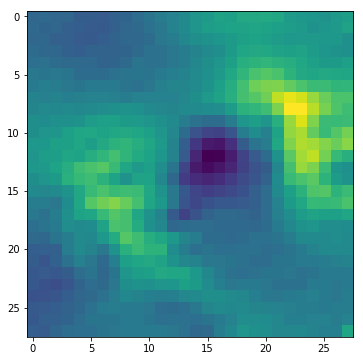

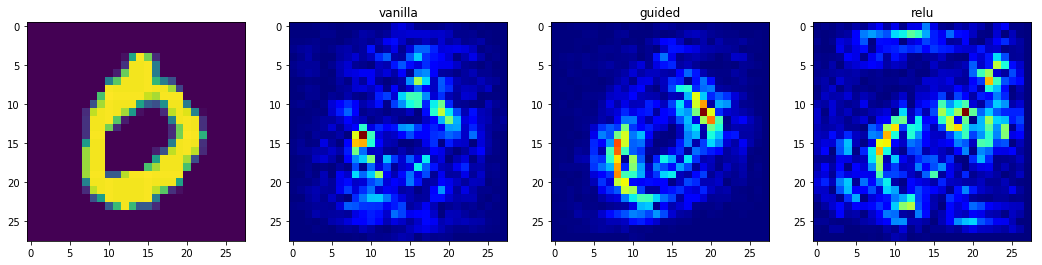

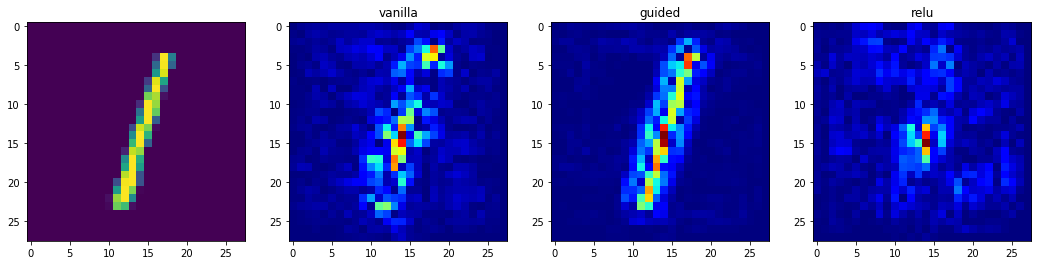

In [9]:
from vis.visualization import visualize_activation, visualize_saliency
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt

def visualize(model, layerName, validData, validLabel):
    # Utility to search for layer index by name.
    # Alternatively we can specify this as -1 since it corresponds to the last layer.
    layer_idx = utils.find_layer_idx(model, layerName)

    # Swap softmax with linear
    model.layers[layer_idx].activation = activations.linear
    model = utils.apply_modifications(model)

    # This is the output node we want to maximize.
    filter_idx = 0
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
    plt.imshow(img[..., 0])
    plt.show()

    for class_idx in np.arange(2):
        indices = np.where(y_test[:, class_idx] == 1.)[0]
        idx = indices[0]

        f, ax = plt.subplots(1, 4)
        ax[0].imshow(validData[idx][..., 0])

        for i, modifier in enumerate([None, 'guided', 'relu']):
            grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                       seed_input=validData[idx], backprop_modifier=modifier)
            if modifier is None:
                modifier = 'vanilla'
            ax[i + 1].set_title(modifier)
            ax[i + 1].imshow(grads, cmap='jet')
    plt.show()
    
    return model

visualize(model, 'preds', x_test, y_test)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.transform
import skvideo.datasets
import skvideo.io
import skvideo.motion

%matplotlib inline

try:
    xrange
except NameError:
    xrange = range

def getPlots(motionData):
    motionMagnitude = np.sqrt(np.sum(motionData**2, axis=2))

    fig = plt.figure()
    plt.quiver(motionData[::-1, :, 0], motionData[::-1, :, 1],
               scale= 4, scale_units='inches')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.tight_layout()
    fig.canvas.draw()
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (h, w, 4)
    quiver = buf[:, :, 1:]
    plt.close()

    fig = plt.figure()
    plt.imshow(motionMagnitude, cmap="Greys_r")
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.tight_layout()
    fig.canvas.draw()

    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (h, w, 4)
    magnitude = buf[:, :, 1:]
    plt.close()

    # histogram it
    fig = plt.figure()
    hist, bins = np.histogram(motionMagnitude, bins=10, range=(-0.5, 9.5))
    center = (bins[1:] + bins[:-1])/2.0
    plt.scatter(center, hist)
    plt.xlabel("Motion magnitude")
    plt.ylabel("Count")
    plt.ylim([0, 500])
    plt.grid()
    plt.tight_layout()
    fig.canvas.draw()
    
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (h, w, 4)
    histogram = buf[:, :, 1:]
    plt.close()

    return quiver, magnitude, histogram


filename = "data/train/2.avi"
videodata = skvideo.io.vread(filename)
videometadata = skvideo.io.ffprobe(filename)

frame_rate = videometadata['video']['@avg_frame_rate']
T, M, N, C = videodata.shape

motionData = skvideo.motion.blockMotion(videodata)

writer = skvideo.io.FFmpegWriter("motion3.mp4", inputdict={
    "-r": frame_rate
})

for i in xrange(T-1):
    a, b, c = getPlots(motionData[i])
    frame = skimage.transform.resize(videodata[i+1], (a.shape[0], a.shape[1], 3), mode="constant")

    outputframe = np.zeros((frame.shape[0]*2, frame.shape[1]*2, 3), dtype=np.uint8)
    outputframe[:frame.shape[0], :frame.shape[1]] = frame
    outputframe[frame.shape[0]:, :frame.shape[1]] = a
    outputframe[:frame.shape[0], frame.shape[1]:] = b
    outputframe[frame.shape[0]:, frame.shape[1]:] = c

    writer.writeFrame(outputframe)

writer.close()